# <center> Desafio Técnico - Oncase <center>

In [1]:
# Algumas importações necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.svm import SVC , SVR
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, RandomForestRegressor , GradientBoostingClassifier,
GradientBoostingRegressor , AdaBoostClassifier , AdaBoostRegressor)
from xgboost import XGBClassifier , XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Análise Descritiva dos Dados (EDA)

## Observações Iniciais

In [2]:
# Lendo o arquivo receitas.json e organizando este em um dataframe

df_receitas = pd.read_json('receitas.json')

In [3]:
# Exibindo as 5 primeiras linhas de df_receitas

df_receitas.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [4]:
# Obtendo as dimensões do dataset

df_receitas.shape

(20130, 11)

Repare que temos **20130** observações e **11** variáveis (features) descrevendo cada uma dessas amostras !

In [5]:
# Obtendo o tipo de dado de cada feature

df_receitas.dtypes

directions                  object
fat                        float64
date           datetime64[ns, UTC]
categories                  object
calories                   float64
desc                        object
protein                    float64
rating                     float64
title                       object
ingredients                 object
sodium                     float64
dtype: object

In [6]:
# Obtendo o número de valores ausentes em cada coluna

df_receitas.isnull().sum()

directions       19
fat            4222
date             19
categories       19
calories       4154
desc           6635
protein        4201
rating           30
title            19
ingredients      19
sodium         4156
dtype: int64

Repare que temos valores ausentes nas **11** colunas, porém em **5** delas temos mais de **4000** valores ausentes (Isso representa mais de **20%** das 20130 observações). Por outro lado em **5** colunas temos exatamente **19** valores ausentes o que nos leva a crer que possivelmente esses valores ausentes acontecem para as **mesmas observações**. Vamos verificar abaixo que de fato acontecem para as mesmas **19** observações : 

In [7]:
# Verificando !

df_receitas[df_receitas['directions'].isnull()]

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
1076,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1135,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5146,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5424,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5558,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7607,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7768,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7881,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8177,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Entendendo Algumas Estatísticas Básicas

In [8]:
# Obtendo algumas estatísticas básicas do nosso dataset

df_receitas.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


Perceba que temos valores que não parecem condizer com a realidade quando olhamos para a **média** das variáveis **"fat"** , **"calories"** , **"protein"** e **"sodium"**. Ao observarmos o **máximo** de cada uma dessas 4 features percebemos que esses valores não podem ser reais, ou seja, que algumas amostras possuem dados inconsistentes e, por isso, a média é extremamente afetada. Precisamos tratar esses **outliers** para obtermos valores mais reais para a média de cada feature.

In [9]:
# Observando quantas receitas possuem fat > 100

sum(df_receitas['fat'] > 100)

563

In [10]:
# Observando quantas receitas possuem fat > 150

sum(df_receitas['fat'] > 150)

280

In [11]:
# Observando quantas receitas possuem fat > 200

sum(df_receitas['fat'] > 200)

171

In [12]:
# Observando quantas receitas possuem fat > 250

sum(df_receitas['fat'] > 250)

114

In [13]:
# Observando quantas receitas possuem fat > 500

sum(df_receitas['fat'] > 500)

40

In [14]:
# Observando quantas receitas possuem fat > 1000

sum(df_receitas['fat'] > 1000)

18

In [15]:
# Observando quantas receitas possuem fat > 5000

sum(df_receitas['fat'] > 5000)

8

In [16]:
# Observando quantas receitas possuem fat > 10000

sum(df_receitas['fat'] > 10000)

8

Apenas 40 das 20130 receitas possuem fat > 500 . Vamos considerar 500 como um valor ainda aceitável, porém fat > 500 como um outlier.

In [17]:
# Calculando o valor médio de fat excluindo os 40 outliers

df_receitas[df_receitas['fat'] < 500]['fat'].mean()

27.135177716158307

**27.13** é um valor bem mais aceitável para a média da feature **fat**.

In [18]:
# Observando quantas receitas possuem calories > 1000

sum(df_receitas['calories'] > 1000)

1403

In [19]:
# Observando quantas receitas possuem calories > 1500

sum(df_receitas['calories'] > 1500)

597

In [20]:
# Observando quantas receitas possuem calories > 2000

sum(df_receitas['calories'] > 2000)

340

In [21]:
# Observando quantas receitas possuem calories > 2500

sum(df_receitas['calories'] > 2500)

234

In [22]:
# Observando quantas receitas possuem calories > 5000

sum(df_receitas['calories'] > 5000)

77

Dessa vez vamos considerar como outliers as receitas que possuem calories > 5000

In [23]:
# Calculando o valor médio de calories excluindo os 77 outliers

df_receitas[df_receitas['calories'] < 5000]['calories'].mean()

466.1508899930813

Novamente temos um valor bem mais aceitável para a média da feature calories.

Podemos adotar o mesmo procedimento de exclusão de outliers para as variáveis protein e sodium se quisermos calcular um valor razoável para a média dessas features, porém omitiremos essa etapa.

Em relação a variável rating perceba que **min = 0** e **max = 5** então aqui **não há necessidade de tratarmos outliers**. Temos um **rating médio de 3.71** o que é um bom valor e, portanto, concluímos que as receitas são de uma forma geral bem avaliadas.

In [24]:
# Observando todos os valores únicos da variável rating e suas respectivas quantidades

df_receitas['rating'].value_counts()

4.375    8033
3.750    5174
5.000    2731
0.000    1849
3.125    1489
2.500     536
1.250     164
1.875     124
Name: rating, dtype: int64

Interessante notar que temos apenas 8 valores diferentes de rating.

## Correlação entre Variáveis

É de se esperar que algumas variáveis estejam fortemente correlacionadas. Por exemplo uma receita gordurosa (fat elevado) deve possuir muitas calorias e uma grande quantidade de sódio, porém o alto teor de gordura não deve influenciar muito o rating já que o rating está muito mais ligado com boas instruções e com uma receita gostosa independente dessa ser saudável ou não. Também é de se esperar uma alta correlação entre o teor de sódio e a quantidade de calorias presente em cada receita.

Vamos calcular a correlação entre as features utilizando o **coeficiente de Pearson** que mede o caráter linear da relação entre as variáveis. Quanto mais próximo de 1 ou de -1 "mais linear" é a relação entre as variáveis e quanto mais próximo de 0 menor a linearidade da relação.

In [25]:
# Correlações entre as features

df_receitas.corr()

,fat,calories,protein,rating,sodium
fat,1.000000,0.996538,0.712194,0.007235,0.986476
calories,0.996538,1.000000,0.742816,0.007882,0.996392
protein,0.712194,0.742816,1.000000,0.013972,0.749287
rating,0.007235,0.007882,0.013972,1.000000,0.008179
sodium,0.986476,0.996392,0.749287,0.008179,1.000000


Como era de se esperar existe uma **correlação fortíssima entre "fat" e "calories" , "fat" e "sodium", "calories" e "sodium"**. Existe também uma **correlação forte entre "fat" e "protein" e entre "calories" e "protein"** (Não chega a ser uma correlação fortíssima, mas um valor maior que 0.7 é considerável). Por fim como era de se esperar **praticamente não existe dependência linear entre "rating" e as demais features**.

Vamos verificar graficamente o fortíssimo grau de linearidade entre as features **fat** e **calories** e o baixíssimo grau de linearidade entre **fat** e **rating**:

Text(0, 0.5, 'calories')

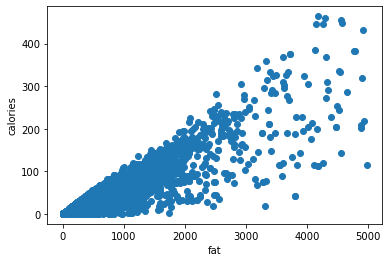

In [26]:
# fat x calories excluindo outliers

plt.scatter(df_receitas[(df_receitas['fat'] < 500) & (df_receitas['calories'] < 5000)]['calories'] ,
           df_receitas[(df_receitas['fat'] < 500) & (df_receitas['calories'] < 5000)]['fat'])
plt.xlabel('fat')
plt.ylabel('calories')

Fortíssima linearidade !

Text(0, 0.5, 'fat')

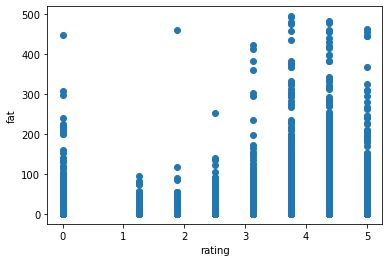

In [27]:
# rating x fat excluindo outliers

plt.scatter(df_receitas[df_receitas['fat'] < 500]['rating'] ,
           df_receitas[df_receitas['fat'] < 500]['fat'])
plt.xlabel('rating')
plt.ylabel('fat')

Baixíssima linearidade !

Repetindo o procedimento a cima podemos verificar a forte correlação linear existente entre **fat** e **sodium** e entre **calories** e **sodium** assim como o baixíssimo grau de linearidade entre **rating** e as outras features.

# Modelagem 

# 1. Construindo um Classificador

In [28]:
# Lendo o dataset de treino e salvando em um dataframe

df1 = pd.read_csv('classification_train.csv')

In [29]:
# Exibindo as 10 primeiras linhas do dataframe

df1.head(10)

,x1,x2,target
0,1.934224,-0.111822,1
1,1.767383,-0.976402,1
2,0.937101,-0.085633,1
3,1.340732,0.166960,1
4,-0.199901,-0.155204,1
5,1.383894,-0.229171,1
6,0.330585,0.014517,1
7,1.056232,1.110681,0
8,0.601328,0.734158,0
9,-0.826317,0.601454,0


Temos apenas duas features x1 e x2 e uma variável alvo target.

In [30]:
# Dimensão do dataset de treino

df1.shape

(670, 3)

Temos 670 observações !

In [31]:
# Número de valores ausentes por feature

df1.isnull().sum()

x1        0
x2        0
target    0
dtype: int64

Não temos valores ausentes ! Isso é ótimo !

In [32]:
# Algumas estatísticas básicas

df1.describe()

,x1,x2,target
count,670.000000,670.000000,670.000000
mean,0.481824,0.262611,0.505970
std,0.914772,0.615023,0.500338
min,-1.939767,-1.313970,0.000000
25%,-0.169615,-0.159189,0.000000
50%,0.492489,0.275538,1.000000
75%,1.159680,0.717589,1.000000
max,2.590410,1.904169,1.000000


A variância das variáveis x1 e x2 é **baixa**, pois veja que x1 assume valores entre -1.93 e 2.59 e x2 entre -1.31 e 1.90 (ambos são intervalos pequenos) logo **não farei nenhum tipo de Feature Scaling** já que os dados **não possuem muito ruído**.

In [33]:
# Analisando a distribuição da variável target

df1['target'].value_counts()

1    339
0    331
Name: target, dtype: int64

In [34]:
# % de target = 1

(df1['target'].sum()/670)*100

50.59701492537313

In [35]:
# % de target = 0

100 - (df1['target'].sum()/670)*100

49.40298507462687

Perceba que os dados **não estão desbalanceados**. Pelo contrário, estão bem balanceados ! Praticamente temos o mesmo número de observações com target = 0 e com target = 1 .

Vamos agora fazer uma validação cruzada (utilizando 5 dobras) e observar os resultados dessa para 10 diferentes modelos segundo as métricas solicitadas :

In [36]:
# Criando a matriz de features e o array contendo a variável alvo

X = np.array(df1[['x1' , 'x2']])

y = np.array(df1['target'])

In [37]:
# Criando uma lista com os modelos

modelos = [LogisticRegression() , KNeighborsClassifier() , SVC() , DecisionTreeClassifier() , RandomForestClassifier(),
          GradientBoostingClassifier() , AdaBoostClassifier() , XGBClassifier() , LGBMClassifier(), CatBoostClassifier()]

In [38]:
# Criando uma lista contendo os nomes dos modelos a cima

nome_modelos = ['Logistic Regression' , 'KNeighbors' , 'SVC' , 'Decision Tree' , 'Random Forest' , 'Gradient Boosting' ,
               'Ada Boost' ,  'XGB', 'LGBM' , 'CatBoost']

In [39]:
# Obtendo precision, recall e f1 para cada um dos 10 modelos

precision = []
recall = []
f1 = []


for model in modelos :
    precision.append(np.mean(cross_val_score(model, X, y , cv = 5 , scoring = 'precision')))
    recall.append(np.mean(cross_val_score(model, X, y , cv = 5 , scoring = 'recall' )))
    f1.append(np.mean(cross_val_score(model, X, y , cv = 5 , scoring = 'f1')))

C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lucas\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.007894
0:	learn: 0.6855157	total: 166ms	remaining: 2m 45s
1:	learn: 0.6783151	total: 182ms	remaining: 1m 30s
2:	learn: 0.6708043	total: 192ms	remaining: 1m 3s
3:	learn: 0.6628434	total: 201ms	remaining: 50s
4:	learn: 0.6549862	total: 209ms	remaining: 41.7s
5:	learn: 0.6474027	total: 218ms	remaining: 36.2s
6:	learn: 0.6407540	total: 225ms	remaining: 31.9s
7:	learn: 0.6341566	total: 232ms	remaining: 28.7s
8:	learn: 0.6273984	total: 238ms	remaining: 26.2s
9:	learn: 0.6208224	total: 246ms	remaining: 24.3s
10:	learn: 0.6146907	total: 252ms	remaining: 22.7s
11:	learn: 0.6089925	total: 259ms	remaining: 21.3s
12:	learn: 0.6030786	total: 265ms	remaining: 20.1s
13:	learn: 0.5970157	total: 271ms	remaining: 19.1s
14:	learn: 0.5

164:	learn: 0.2836196	total: 1.25s	remaining: 6.33s
165:	learn: 0.2829409	total: 1.26s	remaining: 6.32s
166:	learn: 0.2825455	total: 1.26s	remaining: 6.31s
167:	learn: 0.2819538	total: 1.27s	remaining: 6.3s
168:	learn: 0.2814243	total: 1.28s	remaining: 6.28s
169:	learn: 0.2808245	total: 1.28s	remaining: 6.27s
170:	learn: 0.2803413	total: 1.29s	remaining: 6.26s
171:	learn: 0.2799841	total: 1.3s	remaining: 6.25s
172:	learn: 0.2793469	total: 1.3s	remaining: 6.24s
173:	learn: 0.2786444	total: 1.31s	remaining: 6.23s
174:	learn: 0.2782009	total: 1.32s	remaining: 6.22s
175:	learn: 0.2775655	total: 1.33s	remaining: 6.21s
176:	learn: 0.2771289	total: 1.33s	remaining: 6.2s
177:	learn: 0.2766114	total: 1.34s	remaining: 6.18s
178:	learn: 0.2761557	total: 1.34s	remaining: 6.17s
179:	learn: 0.2757637	total: 1.35s	remaining: 6.16s
180:	learn: 0.2751594	total: 1.36s	remaining: 6.15s
181:	learn: 0.2746297	total: 1.36s	remaining: 6.13s
182:	learn: 0.2743496	total: 1.37s	remaining: 6.12s
183:	learn: 0.27

326:	learn: 0.2353310	total: 2.31s	remaining: 4.75s
327:	learn: 0.2352219	total: 2.31s	remaining: 4.74s
328:	learn: 0.2350897	total: 2.32s	remaining: 4.73s
329:	learn: 0.2349110	total: 2.33s	remaining: 4.72s
330:	learn: 0.2347237	total: 2.33s	remaining: 4.71s
331:	learn: 0.2345200	total: 2.34s	remaining: 4.71s
332:	learn: 0.2343513	total: 2.35s	remaining: 4.7s
333:	learn: 0.2341870	total: 2.35s	remaining: 4.69s
334:	learn: 0.2339794	total: 2.36s	remaining: 4.68s
335:	learn: 0.2337487	total: 2.37s	remaining: 4.67s
336:	learn: 0.2335961	total: 2.37s	remaining: 4.67s
337:	learn: 0.2334000	total: 2.38s	remaining: 4.66s
338:	learn: 0.2332404	total: 2.39s	remaining: 4.65s
339:	learn: 0.2331401	total: 2.39s	remaining: 4.64s
340:	learn: 0.2330518	total: 2.4s	remaining: 4.63s
341:	learn: 0.2329054	total: 2.4s	remaining: 4.63s
342:	learn: 0.2327995	total: 2.41s	remaining: 4.62s
343:	learn: 0.2326020	total: 2.42s	remaining: 4.61s
344:	learn: 0.2324768	total: 2.42s	remaining: 4.6s
345:	learn: 0.23

489:	learn: 0.2130942	total: 3.37s	remaining: 3.51s
490:	learn: 0.2129786	total: 3.38s	remaining: 3.5s
491:	learn: 0.2128717	total: 3.38s	remaining: 3.49s
492:	learn: 0.2127628	total: 3.39s	remaining: 3.48s
493:	learn: 0.2126213	total: 3.4s	remaining: 3.48s
494:	learn: 0.2124696	total: 3.4s	remaining: 3.47s
495:	learn: 0.2122703	total: 3.41s	remaining: 3.46s
496:	learn: 0.2121514	total: 3.41s	remaining: 3.46s
497:	learn: 0.2120359	total: 3.42s	remaining: 3.45s
498:	learn: 0.2119636	total: 3.43s	remaining: 3.44s
499:	learn: 0.2118758	total: 3.44s	remaining: 3.44s
500:	learn: 0.2117943	total: 3.44s	remaining: 3.43s
501:	learn: 0.2116392	total: 3.45s	remaining: 3.42s
502:	learn: 0.2115774	total: 3.46s	remaining: 3.41s
503:	learn: 0.2114227	total: 3.46s	remaining: 3.41s
504:	learn: 0.2113235	total: 3.47s	remaining: 3.4s
505:	learn: 0.2112169	total: 3.47s	remaining: 3.39s
506:	learn: 0.2111123	total: 3.48s	remaining: 3.38s
507:	learn: 0.2110383	total: 3.49s	remaining: 3.38s
508:	learn: 0.21

653:	learn: 0.1971566	total: 4.46s	remaining: 2.36s
654:	learn: 0.1970476	total: 4.46s	remaining: 2.35s
655:	learn: 0.1969238	total: 4.47s	remaining: 2.34s
656:	learn: 0.1968460	total: 4.48s	remaining: 2.34s
657:	learn: 0.1967563	total: 4.48s	remaining: 2.33s
658:	learn: 0.1966448	total: 4.49s	remaining: 2.32s
659:	learn: 0.1963539	total: 4.5s	remaining: 2.32s
660:	learn: 0.1962881	total: 4.5s	remaining: 2.31s
661:	learn: 0.1962590	total: 4.51s	remaining: 2.3s
662:	learn: 0.1961153	total: 4.52s	remaining: 2.3s
663:	learn: 0.1960650	total: 4.53s	remaining: 2.29s
664:	learn: 0.1959984	total: 4.54s	remaining: 2.28s
665:	learn: 0.1958484	total: 4.54s	remaining: 2.28s
666:	learn: 0.1958089	total: 4.55s	remaining: 2.27s
667:	learn: 0.1956569	total: 4.55s	remaining: 2.26s
668:	learn: 0.1955991	total: 4.56s	remaining: 2.26s
669:	learn: 0.1955234	total: 4.57s	remaining: 2.25s
670:	learn: 0.1954411	total: 4.57s	remaining: 2.24s
671:	learn: 0.1953625	total: 4.58s	remaining: 2.23s
672:	learn: 0.19

812:	learn: 0.1832501	total: 5.5s	remaining: 1.27s
813:	learn: 0.1831900	total: 5.51s	remaining: 1.26s
814:	learn: 0.1830869	total: 5.52s	remaining: 1.25s
815:	learn: 0.1830300	total: 5.53s	remaining: 1.25s
816:	learn: 0.1829538	total: 5.53s	remaining: 1.24s
817:	learn: 0.1828662	total: 5.54s	remaining: 1.23s
818:	learn: 0.1827198	total: 5.54s	remaining: 1.23s
819:	learn: 0.1826738	total: 5.55s	remaining: 1.22s
820:	learn: 0.1825684	total: 5.56s	remaining: 1.21s
821:	learn: 0.1824764	total: 5.57s	remaining: 1.21s
822:	learn: 0.1823623	total: 5.57s	remaining: 1.2s
823:	learn: 0.1822840	total: 5.58s	remaining: 1.19s
824:	learn: 0.1821850	total: 5.58s	remaining: 1.18s
825:	learn: 0.1820888	total: 5.59s	remaining: 1.18s
826:	learn: 0.1820307	total: 5.6s	remaining: 1.17s
827:	learn: 0.1819671	total: 5.61s	remaining: 1.16s
828:	learn: 0.1818370	total: 5.61s	remaining: 1.16s
829:	learn: 0.1816264	total: 5.62s	remaining: 1.15s
830:	learn: 0.1815574	total: 5.62s	remaining: 1.14s
831:	learn: 0.1

972:	learn: 0.1685424	total: 6.55s	remaining: 182ms
973:	learn: 0.1684119	total: 6.56s	remaining: 175ms
974:	learn: 0.1683387	total: 6.57s	remaining: 168ms
975:	learn: 0.1682968	total: 6.58s	remaining: 162ms
976:	learn: 0.1682395	total: 6.58s	remaining: 155ms
977:	learn: 0.1681919	total: 6.59s	remaining: 148ms
978:	learn: 0.1681112	total: 6.6s	remaining: 141ms
979:	learn: 0.1679681	total: 6.6s	remaining: 135ms
980:	learn: 0.1679407	total: 6.61s	remaining: 128ms
981:	learn: 0.1679033	total: 6.61s	remaining: 121ms
982:	learn: 0.1678077	total: 6.62s	remaining: 115ms
983:	learn: 0.1677492	total: 6.63s	remaining: 108ms
984:	learn: 0.1676861	total: 6.63s	remaining: 101ms
985:	learn: 0.1676084	total: 6.64s	remaining: 94.3ms
986:	learn: 0.1674994	total: 6.65s	remaining: 87.6ms
987:	learn: 0.1674613	total: 6.65s	remaining: 80.8ms
988:	learn: 0.1674080	total: 6.66s	remaining: 74.1ms
989:	learn: 0.1673353	total: 6.67s	remaining: 67.3ms
990:	learn: 0.1672764	total: 6.67s	remaining: 60.6ms
991:	lea

150:	learn: 0.3204361	total: 1.05s	remaining: 5.9s
151:	learn: 0.3198363	total: 1.06s	remaining: 5.9s
152:	learn: 0.3192563	total: 1.06s	remaining: 5.89s
153:	learn: 0.3186628	total: 1.07s	remaining: 5.88s
154:	learn: 0.3180035	total: 1.08s	remaining: 5.87s
155:	learn: 0.3173070	total: 1.08s	remaining: 5.86s
156:	learn: 0.3167697	total: 1.09s	remaining: 5.85s
157:	learn: 0.3162720	total: 1.1s	remaining: 5.84s
158:	learn: 0.3158084	total: 1.1s	remaining: 5.84s
159:	learn: 0.3156701	total: 1.11s	remaining: 5.81s
160:	learn: 0.3151798	total: 1.11s	remaining: 5.8s
161:	learn: 0.3145098	total: 1.12s	remaining: 5.8s
162:	learn: 0.3138661	total: 1.13s	remaining: 5.79s
163:	learn: 0.3135405	total: 1.13s	remaining: 5.78s
164:	learn: 0.3129999	total: 1.14s	remaining: 5.78s
165:	learn: 0.3124379	total: 1.15s	remaining: 5.77s
166:	learn: 0.3118697	total: 1.15s	remaining: 5.76s
167:	learn: 0.3114239	total: 1.16s	remaining: 5.75s
168:	learn: 0.3109151	total: 1.17s	remaining: 5.74s
169:	learn: 0.3104

315:	learn: 0.2686691	total: 2.13s	remaining: 4.61s
316:	learn: 0.2684378	total: 2.13s	remaining: 4.6s
317:	learn: 0.2681753	total: 2.14s	remaining: 4.59s
318:	learn: 0.2679988	total: 2.15s	remaining: 4.59s
319:	learn: 0.2678044	total: 2.15s	remaining: 4.58s
320:	learn: 0.2676374	total: 2.16s	remaining: 4.58s
321:	learn: 0.2674955	total: 2.17s	remaining: 4.57s
322:	learn: 0.2673048	total: 2.18s	remaining: 4.56s
323:	learn: 0.2671193	total: 2.18s	remaining: 4.55s
324:	learn: 0.2669692	total: 2.19s	remaining: 4.55s
325:	learn: 0.2668038	total: 2.2s	remaining: 4.54s
326:	learn: 0.2666755	total: 2.2s	remaining: 4.54s
327:	learn: 0.2665159	total: 2.21s	remaining: 4.53s
328:	learn: 0.2663766	total: 2.22s	remaining: 4.52s
329:	learn: 0.2662524	total: 2.22s	remaining: 4.51s
330:	learn: 0.2660943	total: 2.23s	remaining: 4.51s
331:	learn: 0.2659643	total: 2.24s	remaining: 4.5s
332:	learn: 0.2657876	total: 2.24s	remaining: 4.49s
333:	learn: 0.2655752	total: 2.25s	remaining: 4.49s
334:	learn: 0.26

478:	learn: 0.2476404	total: 3.2s	remaining: 3.48s
479:	learn: 0.2475916	total: 3.21s	remaining: 3.47s
480:	learn: 0.2474756	total: 3.21s	remaining: 3.47s
481:	learn: 0.2473443	total: 3.22s	remaining: 3.46s
482:	learn: 0.2472445	total: 3.23s	remaining: 3.45s
483:	learn: 0.2471770	total: 3.23s	remaining: 3.45s
484:	learn: 0.2470968	total: 3.24s	remaining: 3.44s
485:	learn: 0.2469228	total: 3.25s	remaining: 3.43s
486:	learn: 0.2468332	total: 3.25s	remaining: 3.43s
487:	learn: 0.2467106	total: 3.26s	remaining: 3.42s
488:	learn: 0.2466706	total: 3.27s	remaining: 3.41s
489:	learn: 0.2465388	total: 3.27s	remaining: 3.41s
490:	learn: 0.2464894	total: 3.28s	remaining: 3.4s
491:	learn: 0.2463681	total: 3.29s	remaining: 3.39s
492:	learn: 0.2463112	total: 3.29s	remaining: 3.39s
493:	learn: 0.2462720	total: 3.3s	remaining: 3.38s
494:	learn: 0.2461250	total: 3.31s	remaining: 3.37s
495:	learn: 0.2460432	total: 3.31s	remaining: 3.37s
496:	learn: 0.2459892	total: 3.32s	remaining: 3.36s
497:	learn: 0.2

639:	learn: 0.2321692	total: 4.25s	remaining: 2.39s
640:	learn: 0.2320435	total: 4.25s	remaining: 2.38s
641:	learn: 0.2319791	total: 4.26s	remaining: 2.38s
642:	learn: 0.2318778	total: 4.26s	remaining: 2.37s
643:	learn: 0.2318150	total: 4.27s	remaining: 2.36s
644:	learn: 0.2317311	total: 4.28s	remaining: 2.35s
645:	learn: 0.2315793	total: 4.29s	remaining: 2.35s
646:	learn: 0.2314002	total: 4.29s	remaining: 2.34s
647:	learn: 0.2313319	total: 4.3s	remaining: 2.33s
648:	learn: 0.2312214	total: 4.3s	remaining: 2.33s
649:	learn: 0.2311797	total: 4.31s	remaining: 2.32s
650:	learn: 0.2310748	total: 4.32s	remaining: 2.31s
651:	learn: 0.2309737	total: 4.33s	remaining: 2.31s
652:	learn: 0.2309161	total: 4.33s	remaining: 2.3s
653:	learn: 0.2308630	total: 4.34s	remaining: 2.29s
654:	learn: 0.2307883	total: 4.34s	remaining: 2.29s
655:	learn: 0.2306754	total: 4.35s	remaining: 2.28s
656:	learn: 0.2305133	total: 4.36s	remaining: 2.27s
657:	learn: 0.2304255	total: 4.36s	remaining: 2.27s
658:	learn: 0.2

800:	learn: 0.2169956	total: 5.3s	remaining: 1.32s
801:	learn: 0.2168968	total: 5.31s	remaining: 1.31s
802:	learn: 0.2167884	total: 5.32s	remaining: 1.3s
803:	learn: 0.2167358	total: 5.32s	remaining: 1.3s
804:	learn: 0.2166060	total: 5.33s	remaining: 1.29s
805:	learn: 0.2165510	total: 5.34s	remaining: 1.28s
806:	learn: 0.2164339	total: 5.34s	remaining: 1.28s
807:	learn: 0.2162929	total: 5.35s	remaining: 1.27s
808:	learn: 0.2161694	total: 5.36s	remaining: 1.26s
809:	learn: 0.2160572	total: 5.36s	remaining: 1.26s
810:	learn: 0.2159413	total: 5.37s	remaining: 1.25s
811:	learn: 0.2159051	total: 5.38s	remaining: 1.25s
812:	learn: 0.2158032	total: 5.39s	remaining: 1.24s
813:	learn: 0.2156962	total: 5.39s	remaining: 1.23s
814:	learn: 0.2156583	total: 5.4s	remaining: 1.23s
815:	learn: 0.2155949	total: 5.41s	remaining: 1.22s
816:	learn: 0.2155697	total: 5.41s	remaining: 1.21s
817:	learn: 0.2154763	total: 5.42s	remaining: 1.21s
818:	learn: 0.2153676	total: 5.42s	remaining: 1.2s
819:	learn: 0.215

966:	learn: 0.2014765	total: 6.39s	remaining: 218ms
967:	learn: 0.2013233	total: 6.39s	remaining: 211ms
968:	learn: 0.2012432	total: 6.4s	remaining: 205ms
969:	learn: 0.2011580	total: 6.41s	remaining: 198ms
970:	learn: 0.2011014	total: 6.41s	remaining: 192ms
971:	learn: 0.2010213	total: 6.42s	remaining: 185ms
972:	learn: 0.2008933	total: 6.43s	remaining: 178ms
973:	learn: 0.2008373	total: 6.43s	remaining: 172ms
974:	learn: 0.2007448	total: 6.44s	remaining: 165ms
975:	learn: 0.2006415	total: 6.45s	remaining: 159ms
976:	learn: 0.2005552	total: 6.46s	remaining: 152ms
977:	learn: 0.2005300	total: 6.46s	remaining: 145ms
978:	learn: 0.2004160	total: 6.47s	remaining: 139ms
979:	learn: 0.2003473	total: 6.47s	remaining: 132ms
980:	learn: 0.2002581	total: 6.48s	remaining: 126ms
981:	learn: 0.2001743	total: 6.49s	remaining: 119ms
982:	learn: 0.2000672	total: 6.5s	remaining: 112ms
983:	learn: 0.1999351	total: 6.5s	remaining: 106ms
984:	learn: 0.1998816	total: 6.51s	remaining: 99.1ms
985:	learn: 0.

139:	learn: 0.2807734	total: 929ms	remaining: 5.71s
140:	learn: 0.2798587	total: 936ms	remaining: 5.7s
141:	learn: 0.2791315	total: 942ms	remaining: 5.69s
142:	learn: 0.2786296	total: 948ms	remaining: 5.68s
143:	learn: 0.2778282	total: 954ms	remaining: 5.67s
144:	learn: 0.2769968	total: 961ms	remaining: 5.67s
145:	learn: 0.2763608	total: 968ms	remaining: 5.66s
146:	learn: 0.2755943	total: 975ms	remaining: 5.66s
147:	learn: 0.2749402	total: 981ms	remaining: 5.65s
148:	learn: 0.2740180	total: 988ms	remaining: 5.64s
149:	learn: 0.2733067	total: 995ms	remaining: 5.64s
150:	learn: 0.2727316	total: 1s	remaining: 5.64s
151:	learn: 0.2722165	total: 1.01s	remaining: 5.63s
152:	learn: 0.2715514	total: 1.01s	remaining: 5.62s
153:	learn: 0.2708364	total: 1.02s	remaining: 5.62s
154:	learn: 0.2700877	total: 1.03s	remaining: 5.62s
155:	learn: 0.2695659	total: 1.04s	remaining: 5.61s
156:	learn: 0.2688819	total: 1.04s	remaining: 5.6s
157:	learn: 0.2683660	total: 1.05s	remaining: 5.59s
158:	learn: 0.267

301:	learn: 0.2222258	total: 1.98s	remaining: 4.59s
302:	learn: 0.2219333	total: 1.99s	remaining: 4.58s
303:	learn: 0.2217476	total: 2s	remaining: 4.58s
304:	learn: 0.2215444	total: 2s	remaining: 4.57s
305:	learn: 0.2213942	total: 2.01s	remaining: 4.56s
306:	learn: 0.2212267	total: 2.02s	remaining: 4.55s
307:	learn: 0.2210547	total: 2.02s	remaining: 4.55s
308:	learn: 0.2208929	total: 2.03s	remaining: 4.54s
309:	learn: 0.2207194	total: 2.04s	remaining: 4.54s
310:	learn: 0.2205583	total: 2.04s	remaining: 4.53s
311:	learn: 0.2203859	total: 2.05s	remaining: 4.53s
312:	learn: 0.2201678	total: 2.06s	remaining: 4.52s
313:	learn: 0.2199153	total: 2.06s	remaining: 4.51s
314:	learn: 0.2194917	total: 2.07s	remaining: 4.5s
315:	learn: 0.2193602	total: 2.08s	remaining: 4.5s
316:	learn: 0.2191489	total: 2.08s	remaining: 4.49s
317:	learn: 0.2190136	total: 2.09s	remaining: 4.48s
318:	learn: 0.2188999	total: 2.1s	remaining: 4.48s
319:	learn: 0.2186944	total: 2.1s	remaining: 4.47s
320:	learn: 0.2185337	

462:	learn: 0.1975253	total: 3.04s	remaining: 3.53s
463:	learn: 0.1974210	total: 3.05s	remaining: 3.52s
464:	learn: 0.1972277	total: 3.06s	remaining: 3.52s
465:	learn: 0.1971042	total: 3.06s	remaining: 3.51s
466:	learn: 0.1969959	total: 3.07s	remaining: 3.5s
467:	learn: 0.1969435	total: 3.07s	remaining: 3.5s
468:	learn: 0.1968927	total: 3.08s	remaining: 3.49s
469:	learn: 0.1967945	total: 3.09s	remaining: 3.48s
470:	learn: 0.1967225	total: 3.09s	remaining: 3.48s
471:	learn: 0.1964317	total: 3.1s	remaining: 3.47s
472:	learn: 0.1963650	total: 3.11s	remaining: 3.46s
473:	learn: 0.1961323	total: 3.12s	remaining: 3.46s
474:	learn: 0.1959367	total: 3.12s	remaining: 3.45s
475:	learn: 0.1958479	total: 3.13s	remaining: 3.44s
476:	learn: 0.1957599	total: 3.13s	remaining: 3.44s
477:	learn: 0.1956664	total: 3.14s	remaining: 3.43s
478:	learn: 0.1955997	total: 3.15s	remaining: 3.42s
479:	learn: 0.1953671	total: 3.15s	remaining: 3.42s
480:	learn: 0.1952380	total: 3.16s	remaining: 3.41s
481:	learn: 0.1

638:	learn: 0.1777235	total: 4.28s	remaining: 2.42s
639:	learn: 0.1776656	total: 4.29s	remaining: 2.41s
640:	learn: 0.1775515	total: 4.29s	remaining: 2.4s
641:	learn: 0.1774352	total: 4.3s	remaining: 2.4s
642:	learn: 0.1773402	total: 4.31s	remaining: 2.39s
643:	learn: 0.1772255	total: 4.32s	remaining: 2.39s
644:	learn: 0.1771772	total: 4.32s	remaining: 2.38s
645:	learn: 0.1770318	total: 4.33s	remaining: 2.37s
646:	learn: 0.1768903	total: 4.34s	remaining: 2.37s
647:	learn: 0.1768102	total: 4.34s	remaining: 2.36s
648:	learn: 0.1767235	total: 4.35s	remaining: 2.35s
649:	learn: 0.1766625	total: 4.36s	remaining: 2.35s
650:	learn: 0.1765165	total: 4.37s	remaining: 2.34s
651:	learn: 0.1764591	total: 4.37s	remaining: 2.33s
652:	learn: 0.1764248	total: 4.38s	remaining: 2.33s
653:	learn: 0.1764101	total: 4.38s	remaining: 2.32s
654:	learn: 0.1763090	total: 4.39s	remaining: 2.31s
655:	learn: 0.1762376	total: 4.4s	remaining: 2.31s
656:	learn: 0.1761456	total: 4.4s	remaining: 2.3s
657:	learn: 0.1759

820:	learn: 0.1616288	total: 5.51s	remaining: 1.2s
821:	learn: 0.1614972	total: 5.52s	remaining: 1.2s
822:	learn: 0.1614125	total: 5.53s	remaining: 1.19s
823:	learn: 0.1613521	total: 5.53s	remaining: 1.18s
824:	learn: 0.1612793	total: 5.54s	remaining: 1.18s
825:	learn: 0.1611877	total: 5.54s	remaining: 1.17s
826:	learn: 0.1611276	total: 5.55s	remaining: 1.16s
827:	learn: 0.1610422	total: 5.56s	remaining: 1.15s
828:	learn: 0.1609760	total: 5.57s	remaining: 1.15s
829:	learn: 0.1609027	total: 5.57s	remaining: 1.14s
830:	learn: 0.1608376	total: 5.58s	remaining: 1.13s
831:	learn: 0.1607160	total: 5.58s	remaining: 1.13s
832:	learn: 0.1606467	total: 5.59s	remaining: 1.12s
833:	learn: 0.1605803	total: 5.6s	remaining: 1.11s
834:	learn: 0.1604706	total: 5.6s	remaining: 1.11s
835:	learn: 0.1603201	total: 5.61s	remaining: 1.1s
836:	learn: 0.1602654	total: 5.62s	remaining: 1.09s
837:	learn: 0.1601890	total: 5.62s	remaining: 1.09s
838:	learn: 0.1601143	total: 5.63s	remaining: 1.08s
839:	learn: 0.159

984:	learn: 0.1478993	total: 6.59s	remaining: 100ms
985:	learn: 0.1477865	total: 6.6s	remaining: 93.7ms
986:	learn: 0.1477142	total: 6.61s	remaining: 87ms
987:	learn: 0.1476421	total: 6.61s	remaining: 80.3ms
988:	learn: 0.1475853	total: 6.62s	remaining: 73.6ms
989:	learn: 0.1474585	total: 6.63s	remaining: 66.9ms
990:	learn: 0.1473881	total: 6.63s	remaining: 60.3ms
991:	learn: 0.1473400	total: 6.64s	remaining: 53.6ms
992:	learn: 0.1472305	total: 6.65s	remaining: 46.9ms
993:	learn: 0.1471810	total: 6.65s	remaining: 40.2ms
994:	learn: 0.1471395	total: 6.66s	remaining: 33.5ms
995:	learn: 0.1470532	total: 6.67s	remaining: 26.8ms
996:	learn: 0.1469895	total: 6.67s	remaining: 20.1ms
997:	learn: 0.1468551	total: 6.68s	remaining: 13.4ms
998:	learn: 0.1467782	total: 6.69s	remaining: 6.69ms
999:	learn: 0.1466523	total: 6.69s	remaining: 0us
Learning rate set to 0.007894
0:	learn: 0.6853883	total: 8.48ms	remaining: 8.47s
1:	learn: 0.6778005	total: 14.5ms	remaining: 7.25s
2:	learn: 0.6708511	total: 

159:	learn: 0.2935049	total: 1.06s	remaining: 5.55s
160:	learn: 0.2928460	total: 1.07s	remaining: 5.58s
161:	learn: 0.2922426	total: 1.08s	remaining: 5.58s
162:	learn: 0.2916526	total: 1.09s	remaining: 5.58s
163:	learn: 0.2911543	total: 1.09s	remaining: 5.58s
164:	learn: 0.2905246	total: 1.1s	remaining: 5.59s
165:	learn: 0.2898800	total: 1.11s	remaining: 5.59s
166:	learn: 0.2894154	total: 1.12s	remaining: 5.59s
167:	learn: 0.2888339	total: 1.13s	remaining: 5.6s
168:	learn: 0.2882701	total: 1.14s	remaining: 5.6s
169:	learn: 0.2876424	total: 1.15s	remaining: 5.61s
170:	learn: 0.2872507	total: 1.16s	remaining: 5.61s
171:	learn: 0.2867730	total: 1.16s	remaining: 5.61s
172:	learn: 0.2859984	total: 1.17s	remaining: 5.61s
173:	learn: 0.2854703	total: 1.18s	remaining: 5.6s
174:	learn: 0.2849828	total: 1.19s	remaining: 5.6s
175:	learn: 0.2844044	total: 1.19s	remaining: 5.59s
176:	learn: 0.2840429	total: 1.2s	remaining: 5.58s
177:	learn: 0.2835083	total: 1.21s	remaining: 5.57s
178:	learn: 0.2830

329:	learn: 0.2417322	total: 2.27s	remaining: 4.62s
330:	learn: 0.2415935	total: 2.28s	remaining: 4.61s
331:	learn: 0.2414573	total: 2.29s	remaining: 4.6s
332:	learn: 0.2413090	total: 2.29s	remaining: 4.59s
333:	learn: 0.2411350	total: 2.3s	remaining: 4.59s
334:	learn: 0.2410403	total: 2.31s	remaining: 4.58s
335:	learn: 0.2409585	total: 2.31s	remaining: 4.57s
336:	learn: 0.2408158	total: 2.32s	remaining: 4.56s
337:	learn: 0.2406074	total: 2.33s	remaining: 4.56s
338:	learn: 0.2405005	total: 2.33s	remaining: 4.55s
339:	learn: 0.2403531	total: 2.34s	remaining: 4.54s
340:	learn: 0.2402388	total: 2.35s	remaining: 4.54s
341:	learn: 0.2400559	total: 2.35s	remaining: 4.53s
342:	learn: 0.2399515	total: 2.36s	remaining: 4.52s
343:	learn: 0.2397842	total: 2.37s	remaining: 4.51s
344:	learn: 0.2396038	total: 2.37s	remaining: 4.51s
345:	learn: 0.2394750	total: 2.38s	remaining: 4.5s
346:	learn: 0.2393572	total: 2.39s	remaining: 4.49s
347:	learn: 0.2391872	total: 2.39s	remaining: 4.48s
348:	learn: 0.2

489:	learn: 0.2202107	total: 3.34s	remaining: 3.48s
490:	learn: 0.2200909	total: 3.35s	remaining: 3.47s
491:	learn: 0.2199781	total: 3.36s	remaining: 3.47s
492:	learn: 0.2198607	total: 3.37s	remaining: 3.46s
493:	learn: 0.2197788	total: 3.37s	remaining: 3.45s
494:	learn: 0.2196402	total: 3.38s	remaining: 3.45s
495:	learn: 0.2195121	total: 3.38s	remaining: 3.44s
496:	learn: 0.2193872	total: 3.39s	remaining: 3.43s
497:	learn: 0.2192946	total: 3.4s	remaining: 3.42s
498:	learn: 0.2192007	total: 3.4s	remaining: 3.42s
499:	learn: 0.2191210	total: 3.41s	remaining: 3.41s
500:	learn: 0.2190567	total: 3.42s	remaining: 3.4s
501:	learn: 0.2189024	total: 3.42s	remaining: 3.4s
502:	learn: 0.2187709	total: 3.43s	remaining: 3.39s
503:	learn: 0.2186923	total: 3.44s	remaining: 3.38s
504:	learn: 0.2185844	total: 3.44s	remaining: 3.38s
505:	learn: 0.2184931	total: 3.45s	remaining: 3.37s
506:	learn: 0.2182448	total: 3.46s	remaining: 3.36s
507:	learn: 0.2180997	total: 3.46s	remaining: 3.35s
508:	learn: 0.21

651:	learn: 0.2027155	total: 4.41s	remaining: 2.35s
652:	learn: 0.2025868	total: 4.42s	remaining: 2.35s
653:	learn: 0.2025760	total: 4.42s	remaining: 2.34s
654:	learn: 0.2024881	total: 4.43s	remaining: 2.33s
655:	learn: 0.2023351	total: 4.43s	remaining: 2.33s
656:	learn: 0.2022254	total: 4.44s	remaining: 2.32s
657:	learn: 0.2020389	total: 4.45s	remaining: 2.31s
658:	learn: 0.2019646	total: 4.46s	remaining: 2.31s
659:	learn: 0.2018974	total: 4.46s	remaining: 2.3s
660:	learn: 0.2017780	total: 4.47s	remaining: 2.29s
661:	learn: 0.2017368	total: 4.48s	remaining: 2.29s
662:	learn: 0.2016685	total: 4.48s	remaining: 2.28s
663:	learn: 0.2015586	total: 4.49s	remaining: 2.27s
664:	learn: 0.2014105	total: 4.5s	remaining: 2.26s
665:	learn: 0.2012387	total: 4.5s	remaining: 2.26s
666:	learn: 0.2011099	total: 4.51s	remaining: 2.25s
667:	learn: 0.2010430	total: 4.51s	remaining: 2.24s
668:	learn: 0.2009637	total: 4.52s	remaining: 2.24s
669:	learn: 0.2008938	total: 4.53s	remaining: 2.23s
670:	learn: 0.2

816:	learn: 0.1860446	total: 5.5s	remaining: 1.23s
817:	learn: 0.1859615	total: 5.5s	remaining: 1.22s
818:	learn: 0.1859082	total: 5.51s	remaining: 1.22s
819:	learn: 0.1857547	total: 5.52s	remaining: 1.21s
820:	learn: 0.1857136	total: 5.52s	remaining: 1.2s
821:	learn: 0.1855322	total: 5.53s	remaining: 1.2s
822:	learn: 0.1853784	total: 5.54s	remaining: 1.19s
823:	learn: 0.1852882	total: 5.54s	remaining: 1.18s
824:	learn: 0.1852051	total: 5.55s	remaining: 1.18s
825:	learn: 0.1850770	total: 5.56s	remaining: 1.17s
826:	learn: 0.1850248	total: 5.56s	remaining: 1.16s
827:	learn: 0.1849340	total: 5.57s	remaining: 1.16s
828:	learn: 0.1848592	total: 5.58s	remaining: 1.15s
829:	learn: 0.1846875	total: 5.58s	remaining: 1.14s
830:	learn: 0.1846145	total: 5.59s	remaining: 1.14s
831:	learn: 0.1845455	total: 5.6s	remaining: 1.13s
832:	learn: 0.1843650	total: 5.6s	remaining: 1.12s
833:	learn: 0.1842696	total: 5.61s	remaining: 1.12s
834:	learn: 0.1841322	total: 5.62s	remaining: 1.11s
835:	learn: 0.1840

979:	learn: 0.1700542	total: 6.58s	remaining: 134ms
980:	learn: 0.1699404	total: 6.58s	remaining: 128ms
981:	learn: 0.1697862	total: 6.59s	remaining: 121ms
982:	learn: 0.1696050	total: 6.6s	remaining: 114ms
983:	learn: 0.1694899	total: 6.61s	remaining: 107ms
984:	learn: 0.1694213	total: 6.61s	remaining: 101ms
985:	learn: 0.1693147	total: 6.62s	remaining: 94ms
986:	learn: 0.1691526	total: 6.63s	remaining: 87.3ms
987:	learn: 0.1690410	total: 6.63s	remaining: 80.6ms
988:	learn: 0.1689992	total: 6.64s	remaining: 73.9ms
989:	learn: 0.1689165	total: 6.65s	remaining: 67.2ms
990:	learn: 0.1688481	total: 6.65s	remaining: 60.4ms
991:	learn: 0.1687866	total: 6.66s	remaining: 53.7ms
992:	learn: 0.1687113	total: 6.67s	remaining: 47ms
993:	learn: 0.1686201	total: 6.67s	remaining: 40.3ms
994:	learn: 0.1685218	total: 6.68s	remaining: 33.6ms
995:	learn: 0.1684491	total: 6.69s	remaining: 26.9ms
996:	learn: 0.1683142	total: 6.69s	remaining: 20.1ms
997:	learn: 0.1682079	total: 6.7s	remaining: 13.4ms
998:	

164:	learn: 0.2870037	total: 1.08s	remaining: 5.47s
165:	learn: 0.2865287	total: 1.09s	remaining: 5.46s
166:	learn: 0.2861738	total: 1.09s	remaining: 5.46s
167:	learn: 0.2857022	total: 1.1s	remaining: 5.45s
168:	learn: 0.2851266	total: 1.11s	remaining: 5.45s
169:	learn: 0.2846019	total: 1.11s	remaining: 5.44s
170:	learn: 0.2840665	total: 1.12s	remaining: 5.43s
171:	learn: 0.2835031	total: 1.13s	remaining: 5.43s
172:	learn: 0.2829415	total: 1.13s	remaining: 5.42s
173:	learn: 0.2825876	total: 1.14s	remaining: 5.42s
174:	learn: 0.2821318	total: 1.15s	remaining: 5.42s
175:	learn: 0.2817033	total: 1.16s	remaining: 5.41s
176:	learn: 0.2811132	total: 1.16s	remaining: 5.41s
177:	learn: 0.2805901	total: 1.17s	remaining: 5.4s
178:	learn: 0.2801847	total: 1.18s	remaining: 5.4s
179:	learn: 0.2796389	total: 1.18s	remaining: 5.39s
180:	learn: 0.2791159	total: 1.19s	remaining: 5.38s
181:	learn: 0.2785360	total: 1.2s	remaining: 5.38s
182:	learn: 0.2782158	total: 1.2s	remaining: 5.38s
183:	learn: 0.277

324:	learn: 0.2368929	total: 2.13s	remaining: 4.42s
325:	learn: 0.2367275	total: 2.14s	remaining: 4.42s
326:	learn: 0.2365055	total: 2.15s	remaining: 4.41s
327:	learn: 0.2363084	total: 2.15s	remaining: 4.41s
328:	learn: 0.2361264	total: 2.16s	remaining: 4.4s
329:	learn: 0.2359190	total: 2.17s	remaining: 4.4s
330:	learn: 0.2358445	total: 2.17s	remaining: 4.39s
331:	learn: 0.2356367	total: 2.18s	remaining: 4.38s
332:	learn: 0.2353950	total: 2.19s	remaining: 4.38s
333:	learn: 0.2352548	total: 2.19s	remaining: 4.37s
334:	learn: 0.2349969	total: 2.2s	remaining: 4.37s
335:	learn: 0.2347874	total: 2.21s	remaining: 4.36s
336:	learn: 0.2346248	total: 2.21s	remaining: 4.36s
337:	learn: 0.2344141	total: 2.22s	remaining: 4.35s
338:	learn: 0.2342877	total: 2.23s	remaining: 4.34s
339:	learn: 0.2340462	total: 2.23s	remaining: 4.34s
340:	learn: 0.2339097	total: 2.24s	remaining: 4.33s
341:	learn: 0.2337203	total: 2.25s	remaining: 4.32s
342:	learn: 0.2335664	total: 2.25s	remaining: 4.32s
343:	learn: 0.2

491:	learn: 0.2124846	total: 3.22s	remaining: 3.33s
492:	learn: 0.2123850	total: 3.23s	remaining: 3.32s
493:	learn: 0.2122847	total: 3.23s	remaining: 3.31s
494:	learn: 0.2121664	total: 3.24s	remaining: 3.31s
495:	learn: 0.2120754	total: 3.25s	remaining: 3.3s
496:	learn: 0.2119832	total: 3.25s	remaining: 3.29s
497:	learn: 0.2118278	total: 3.26s	remaining: 3.29s
498:	learn: 0.2116552	total: 3.27s	remaining: 3.28s
499:	learn: 0.2115443	total: 3.27s	remaining: 3.27s
500:	learn: 0.2113201	total: 3.28s	remaining: 3.27s
501:	learn: 0.2111640	total: 3.29s	remaining: 3.26s
502:	learn: 0.2110379	total: 3.29s	remaining: 3.25s
503:	learn: 0.2109206	total: 3.3s	remaining: 3.25s
504:	learn: 0.2108091	total: 3.31s	remaining: 3.24s
505:	learn: 0.2105450	total: 3.31s	remaining: 3.24s
506:	learn: 0.2104211	total: 3.32s	remaining: 3.23s
507:	learn: 0.2103735	total: 3.33s	remaining: 3.22s
508:	learn: 0.2101828	total: 3.33s	remaining: 3.22s
509:	learn: 0.2099499	total: 3.34s	remaining: 3.21s
510:	learn: 0.

657:	learn: 0.1949379	total: 4.3s	remaining: 2.24s
658:	learn: 0.1948391	total: 4.31s	remaining: 2.23s
659:	learn: 0.1947348	total: 4.32s	remaining: 2.22s
660:	learn: 0.1946298	total: 4.32s	remaining: 2.22s
661:	learn: 0.1944765	total: 4.33s	remaining: 2.21s
662:	learn: 0.1944052	total: 4.34s	remaining: 2.2s
663:	learn: 0.1943734	total: 4.34s	remaining: 2.2s
664:	learn: 0.1942918	total: 4.35s	remaining: 2.19s
665:	learn: 0.1942511	total: 4.36s	remaining: 2.18s
666:	learn: 0.1941258	total: 4.36s	remaining: 2.18s
667:	learn: 0.1940171	total: 4.37s	remaining: 2.17s
668:	learn: 0.1939224	total: 4.38s	remaining: 2.17s
669:	learn: 0.1938021	total: 4.38s	remaining: 2.16s
670:	learn: 0.1937240	total: 4.39s	remaining: 2.15s
671:	learn: 0.1936479	total: 4.4s	remaining: 2.15s
672:	learn: 0.1935456	total: 4.4s	remaining: 2.14s
673:	learn: 0.1934699	total: 4.41s	remaining: 2.13s
674:	learn: 0.1933711	total: 4.42s	remaining: 2.13s
675:	learn: 0.1932879	total: 4.42s	remaining: 2.12s
676:	learn: 0.193

822:	learn: 0.1796079	total: 5.39s	remaining: 1.16s
823:	learn: 0.1795035	total: 5.39s	remaining: 1.15s
824:	learn: 0.1794048	total: 5.4s	remaining: 1.15s
825:	learn: 0.1793360	total: 5.41s	remaining: 1.14s
826:	learn: 0.1792308	total: 5.42s	remaining: 1.13s
827:	learn: 0.1791813	total: 5.42s	remaining: 1.13s
828:	learn: 0.1790967	total: 5.43s	remaining: 1.12s
829:	learn: 0.1789418	total: 5.43s	remaining: 1.11s
830:	learn: 0.1788612	total: 5.44s	remaining: 1.11s
831:	learn: 0.1787766	total: 5.45s	remaining: 1.1s
832:	learn: 0.1787090	total: 5.46s	remaining: 1.09s
833:	learn: 0.1785893	total: 5.46s	remaining: 1.09s
834:	learn: 0.1784581	total: 5.47s	remaining: 1.08s
835:	learn: 0.1783906	total: 5.48s	remaining: 1.07s
836:	learn: 0.1783166	total: 5.49s	remaining: 1.07s
837:	learn: 0.1782643	total: 5.49s	remaining: 1.06s
838:	learn: 0.1782072	total: 5.5s	remaining: 1.05s
839:	learn: 0.1781589	total: 5.51s	remaining: 1.05s
840:	learn: 0.1781046	total: 5.51s	remaining: 1.04s
841:	learn: 0.1

Learning rate set to 0.007894
0:	learn: 0.6855157	total: 7.3ms	remaining: 7.29s
1:	learn: 0.6783151	total: 13.5ms	remaining: 6.71s
2:	learn: 0.6708043	total: 20.9ms	remaining: 6.94s
3:	learn: 0.6628434	total: 27.4ms	remaining: 6.83s
4:	learn: 0.6549862	total: 34.4ms	remaining: 6.85s
5:	learn: 0.6474027	total: 40.9ms	remaining: 6.78s
6:	learn: 0.6407540	total: 47.6ms	remaining: 6.75s
7:	learn: 0.6341566	total: 54ms	remaining: 6.69s
8:	learn: 0.6273984	total: 60.7ms	remaining: 6.69s
9:	learn: 0.6208224	total: 67.7ms	remaining: 6.7s
10:	learn: 0.6146907	total: 74ms	remaining: 6.65s
11:	learn: 0.6089925	total: 80.3ms	remaining: 6.61s
12:	learn: 0.6030786	total: 86.6ms	remaining: 6.57s
13:	learn: 0.5970157	total: 92.8ms	remaining: 6.54s
14:	learn: 0.5909901	total: 99.3ms	remaining: 6.52s
15:	learn: 0.5859427	total: 105ms	remaining: 6.49s
16:	learn: 0.5797840	total: 112ms	remaining: 6.46s
17:	learn: 0.5740765	total: 118ms	remaining: 6.44s
18:	learn: 0.5681432	total: 125ms	remaining: 6.43s
19

174:	learn: 0.2782009	total: 1.25s	remaining: 5.87s
175:	learn: 0.2775655	total: 1.25s	remaining: 5.87s
176:	learn: 0.2771289	total: 1.26s	remaining: 5.86s
177:	learn: 0.2766114	total: 1.27s	remaining: 5.85s
178:	learn: 0.2761557	total: 1.27s	remaining: 5.84s
179:	learn: 0.2757637	total: 1.28s	remaining: 5.83s
180:	learn: 0.2751594	total: 1.28s	remaining: 5.82s
181:	learn: 0.2746297	total: 1.29s	remaining: 5.82s
182:	learn: 0.2743496	total: 1.3s	remaining: 5.8s
183:	learn: 0.2738188	total: 1.31s	remaining: 5.79s
184:	learn: 0.2734963	total: 1.31s	remaining: 5.79s
185:	learn: 0.2729801	total: 1.32s	remaining: 5.78s
186:	learn: 0.2726695	total: 1.33s	remaining: 5.77s
187:	learn: 0.2722280	total: 1.33s	remaining: 5.76s
188:	learn: 0.2718593	total: 1.34s	remaining: 5.76s
189:	learn: 0.2715134	total: 1.35s	remaining: 5.75s
190:	learn: 0.2710358	total: 1.35s	remaining: 5.74s
191:	learn: 0.2704421	total: 1.36s	remaining: 5.73s
192:	learn: 0.2700352	total: 1.37s	remaining: 5.72s
193:	learn: 0.

339:	learn: 0.2331401	total: 2.33s	remaining: 4.52s
340:	learn: 0.2330518	total: 2.33s	remaining: 4.51s
341:	learn: 0.2329054	total: 2.34s	remaining: 4.5s
342:	learn: 0.2327995	total: 2.35s	remaining: 4.49s
343:	learn: 0.2326020	total: 2.35s	remaining: 4.49s
344:	learn: 0.2324768	total: 2.36s	remaining: 4.48s
345:	learn: 0.2322623	total: 2.37s	remaining: 4.47s
346:	learn: 0.2320478	total: 2.37s	remaining: 4.46s
347:	learn: 0.2319056	total: 2.38s	remaining: 4.46s
348:	learn: 0.2317805	total: 2.38s	remaining: 4.45s
349:	learn: 0.2316099	total: 2.39s	remaining: 4.45s
350:	learn: 0.2314590	total: 2.4s	remaining: 4.44s
351:	learn: 0.2313268	total: 2.41s	remaining: 4.43s
352:	learn: 0.2311932	total: 2.41s	remaining: 4.42s
353:	learn: 0.2310892	total: 2.42s	remaining: 4.42s
354:	learn: 0.2308776	total: 2.43s	remaining: 4.41s
355:	learn: 0.2307242	total: 2.43s	remaining: 4.4s
356:	learn: 0.2306110	total: 2.44s	remaining: 4.39s
357:	learn: 0.2304678	total: 2.44s	remaining: 4.38s
358:	learn: 0.2

508:	learn: 0.2109718	total: 3.42s	remaining: 3.3s
509:	learn: 0.2108731	total: 3.43s	remaining: 3.29s
510:	learn: 0.2108524	total: 3.43s	remaining: 3.29s
511:	learn: 0.2106172	total: 3.44s	remaining: 3.28s
512:	learn: 0.2105180	total: 3.45s	remaining: 3.27s
513:	learn: 0.2104690	total: 3.45s	remaining: 3.26s
514:	learn: 0.2103594	total: 3.46s	remaining: 3.26s
515:	learn: 0.2102696	total: 3.47s	remaining: 3.25s
516:	learn: 0.2101711	total: 3.47s	remaining: 3.25s
517:	learn: 0.2101283	total: 3.48s	remaining: 3.24s
518:	learn: 0.2100305	total: 3.49s	remaining: 3.23s
519:	learn: 0.2098827	total: 3.49s	remaining: 3.22s
520:	learn: 0.2098275	total: 3.5s	remaining: 3.22s
521:	learn: 0.2097275	total: 3.51s	remaining: 3.21s
522:	learn: 0.2096588	total: 3.51s	remaining: 3.2s
523:	learn: 0.2095225	total: 3.52s	remaining: 3.2s
524:	learn: 0.2094614	total: 3.53s	remaining: 3.19s
525:	learn: 0.2093816	total: 3.53s	remaining: 3.18s
526:	learn: 0.2093526	total: 3.54s	remaining: 3.18s
527:	learn: 0.20

669:	learn: 0.1955234	total: 4.47s	remaining: 2.2s
670:	learn: 0.1954411	total: 4.47s	remaining: 2.19s
671:	learn: 0.1953625	total: 4.48s	remaining: 2.19s
672:	learn: 0.1952457	total: 4.49s	remaining: 2.18s
673:	learn: 0.1951746	total: 4.5s	remaining: 2.17s
674:	learn: 0.1950530	total: 4.5s	remaining: 2.17s
675:	learn: 0.1949623	total: 4.51s	remaining: 2.16s
676:	learn: 0.1948889	total: 4.51s	remaining: 2.15s
677:	learn: 0.1947613	total: 4.52s	remaining: 2.15s
678:	learn: 0.1946684	total: 4.53s	remaining: 2.14s
679:	learn: 0.1945826	total: 4.54s	remaining: 2.13s
680:	learn: 0.1944435	total: 4.54s	remaining: 2.13s
681:	learn: 0.1943368	total: 4.55s	remaining: 2.12s
682:	learn: 0.1942949	total: 4.56s	remaining: 2.11s
683:	learn: 0.1942569	total: 4.56s	remaining: 2.11s
684:	learn: 0.1941463	total: 4.57s	remaining: 2.1s
685:	learn: 0.1940674	total: 4.58s	remaining: 2.09s
686:	learn: 0.1939841	total: 4.58s	remaining: 2.09s
687:	learn: 0.1939156	total: 4.59s	remaining: 2.08s
688:	learn: 0.19

834:	learn: 0.1811941	total: 5.55s	remaining: 1.1s
835:	learn: 0.1811211	total: 5.55s	remaining: 1.09s
836:	learn: 0.1810345	total: 5.56s	remaining: 1.08s
837:	learn: 0.1809292	total: 5.57s	remaining: 1.08s
838:	learn: 0.1807994	total: 5.58s	remaining: 1.07s
839:	learn: 0.1806391	total: 5.58s	remaining: 1.06s
840:	learn: 0.1805994	total: 5.59s	remaining: 1.06s
841:	learn: 0.1805545	total: 5.6s	remaining: 1.05s
842:	learn: 0.1805237	total: 5.6s	remaining: 1.04s
843:	learn: 0.1803861	total: 5.61s	remaining: 1.04s
844:	learn: 0.1802275	total: 5.62s	remaining: 1.03s
845:	learn: 0.1800777	total: 5.62s	remaining: 1.02s
846:	learn: 0.1800289	total: 5.63s	remaining: 1.02s
847:	learn: 0.1799455	total: 5.64s	remaining: 1.01s
848:	learn: 0.1798279	total: 5.64s	remaining: 1s
849:	learn: 0.1797155	total: 5.65s	remaining: 997ms
850:	learn: 0.1796246	total: 5.66s	remaining: 990ms
851:	learn: 0.1794633	total: 5.66s	remaining: 984ms
852:	learn: 0.1794036	total: 5.67s	remaining: 977ms
853:	learn: 0.1793

0:	learn: 0.6864535	total: 13.1ms	remaining: 13s
1:	learn: 0.6793422	total: 19.9ms	remaining: 9.93s
2:	learn: 0.6722272	total: 26.4ms	remaining: 8.77s
3:	learn: 0.6656560	total: 32.9ms	remaining: 8.19s
4:	learn: 0.6589825	total: 39.6ms	remaining: 7.88s
5:	learn: 0.6515024	total: 45.5ms	remaining: 7.53s
6:	learn: 0.6456816	total: 52.4ms	remaining: 7.44s
7:	learn: 0.6396241	total: 59.3ms	remaining: 7.35s
8:	learn: 0.6332565	total: 67.9ms	remaining: 7.48s
9:	learn: 0.6266632	total: 75.2ms	remaining: 7.44s
10:	learn: 0.6213055	total: 82.4ms	remaining: 7.41s
11:	learn: 0.6163336	total: 88.7ms	remaining: 7.3s
12:	learn: 0.6100969	total: 96ms	remaining: 7.29s
13:	learn: 0.6044028	total: 102ms	remaining: 7.21s
14:	learn: 0.5986378	total: 110ms	remaining: 7.2s
15:	learn: 0.5929453	total: 116ms	remaining: 7.15s
16:	learn: 0.5876859	total: 121ms	remaining: 7s
17:	learn: 0.5822221	total: 127ms	remaining: 6.94s
18:	learn: 0.5768271	total: 133ms	remaining: 6.87s
19:	learn: 0.5719315	total: 139ms	rem

167:	learn: 0.3114239	total: 1.1s	remaining: 5.46s
168:	learn: 0.3109151	total: 1.11s	remaining: 5.46s
169:	learn: 0.3104657	total: 1.11s	remaining: 5.45s
170:	learn: 0.3100532	total: 1.12s	remaining: 5.44s
171:	learn: 0.3095906	total: 1.13s	remaining: 5.43s
172:	learn: 0.3091072	total: 1.14s	remaining: 5.43s
173:	learn: 0.3085923	total: 1.14s	remaining: 5.42s
174:	learn: 0.3081943	total: 1.15s	remaining: 5.42s
175:	learn: 0.3077668	total: 1.16s	remaining: 5.41s
176:	learn: 0.3073779	total: 1.16s	remaining: 5.41s
177:	learn: 0.3067384	total: 1.17s	remaining: 5.4s
178:	learn: 0.3063516	total: 1.18s	remaining: 5.4s
179:	learn: 0.3058672	total: 1.18s	remaining: 5.39s
180:	learn: 0.3054035	total: 1.19s	remaining: 5.38s
181:	learn: 0.3049462	total: 1.2s	remaining: 5.38s
182:	learn: 0.3044665	total: 1.2s	remaining: 5.37s
183:	learn: 0.3040723	total: 1.21s	remaining: 5.36s
184:	learn: 0.3036312	total: 1.22s	remaining: 5.35s
185:	learn: 0.3031465	total: 1.22s	remaining: 5.34s
186:	learn: 0.302

328:	learn: 0.2663766	total: 2.15s	remaining: 4.39s
329:	learn: 0.2662524	total: 2.16s	remaining: 4.39s
330:	learn: 0.2660943	total: 2.17s	remaining: 4.38s
331:	learn: 0.2659643	total: 2.17s	remaining: 4.37s
332:	learn: 0.2657876	total: 2.18s	remaining: 4.36s
333:	learn: 0.2655752	total: 2.19s	remaining: 4.36s
334:	learn: 0.2654595	total: 2.19s	remaining: 4.35s
335:	learn: 0.2653636	total: 2.2s	remaining: 4.35s
336:	learn: 0.2652272	total: 2.21s	remaining: 4.34s
337:	learn: 0.2651049	total: 2.21s	remaining: 4.33s
338:	learn: 0.2649680	total: 2.22s	remaining: 4.33s
339:	learn: 0.2648765	total: 2.23s	remaining: 4.32s
340:	learn: 0.2648061	total: 2.23s	remaining: 4.32s
341:	learn: 0.2647114	total: 2.24s	remaining: 4.31s
342:	learn: 0.2646005	total: 2.25s	remaining: 4.3s
343:	learn: 0.2644169	total: 2.25s	remaining: 4.3s
344:	learn: 0.2642748	total: 2.26s	remaining: 4.29s
345:	learn: 0.2641516	total: 2.27s	remaining: 4.28s
346:	learn: 0.2639445	total: 2.27s	remaining: 4.28s
347:	learn: 0.2

492:	learn: 0.2463112	total: 3.24s	remaining: 3.33s
493:	learn: 0.2462720	total: 3.25s	remaining: 3.33s
494:	learn: 0.2461250	total: 3.25s	remaining: 3.32s
495:	learn: 0.2460432	total: 3.26s	remaining: 3.31s
496:	learn: 0.2459892	total: 3.27s	remaining: 3.31s
497:	learn: 0.2459231	total: 3.27s	remaining: 3.3s
498:	learn: 0.2457695	total: 3.28s	remaining: 3.29s
499:	learn: 0.2456517	total: 3.29s	remaining: 3.29s
500:	learn: 0.2455373	total: 3.29s	remaining: 3.28s
501:	learn: 0.2453889	total: 3.3s	remaining: 3.27s
502:	learn: 0.2452891	total: 3.31s	remaining: 3.27s
503:	learn: 0.2451683	total: 3.31s	remaining: 3.26s
504:	learn: 0.2450910	total: 3.32s	remaining: 3.25s
505:	learn: 0.2450055	total: 3.33s	remaining: 3.25s
506:	learn: 0.2448818	total: 3.33s	remaining: 3.24s
507:	learn: 0.2448137	total: 3.34s	remaining: 3.23s
508:	learn: 0.2447038	total: 3.35s	remaining: 3.23s
509:	learn: 0.2446643	total: 3.35s	remaining: 3.22s
510:	learn: 0.2445768	total: 3.36s	remaining: 3.21s
511:	learn: 0.

673:	learn: 0.2289236	total: 4.46s	remaining: 2.16s
674:	learn: 0.2288445	total: 4.47s	remaining: 2.15s
675:	learn: 0.2288109	total: 4.47s	remaining: 2.14s
676:	learn: 0.2286385	total: 4.48s	remaining: 2.14s
677:	learn: 0.2285679	total: 4.49s	remaining: 2.13s
678:	learn: 0.2284775	total: 4.49s	remaining: 2.12s
679:	learn: 0.2283657	total: 4.5s	remaining: 2.12s
680:	learn: 0.2282933	total: 4.51s	remaining: 2.11s
681:	learn: 0.2282043	total: 4.51s	remaining: 2.1s
682:	learn: 0.2281217	total: 4.52s	remaining: 2.1s
683:	learn: 0.2280202	total: 4.53s	remaining: 2.09s
684:	learn: 0.2278747	total: 4.54s	remaining: 2.08s
685:	learn: 0.2277359	total: 4.54s	remaining: 2.08s
686:	learn: 0.2276489	total: 4.55s	remaining: 2.07s
687:	learn: 0.2275524	total: 4.56s	remaining: 2.07s
688:	learn: 0.2274340	total: 4.56s	remaining: 2.06s
689:	learn: 0.2273568	total: 4.57s	remaining: 2.05s
690:	learn: 0.2272385	total: 4.58s	remaining: 2.05s
691:	learn: 0.2271346	total: 4.58s	remaining: 2.04s
692:	learn: 0.2

834:	learn: 0.2137116	total: 5.53s	remaining: 1.09s
835:	learn: 0.2135748	total: 5.54s	remaining: 1.09s
836:	learn: 0.2135054	total: 5.54s	remaining: 1.08s
837:	learn: 0.2134282	total: 5.55s	remaining: 1.07s
838:	learn: 0.2133739	total: 5.55s	remaining: 1.06s
839:	learn: 0.2133045	total: 5.56s	remaining: 1.06s
840:	learn: 0.2132522	total: 5.57s	remaining: 1.05s
841:	learn: 0.2131364	total: 5.57s	remaining: 1.04s
842:	learn: 0.2130032	total: 5.58s	remaining: 1.04s
843:	learn: 0.2129061	total: 5.59s	remaining: 1.03s
844:	learn: 0.2128199	total: 5.59s	remaining: 1.03s
845:	learn: 0.2127610	total: 5.6s	remaining: 1.02s
846:	learn: 0.2127169	total: 5.61s	remaining: 1.01s
847:	learn: 0.2126779	total: 5.61s	remaining: 1.01s
848:	learn: 0.2125492	total: 5.62s	remaining: 1000ms
849:	learn: 0.2124494	total: 5.63s	remaining: 993ms
850:	learn: 0.2122419	total: 5.63s	remaining: 986ms
851:	learn: 0.2121175	total: 5.64s	remaining: 980ms
852:	learn: 0.2120636	total: 5.65s	remaining: 973ms
853:	learn: 

997:	learn: 0.1986678	total: 6.6s	remaining: 13.2ms
998:	learn: 0.1985568	total: 6.61s	remaining: 6.61ms
999:	learn: 0.1985002	total: 6.61s	remaining: 0us
Learning rate set to 0.007894
0:	learn: 0.6848100	total: 10.3ms	remaining: 10.3s
1:	learn: 0.6772651	total: 16.7ms	remaining: 8.33s
2:	learn: 0.6689183	total: 23.3ms	remaining: 7.73s
3:	learn: 0.6607039	total: 29.7ms	remaining: 7.39s
4:	learn: 0.6532439	total: 35.7ms	remaining: 7.1s
5:	learn: 0.6454298	total: 41.9ms	remaining: 6.94s
6:	learn: 0.6383592	total: 48.2ms	remaining: 6.84s
7:	learn: 0.6309730	total: 56.7ms	remaining: 7.04s
8:	learn: 0.6235902	total: 64.9ms	remaining: 7.15s
9:	learn: 0.6162203	total: 71.7ms	remaining: 7.1s
10:	learn: 0.6097899	total: 79ms	remaining: 7.1s
11:	learn: 0.6038962	total: 85.3ms	remaining: 7.02s
12:	learn: 0.5979566	total: 92.4ms	remaining: 7.01s
13:	learn: 0.5914312	total: 99.9ms	remaining: 7.04s
14:	learn: 0.5855839	total: 107ms	remaining: 7.06s
15:	learn: 0.5800818	total: 114ms	remaining: 6.98s


171:	learn: 0.2612725	total: 1.14s	remaining: 5.47s
172:	learn: 0.2608095	total: 1.14s	remaining: 5.46s
173:	learn: 0.2603846	total: 1.15s	remaining: 5.46s
174:	learn: 0.2600819	total: 1.16s	remaining: 5.45s
175:	learn: 0.2596658	total: 1.16s	remaining: 5.45s
176:	learn: 0.2592929	total: 1.17s	remaining: 5.44s
177:	learn: 0.2587965	total: 1.18s	remaining: 5.43s
178:	learn: 0.2582896	total: 1.18s	remaining: 5.43s
179:	learn: 0.2578994	total: 1.19s	remaining: 5.42s
180:	learn: 0.2574798	total: 1.2s	remaining: 5.41s
181:	learn: 0.2571684	total: 1.2s	remaining: 5.41s
182:	learn: 0.2567026	total: 1.21s	remaining: 5.41s
183:	learn: 0.2562516	total: 1.22s	remaining: 5.4s
184:	learn: 0.2557980	total: 1.22s	remaining: 5.39s
185:	learn: 0.2552973	total: 1.23s	remaining: 5.38s
186:	learn: 0.2549012	total: 1.24s	remaining: 5.38s
187:	learn: 0.2545395	total: 1.24s	remaining: 5.37s
188:	learn: 0.2540648	total: 1.25s	remaining: 5.36s
189:	learn: 0.2536655	total: 1.25s	remaining: 5.35s
190:	learn: 0.2

331:	learn: 0.2163470	total: 2.19s	remaining: 4.41s
332:	learn: 0.2161179	total: 2.2s	remaining: 4.4s
333:	learn: 0.2159366	total: 2.2s	remaining: 4.4s
334:	learn: 0.2158156	total: 2.21s	remaining: 4.39s
335:	learn: 0.2156606	total: 2.22s	remaining: 4.38s
336:	learn: 0.2155733	total: 2.22s	remaining: 4.38s
337:	learn: 0.2154668	total: 2.23s	remaining: 4.37s
338:	learn: 0.2152929	total: 2.24s	remaining: 4.36s
339:	learn: 0.2152071	total: 2.24s	remaining: 4.36s
340:	learn: 0.2150534	total: 2.25s	remaining: 4.35s
341:	learn: 0.2148818	total: 2.26s	remaining: 4.35s
342:	learn: 0.2147410	total: 2.27s	remaining: 4.34s
343:	learn: 0.2146512	total: 2.27s	remaining: 4.33s
344:	learn: 0.2145327	total: 2.28s	remaining: 4.33s
345:	learn: 0.2143942	total: 2.29s	remaining: 4.32s
346:	learn: 0.2143221	total: 2.29s	remaining: 4.31s
347:	learn: 0.2141948	total: 2.3s	remaining: 4.3s
348:	learn: 0.2140659	total: 2.3s	remaining: 4.3s
349:	learn: 0.2139006	total: 2.31s	remaining: 4.29s
350:	learn: 0.213799

493:	learn: 0.1931210	total: 3.26s	remaining: 3.34s
494:	learn: 0.1930143	total: 3.27s	remaining: 3.34s
495:	learn: 0.1929523	total: 3.28s	remaining: 3.33s
496:	learn: 0.1928913	total: 3.28s	remaining: 3.32s
497:	learn: 0.1926727	total: 3.29s	remaining: 3.32s
498:	learn: 0.1925466	total: 3.3s	remaining: 3.31s
499:	learn: 0.1924644	total: 3.31s	remaining: 3.31s
500:	learn: 0.1924123	total: 3.31s	remaining: 3.3s
501:	learn: 0.1922375	total: 3.32s	remaining: 3.29s
502:	learn: 0.1921673	total: 3.33s	remaining: 3.29s
503:	learn: 0.1920917	total: 3.33s	remaining: 3.28s
504:	learn: 0.1920353	total: 3.34s	remaining: 3.27s
505:	learn: 0.1919020	total: 3.35s	remaining: 3.27s
506:	learn: 0.1918106	total: 3.35s	remaining: 3.26s
507:	learn: 0.1917279	total: 3.36s	remaining: 3.25s
508:	learn: 0.1915933	total: 3.37s	remaining: 3.25s
509:	learn: 0.1914802	total: 3.38s	remaining: 3.24s
510:	learn: 0.1914051	total: 3.38s	remaining: 3.24s
511:	learn: 0.1912820	total: 3.39s	remaining: 3.23s
512:	learn: 0.

659:	learn: 0.1758136	total: 4.36s	remaining: 2.24s
660:	learn: 0.1757290	total: 4.36s	remaining: 2.24s
661:	learn: 0.1755288	total: 4.37s	remaining: 2.23s
662:	learn: 0.1754505	total: 4.38s	remaining: 2.22s
663:	learn: 0.1753403	total: 4.38s	remaining: 2.22s
664:	learn: 0.1752594	total: 4.39s	remaining: 2.21s
665:	learn: 0.1751498	total: 4.4s	remaining: 2.2s
666:	learn: 0.1750667	total: 4.4s	remaining: 2.2s
667:	learn: 0.1750453	total: 4.41s	remaining: 2.19s
668:	learn: 0.1750041	total: 4.42s	remaining: 2.19s
669:	learn: 0.1749325	total: 4.42s	remaining: 2.18s
670:	learn: 0.1748315	total: 4.43s	remaining: 2.17s
671:	learn: 0.1747523	total: 4.44s	remaining: 2.17s
672:	learn: 0.1746652	total: 4.44s	remaining: 2.16s
673:	learn: 0.1746335	total: 4.45s	remaining: 2.15s
674:	learn: 0.1745504	total: 4.46s	remaining: 2.15s
675:	learn: 0.1744854	total: 4.46s	remaining: 2.14s
676:	learn: 0.1743446	total: 4.47s	remaining: 2.13s
677:	learn: 0.1743019	total: 4.48s	remaining: 2.13s
678:	learn: 0.17

820:	learn: 0.1616288	total: 5.42s	remaining: 1.18s
821:	learn: 0.1614972	total: 5.43s	remaining: 1.18s
822:	learn: 0.1614125	total: 5.43s	remaining: 1.17s
823:	learn: 0.1613521	total: 5.44s	remaining: 1.16s
824:	learn: 0.1612793	total: 5.45s	remaining: 1.16s
825:	learn: 0.1611877	total: 5.45s	remaining: 1.15s
826:	learn: 0.1611276	total: 5.46s	remaining: 1.14s
827:	learn: 0.1610422	total: 5.46s	remaining: 1.14s
828:	learn: 0.1609760	total: 5.47s	remaining: 1.13s
829:	learn: 0.1609027	total: 5.48s	remaining: 1.12s
830:	learn: 0.1608376	total: 5.49s	remaining: 1.11s
831:	learn: 0.1607160	total: 5.49s	remaining: 1.11s
832:	learn: 0.1606467	total: 5.5s	remaining: 1.1s
833:	learn: 0.1605803	total: 5.51s	remaining: 1.1s
834:	learn: 0.1604706	total: 5.51s	remaining: 1.09s
835:	learn: 0.1603201	total: 5.52s	remaining: 1.08s
836:	learn: 0.1602654	total: 5.53s	remaining: 1.08s
837:	learn: 0.1601890	total: 5.53s	remaining: 1.07s
838:	learn: 0.1601143	total: 5.54s	remaining: 1.06s
839:	learn: 0.1

985:	learn: 0.1477865	total: 6.5s	remaining: 92.3ms
986:	learn: 0.1477142	total: 6.5s	remaining: 85.7ms
987:	learn: 0.1476421	total: 6.51s	remaining: 79.1ms
988:	learn: 0.1475853	total: 6.52s	remaining: 72.5ms
989:	learn: 0.1474585	total: 6.53s	remaining: 65.9ms
990:	learn: 0.1473881	total: 6.53s	remaining: 59.3ms
991:	learn: 0.1473400	total: 6.54s	remaining: 52.7ms
992:	learn: 0.1472305	total: 6.55s	remaining: 46.1ms
993:	learn: 0.1471810	total: 6.55s	remaining: 39.6ms
994:	learn: 0.1471395	total: 6.56s	remaining: 33ms
995:	learn: 0.1470532	total: 6.57s	remaining: 26.4ms
996:	learn: 0.1469895	total: 6.57s	remaining: 19.8ms
997:	learn: 0.1468551	total: 6.58s	remaining: 13.2ms
998:	learn: 0.1467782	total: 6.59s	remaining: 6.59ms
999:	learn: 0.1466523	total: 6.59s	remaining: 0us
Learning rate set to 0.007894
0:	learn: 0.6853883	total: 7.57ms	remaining: 7.56s
1:	learn: 0.6778005	total: 14.6ms	remaining: 7.27s
2:	learn: 0.6708511	total: 22.4ms	remaining: 7.46s
3:	learn: 0.6633021	total: 29

157:	learn: 0.2944306	total: 1.06s	remaining: 5.64s
158:	learn: 0.2939205	total: 1.06s	remaining: 5.63s
159:	learn: 0.2935049	total: 1.07s	remaining: 5.62s
160:	learn: 0.2928460	total: 1.08s	remaining: 5.61s
161:	learn: 0.2922426	total: 1.08s	remaining: 5.6s
162:	learn: 0.2916526	total: 1.09s	remaining: 5.59s
163:	learn: 0.2911543	total: 1.09s	remaining: 5.58s
164:	learn: 0.2905246	total: 1.1s	remaining: 5.58s
165:	learn: 0.2898800	total: 1.11s	remaining: 5.57s
166:	learn: 0.2894154	total: 1.11s	remaining: 5.56s
167:	learn: 0.2888339	total: 1.12s	remaining: 5.55s
168:	learn: 0.2882701	total: 1.13s	remaining: 5.55s
169:	learn: 0.2876424	total: 1.14s	remaining: 5.54s
170:	learn: 0.2872507	total: 1.14s	remaining: 5.54s
171:	learn: 0.2867730	total: 1.15s	remaining: 5.53s
172:	learn: 0.2859984	total: 1.16s	remaining: 5.52s
173:	learn: 0.2854703	total: 1.16s	remaining: 5.51s
174:	learn: 0.2849828	total: 1.17s	remaining: 5.51s
175:	learn: 0.2844044	total: 1.17s	remaining: 5.5s
176:	learn: 0.2

317:	learn: 0.2435505	total: 2.13s	remaining: 4.57s
318:	learn: 0.2434205	total: 2.13s	remaining: 4.56s
319:	learn: 0.2433269	total: 2.14s	remaining: 4.55s
320:	learn: 0.2431660	total: 2.15s	remaining: 4.54s
321:	learn: 0.2430530	total: 2.15s	remaining: 4.54s
322:	learn: 0.2429330	total: 2.16s	remaining: 4.53s
323:	learn: 0.2427782	total: 2.17s	remaining: 4.52s
324:	learn: 0.2425526	total: 2.17s	remaining: 4.52s
325:	learn: 0.2424130	total: 2.18s	remaining: 4.51s
326:	learn: 0.2422011	total: 2.19s	remaining: 4.51s
327:	learn: 0.2420575	total: 2.2s	remaining: 4.5s
328:	learn: 0.2419100	total: 2.21s	remaining: 4.5s
329:	learn: 0.2417322	total: 2.21s	remaining: 4.49s
330:	learn: 0.2415935	total: 2.22s	remaining: 4.48s
331:	learn: 0.2414573	total: 2.22s	remaining: 4.47s
332:	learn: 0.2413090	total: 2.23s	remaining: 4.47s
333:	learn: 0.2411350	total: 2.24s	remaining: 4.46s
334:	learn: 0.2410403	total: 2.24s	remaining: 4.45s
335:	learn: 0.2409585	total: 2.25s	remaining: 4.45s
336:	learn: 0.2

499:	learn: 0.2191210	total: 3.34s	remaining: 3.34s
500:	learn: 0.2190567	total: 3.34s	remaining: 3.33s
501:	learn: 0.2189024	total: 3.35s	remaining: 3.32s
502:	learn: 0.2187709	total: 3.36s	remaining: 3.32s
503:	learn: 0.2186923	total: 3.36s	remaining: 3.31s
504:	learn: 0.2185844	total: 3.37s	remaining: 3.3s
505:	learn: 0.2184931	total: 3.38s	remaining: 3.3s
506:	learn: 0.2182448	total: 3.38s	remaining: 3.29s
507:	learn: 0.2180997	total: 3.39s	remaining: 3.28s
508:	learn: 0.2180396	total: 3.4s	remaining: 3.28s
509:	learn: 0.2179635	total: 3.4s	remaining: 3.27s
510:	learn: 0.2178485	total: 3.41s	remaining: 3.26s
511:	learn: 0.2177770	total: 3.42s	remaining: 3.26s
512:	learn: 0.2177035	total: 3.42s	remaining: 3.25s
513:	learn: 0.2176489	total: 3.43s	remaining: 3.24s
514:	learn: 0.2174981	total: 3.44s	remaining: 3.24s
515:	learn: 0.2173768	total: 3.44s	remaining: 3.23s
516:	learn: 0.2172857	total: 3.45s	remaining: 3.22s
517:	learn: 0.2171527	total: 3.46s	remaining: 3.22s
518:	learn: 0.21

660:	learn: 0.2017780	total: 4.4s	remaining: 2.26s
661:	learn: 0.2017368	total: 4.41s	remaining: 2.25s
662:	learn: 0.2016685	total: 4.42s	remaining: 2.25s
663:	learn: 0.2015586	total: 4.42s	remaining: 2.24s
664:	learn: 0.2014105	total: 4.43s	remaining: 2.23s
665:	learn: 0.2012387	total: 4.44s	remaining: 2.23s
666:	learn: 0.2011099	total: 4.44s	remaining: 2.22s
667:	learn: 0.2010430	total: 4.45s	remaining: 2.21s
668:	learn: 0.2009637	total: 4.46s	remaining: 2.21s
669:	learn: 0.2008938	total: 4.46s	remaining: 2.2s
670:	learn: 0.2007577	total: 4.47s	remaining: 2.19s
671:	learn: 0.2006345	total: 4.48s	remaining: 2.19s
672:	learn: 0.2004778	total: 4.49s	remaining: 2.18s
673:	learn: 0.2003815	total: 4.49s	remaining: 2.17s
674:	learn: 0.2002478	total: 4.5s	remaining: 2.17s
675:	learn: 0.2001676	total: 4.5s	remaining: 2.16s
676:	learn: 0.2000888	total: 4.51s	remaining: 2.15s
677:	learn: 0.2000209	total: 4.51s	remaining: 2.14s
678:	learn: 0.1998942	total: 4.52s	remaining: 2.14s
679:	learn: 0.19

820:	learn: 0.1857136	total: 5.45s	remaining: 1.19s
821:	learn: 0.1855322	total: 5.46s	remaining: 1.18s
822:	learn: 0.1853784	total: 5.47s	remaining: 1.18s
823:	learn: 0.1852882	total: 5.47s	remaining: 1.17s
824:	learn: 0.1852051	total: 5.48s	remaining: 1.16s
825:	learn: 0.1850770	total: 5.49s	remaining: 1.16s
826:	learn: 0.1850248	total: 5.49s	remaining: 1.15s
827:	learn: 0.1849340	total: 5.5s	remaining: 1.14s
828:	learn: 0.1848592	total: 5.5s	remaining: 1.14s
829:	learn: 0.1846875	total: 5.51s	remaining: 1.13s
830:	learn: 0.1846145	total: 5.52s	remaining: 1.12s
831:	learn: 0.1845455	total: 5.53s	remaining: 1.12s
832:	learn: 0.1843650	total: 5.54s	remaining: 1.11s
833:	learn: 0.1842696	total: 5.54s	remaining: 1.1s
834:	learn: 0.1841322	total: 5.55s	remaining: 1.1s
835:	learn: 0.1840343	total: 5.55s	remaining: 1.09s
836:	learn: 0.1839540	total: 5.56s	remaining: 1.08s
837:	learn: 0.1838551	total: 5.57s	remaining: 1.08s
838:	learn: 0.1838198	total: 5.57s	remaining: 1.07s
839:	learn: 0.18

979:	learn: 0.1700542	total: 6.5s	remaining: 133ms
980:	learn: 0.1699404	total: 6.51s	remaining: 126ms
981:	learn: 0.1697862	total: 6.51s	remaining: 119ms
982:	learn: 0.1696050	total: 6.52s	remaining: 113ms
983:	learn: 0.1694899	total: 6.53s	remaining: 106ms
984:	learn: 0.1694213	total: 6.54s	remaining: 99.5ms
985:	learn: 0.1693147	total: 6.54s	remaining: 92.9ms
986:	learn: 0.1691526	total: 6.55s	remaining: 86.3ms
987:	learn: 0.1690410	total: 6.55s	remaining: 79.6ms
988:	learn: 0.1689992	total: 6.56s	remaining: 73ms
989:	learn: 0.1689165	total: 6.57s	remaining: 66.4ms
990:	learn: 0.1688481	total: 6.58s	remaining: 59.7ms
991:	learn: 0.1687866	total: 6.58s	remaining: 53.1ms
992:	learn: 0.1687113	total: 6.59s	remaining: 46.4ms
993:	learn: 0.1686201	total: 6.59s	remaining: 39.8ms
994:	learn: 0.1685218	total: 6.6s	remaining: 33.2ms
995:	learn: 0.1684491	total: 6.61s	remaining: 26.5ms
996:	learn: 0.1683142	total: 6.61s	remaining: 19.9ms
997:	learn: 0.1682079	total: 6.62s	remaining: 13.3ms
99

138:	learn: 0.3045969	total: 912ms	remaining: 5.65s
139:	learn: 0.3037191	total: 918ms	remaining: 5.64s
140:	learn: 0.3030977	total: 925ms	remaining: 5.63s
141:	learn: 0.3023598	total: 931ms	remaining: 5.63s
142:	learn: 0.3016527	total: 938ms	remaining: 5.62s
143:	learn: 0.3008734	total: 945ms	remaining: 5.62s
144:	learn: 0.3000515	total: 951ms	remaining: 5.61s
145:	learn: 0.2992512	total: 958ms	remaining: 5.6s
146:	learn: 0.2984346	total: 965ms	remaining: 5.6s
147:	learn: 0.2978234	total: 972ms	remaining: 5.59s
148:	learn: 0.2969939	total: 978ms	remaining: 5.59s
149:	learn: 0.2963500	total: 986ms	remaining: 5.58s
150:	learn: 0.2956396	total: 992ms	remaining: 5.58s
151:	learn: 0.2950393	total: 998ms	remaining: 5.57s
152:	learn: 0.2942751	total: 1s	remaining: 5.56s
153:	learn: 0.2934294	total: 1.01s	remaining: 5.55s
154:	learn: 0.2929222	total: 1.02s	remaining: 5.55s
155:	learn: 0.2923645	total: 1.02s	remaining: 5.54s
156:	learn: 0.2915462	total: 1.03s	remaining: 5.53s
157:	learn: 0.290

317:	learn: 0.2379837	total: 2.15s	remaining: 4.61s
318:	learn: 0.2378466	total: 2.16s	remaining: 4.61s
319:	learn: 0.2377029	total: 2.16s	remaining: 4.6s
320:	learn: 0.2375566	total: 2.17s	remaining: 4.59s
321:	learn: 0.2373678	total: 2.18s	remaining: 4.58s
322:	learn: 0.2372346	total: 2.18s	remaining: 4.58s
323:	learn: 0.2371113	total: 2.19s	remaining: 4.57s
324:	learn: 0.2368929	total: 2.2s	remaining: 4.56s
325:	learn: 0.2367275	total: 2.2s	remaining: 4.55s
326:	learn: 0.2365055	total: 2.21s	remaining: 4.55s
327:	learn: 0.2363084	total: 2.22s	remaining: 4.54s
328:	learn: 0.2361264	total: 2.23s	remaining: 4.54s
329:	learn: 0.2359190	total: 2.23s	remaining: 4.53s
330:	learn: 0.2358445	total: 2.24s	remaining: 4.52s
331:	learn: 0.2356367	total: 2.25s	remaining: 4.52s
332:	learn: 0.2353950	total: 2.25s	remaining: 4.51s
333:	learn: 0.2352548	total: 2.26s	remaining: 4.5s
334:	learn: 0.2349969	total: 2.26s	remaining: 4.5s
335:	learn: 0.2347874	total: 2.27s	remaining: 4.49s
336:	learn: 0.234

479:	learn: 0.2138775	total: 3.21s	remaining: 3.48s
480:	learn: 0.2137801	total: 3.22s	remaining: 3.47s
481:	learn: 0.2137006	total: 3.22s	remaining: 3.46s
482:	learn: 0.2135917	total: 3.23s	remaining: 3.46s
483:	learn: 0.2134591	total: 3.24s	remaining: 3.45s
484:	learn: 0.2132888	total: 3.24s	remaining: 3.44s
485:	learn: 0.2132160	total: 3.25s	remaining: 3.44s
486:	learn: 0.2131342	total: 3.26s	remaining: 3.43s
487:	learn: 0.2130373	total: 3.26s	remaining: 3.42s
488:	learn: 0.2128346	total: 3.27s	remaining: 3.42s
489:	learn: 0.2127602	total: 3.28s	remaining: 3.41s
490:	learn: 0.2126338	total: 3.28s	remaining: 3.4s
491:	learn: 0.2124846	total: 3.29s	remaining: 3.4s
492:	learn: 0.2123850	total: 3.3s	remaining: 3.39s
493:	learn: 0.2122847	total: 3.3s	remaining: 3.38s
494:	learn: 0.2121664	total: 3.31s	remaining: 3.38s
495:	learn: 0.2120754	total: 3.32s	remaining: 3.37s
496:	learn: 0.2119832	total: 3.32s	remaining: 3.36s
497:	learn: 0.2118278	total: 3.33s	remaining: 3.36s
498:	learn: 0.21

641:	learn: 0.1967221	total: 4.28s	remaining: 2.38s
642:	learn: 0.1966161	total: 4.28s	remaining: 2.38s
643:	learn: 0.1965579	total: 4.29s	remaining: 2.37s
644:	learn: 0.1964476	total: 4.29s	remaining: 2.36s
645:	learn: 0.1963821	total: 4.3s	remaining: 2.36s
646:	learn: 0.1963178	total: 4.31s	remaining: 2.35s
647:	learn: 0.1961112	total: 4.31s	remaining: 2.34s
648:	learn: 0.1959927	total: 4.32s	remaining: 2.34s
649:	learn: 0.1958224	total: 4.33s	remaining: 2.33s
650:	learn: 0.1957065	total: 4.33s	remaining: 2.32s
651:	learn: 0.1956435	total: 4.34s	remaining: 2.32s
652:	learn: 0.1955767	total: 4.35s	remaining: 2.31s
653:	learn: 0.1954173	total: 4.36s	remaining: 2.3s
654:	learn: 0.1952546	total: 4.36s	remaining: 2.3s
655:	learn: 0.1952490	total: 4.37s	remaining: 2.29s
656:	learn: 0.1949986	total: 4.37s	remaining: 2.28s
657:	learn: 0.1949379	total: 4.38s	remaining: 2.28s
658:	learn: 0.1948391	total: 4.38s	remaining: 2.27s
659:	learn: 0.1947348	total: 4.39s	remaining: 2.26s
660:	learn: 0.1

826:	learn: 0.1792308	total: 5.52s	remaining: 1.15s
827:	learn: 0.1791813	total: 5.52s	remaining: 1.15s
828:	learn: 0.1790967	total: 5.53s	remaining: 1.14s
829:	learn: 0.1789418	total: 5.54s	remaining: 1.13s
830:	learn: 0.1788612	total: 5.54s	remaining: 1.13s
831:	learn: 0.1787766	total: 5.55s	remaining: 1.12s
832:	learn: 0.1787090	total: 5.55s	remaining: 1.11s
833:	learn: 0.1785893	total: 5.56s	remaining: 1.11s
834:	learn: 0.1784581	total: 5.57s	remaining: 1.1s
835:	learn: 0.1783906	total: 5.58s	remaining: 1.09s
836:	learn: 0.1783166	total: 5.58s	remaining: 1.09s
837:	learn: 0.1782643	total: 5.59s	remaining: 1.08s
838:	learn: 0.1782072	total: 5.6s	remaining: 1.07s
839:	learn: 0.1781589	total: 5.61s	remaining: 1.07s
840:	learn: 0.1781046	total: 5.61s	remaining: 1.06s
841:	learn: 0.1779825	total: 5.62s	remaining: 1.05s
842:	learn: 0.1778656	total: 5.63s	remaining: 1.05s
843:	learn: 0.1778043	total: 5.63s	remaining: 1.04s
844:	learn: 0.1776872	total: 5.64s	remaining: 1.03s
845:	learn: 0.

987:	learn: 0.1646934	total: 6.6s	remaining: 80.1ms
988:	learn: 0.1646458	total: 6.61s	remaining: 73.5ms
989:	learn: 0.1645731	total: 6.61s	remaining: 66.8ms
990:	learn: 0.1645281	total: 6.62s	remaining: 60.1ms
991:	learn: 0.1643610	total: 6.63s	remaining: 53.4ms
992:	learn: 0.1642792	total: 6.63s	remaining: 46.7ms
993:	learn: 0.1642102	total: 6.64s	remaining: 40.1ms
994:	learn: 0.1641304	total: 6.64s	remaining: 33.4ms
995:	learn: 0.1640650	total: 6.65s	remaining: 26.7ms
996:	learn: 0.1639049	total: 6.66s	remaining: 20ms
997:	learn: 0.1638777	total: 6.67s	remaining: 13.4ms
998:	learn: 0.1637623	total: 6.67s	remaining: 6.68ms
999:	learn: 0.1636939	total: 6.68s	remaining: 0us
Learning rate set to 0.007894
0:	learn: 0.6855157	total: 21.8ms	remaining: 21.8s
1:	learn: 0.6783151	total: 28.8ms	remaining: 14.3s
2:	learn: 0.6708043	total: 36.1ms	remaining: 12s
3:	learn: 0.6628434	total: 43.3ms	remaining: 10.8s
4:	learn: 0.6549862	total: 50.2ms	remaining: 9.98s
5:	learn: 0.6474027	total: 56.5ms	

166:	learn: 0.2825455	total: 1.1s	remaining: 5.5s
167:	learn: 0.2819538	total: 1.11s	remaining: 5.49s
168:	learn: 0.2814243	total: 1.11s	remaining: 5.49s
169:	learn: 0.2808245	total: 1.12s	remaining: 5.48s
170:	learn: 0.2803413	total: 1.13s	remaining: 5.47s
171:	learn: 0.2799841	total: 1.13s	remaining: 5.46s
172:	learn: 0.2793469	total: 1.14s	remaining: 5.45s
173:	learn: 0.2786444	total: 1.15s	remaining: 5.45s
174:	learn: 0.2782009	total: 1.15s	remaining: 5.44s
175:	learn: 0.2775655	total: 1.16s	remaining: 5.44s
176:	learn: 0.2771289	total: 1.17s	remaining: 5.43s
177:	learn: 0.2766114	total: 1.18s	remaining: 5.43s
178:	learn: 0.2761557	total: 1.18s	remaining: 5.42s
179:	learn: 0.2757637	total: 1.19s	remaining: 5.42s
180:	learn: 0.2751594	total: 1.2s	remaining: 5.41s
181:	learn: 0.2746297	total: 1.2s	remaining: 5.4s
182:	learn: 0.2743496	total: 1.21s	remaining: 5.4s
183:	learn: 0.2738188	total: 1.21s	remaining: 5.39s
184:	learn: 0.2734963	total: 1.22s	remaining: 5.38s
185:	learn: 0.2729

329:	learn: 0.2349110	total: 2.16s	remaining: 4.39s
330:	learn: 0.2347237	total: 2.17s	remaining: 4.39s
331:	learn: 0.2345200	total: 2.18s	remaining: 4.38s
332:	learn: 0.2343513	total: 2.18s	remaining: 4.37s
333:	learn: 0.2341870	total: 2.19s	remaining: 4.37s
334:	learn: 0.2339794	total: 2.2s	remaining: 4.36s
335:	learn: 0.2337487	total: 2.2s	remaining: 4.35s
336:	learn: 0.2335961	total: 2.21s	remaining: 4.35s
337:	learn: 0.2334000	total: 2.22s	remaining: 4.34s
338:	learn: 0.2332404	total: 2.22s	remaining: 4.34s
339:	learn: 0.2331401	total: 2.23s	remaining: 4.33s
340:	learn: 0.2330518	total: 2.24s	remaining: 4.33s
341:	learn: 0.2329054	total: 2.24s	remaining: 4.32s
342:	learn: 0.2327995	total: 2.25s	remaining: 4.31s
343:	learn: 0.2326020	total: 2.26s	remaining: 4.31s
344:	learn: 0.2324768	total: 2.26s	remaining: 4.3s
345:	learn: 0.2322623	total: 2.27s	remaining: 4.29s
346:	learn: 0.2320478	total: 2.28s	remaining: 4.28s
347:	learn: 0.2319056	total: 2.28s	remaining: 4.28s
348:	learn: 0.2

488:	learn: 0.2131688	total: 3.24s	remaining: 3.38s
489:	learn: 0.2130942	total: 3.24s	remaining: 3.38s
490:	learn: 0.2129786	total: 3.25s	remaining: 3.37s
491:	learn: 0.2128717	total: 3.26s	remaining: 3.36s
492:	learn: 0.2127628	total: 3.26s	remaining: 3.35s
493:	learn: 0.2126213	total: 3.27s	remaining: 3.35s
494:	learn: 0.2124696	total: 3.28s	remaining: 3.34s
495:	learn: 0.2122703	total: 3.28s	remaining: 3.33s
496:	learn: 0.2121514	total: 3.29s	remaining: 3.33s
497:	learn: 0.2120359	total: 3.29s	remaining: 3.32s
498:	learn: 0.2119636	total: 3.3s	remaining: 3.31s
499:	learn: 0.2118758	total: 3.31s	remaining: 3.31s
500:	learn: 0.2117943	total: 3.31s	remaining: 3.3s
501:	learn: 0.2116392	total: 3.32s	remaining: 3.29s
502:	learn: 0.2115774	total: 3.33s	remaining: 3.29s
503:	learn: 0.2114227	total: 3.33s	remaining: 3.28s
504:	learn: 0.2113235	total: 3.34s	remaining: 3.27s
505:	learn: 0.2112169	total: 3.35s	remaining: 3.27s
506:	learn: 0.2111123	total: 3.35s	remaining: 3.26s
507:	learn: 0.

668:	learn: 0.1955991	total: 4.42s	remaining: 2.19s
669:	learn: 0.1955234	total: 4.43s	remaining: 2.18s
670:	learn: 0.1954411	total: 4.43s	remaining: 2.17s
671:	learn: 0.1953625	total: 4.44s	remaining: 2.17s
672:	learn: 0.1952457	total: 4.45s	remaining: 2.16s
673:	learn: 0.1951746	total: 4.46s	remaining: 2.15s
674:	learn: 0.1950530	total: 4.46s	remaining: 2.15s
675:	learn: 0.1949623	total: 4.47s	remaining: 2.14s
676:	learn: 0.1948889	total: 4.47s	remaining: 2.13s
677:	learn: 0.1947613	total: 4.48s	remaining: 2.13s
678:	learn: 0.1946684	total: 4.49s	remaining: 2.12s
679:	learn: 0.1945826	total: 4.5s	remaining: 2.12s
680:	learn: 0.1944435	total: 4.5s	remaining: 2.11s
681:	learn: 0.1943368	total: 4.51s	remaining: 2.1s
682:	learn: 0.1942949	total: 4.52s	remaining: 2.1s
683:	learn: 0.1942569	total: 4.52s	remaining: 2.09s
684:	learn: 0.1941463	total: 4.53s	remaining: 2.08s
685:	learn: 0.1940674	total: 4.54s	remaining: 2.08s
686:	learn: 0.1939841	total: 4.54s	remaining: 2.07s
687:	learn: 0.19

842:	learn: 0.1805237	total: 5.6s	remaining: 1.04s
843:	learn: 0.1803861	total: 5.61s	remaining: 1.04s
844:	learn: 0.1802275	total: 5.62s	remaining: 1.03s
845:	learn: 0.1800777	total: 5.62s	remaining: 1.02s
846:	learn: 0.1800289	total: 5.63s	remaining: 1.02s
847:	learn: 0.1799455	total: 5.63s	remaining: 1.01s
848:	learn: 0.1798279	total: 5.64s	remaining: 1s
849:	learn: 0.1797155	total: 5.65s	remaining: 997ms
850:	learn: 0.1796246	total: 5.65s	remaining: 990ms
851:	learn: 0.1794633	total: 5.66s	remaining: 983ms
852:	learn: 0.1794036	total: 5.67s	remaining: 977ms
853:	learn: 0.1793606	total: 5.67s	remaining: 970ms
854:	learn: 0.1792906	total: 5.68s	remaining: 964ms
855:	learn: 0.1791873	total: 5.69s	remaining: 957ms
856:	learn: 0.1791037	total: 5.7s	remaining: 950ms
857:	learn: 0.1790509	total: 5.7s	remaining: 944ms
858:	learn: 0.1789698	total: 5.71s	remaining: 937ms
859:	learn: 0.1788589	total: 5.71s	remaining: 930ms
860:	learn: 0.1787637	total: 5.72s	remaining: 924ms
861:	learn: 0.1786

Learning rate set to 0.007894
0:	learn: 0.6864535	total: 7.95ms	remaining: 7.94s
1:	learn: 0.6793422	total: 14.2ms	remaining: 7.09s
2:	learn: 0.6722272	total: 20.3ms	remaining: 6.74s
3:	learn: 0.6656560	total: 26.9ms	remaining: 6.71s
4:	learn: 0.6589825	total: 33.3ms	remaining: 6.63s
5:	learn: 0.6515024	total: 39.5ms	remaining: 6.55s
6:	learn: 0.6456816	total: 45.7ms	remaining: 6.48s
7:	learn: 0.6396241	total: 51.8ms	remaining: 6.42s
8:	learn: 0.6332565	total: 58.1ms	remaining: 6.4s
9:	learn: 0.6266632	total: 64.2ms	remaining: 6.35s
10:	learn: 0.6213055	total: 70.5ms	remaining: 6.34s
11:	learn: 0.6163336	total: 76.5ms	remaining: 6.3s
12:	learn: 0.6100969	total: 83ms	remaining: 6.3s
13:	learn: 0.6044028	total: 89.6ms	remaining: 6.31s
14:	learn: 0.5986378	total: 96.7ms	remaining: 6.35s
15:	learn: 0.5929453	total: 103ms	remaining: 6.33s
16:	learn: 0.5876859	total: 108ms	remaining: 6.22s
17:	learn: 0.5822221	total: 115ms	remaining: 6.25s
18:	learn: 0.5768271	total: 121ms	remaining: 6.23s
1

184:	learn: 0.3036312	total: 1.22s	remaining: 5.36s
185:	learn: 0.3031465	total: 1.22s	remaining: 5.35s
186:	learn: 0.3027668	total: 1.23s	remaining: 5.35s
187:	learn: 0.3023226	total: 1.24s	remaining: 5.34s
188:	learn: 0.3018155	total: 1.24s	remaining: 5.33s
189:	learn: 0.3015271	total: 1.25s	remaining: 5.33s
190:	learn: 0.3010776	total: 1.26s	remaining: 5.32s
191:	learn: 0.3007225	total: 1.26s	remaining: 5.32s
192:	learn: 0.3003736	total: 1.27s	remaining: 5.31s
193:	learn: 0.3000161	total: 1.28s	remaining: 5.31s
194:	learn: 0.2996003	total: 1.28s	remaining: 5.3s
195:	learn: 0.2991158	total: 1.29s	remaining: 5.3s
196:	learn: 0.2987829	total: 1.3s	remaining: 5.29s
197:	learn: 0.2983934	total: 1.3s	remaining: 5.29s
198:	learn: 0.2981743	total: 1.31s	remaining: 5.28s
199:	learn: 0.2978581	total: 1.32s	remaining: 5.28s
200:	learn: 0.2973735	total: 1.33s	remaining: 5.27s
201:	learn: 0.2968665	total: 1.33s	remaining: 5.26s
202:	learn: 0.2965036	total: 1.34s	remaining: 5.25s
203:	learn: 0.29

366:	learn: 0.2612432	total: 2.43s	remaining: 4.19s
367:	learn: 0.2611948	total: 2.43s	remaining: 4.18s
368:	learn: 0.2610405	total: 2.44s	remaining: 4.17s
369:	learn: 0.2609303	total: 2.44s	remaining: 4.16s
370:	learn: 0.2607649	total: 2.45s	remaining: 4.16s
371:	learn: 0.2605603	total: 2.46s	remaining: 4.15s
372:	learn: 0.2604477	total: 2.46s	remaining: 4.14s
373:	learn: 0.2603641	total: 2.47s	remaining: 4.14s
374:	learn: 0.2602233	total: 2.48s	remaining: 4.13s
375:	learn: 0.2600871	total: 2.48s	remaining: 4.12s
376:	learn: 0.2600017	total: 2.49s	remaining: 4.11s
377:	learn: 0.2598788	total: 2.5s	remaining: 4.11s
378:	learn: 0.2598272	total: 2.51s	remaining: 4.11s
379:	learn: 0.2596560	total: 2.51s	remaining: 4.1s
380:	learn: 0.2595935	total: 2.52s	remaining: 4.09s
381:	learn: 0.2594975	total: 2.53s	remaining: 4.09s
382:	learn: 0.2593805	total: 2.54s	remaining: 4.08s
383:	learn: 0.2593216	total: 2.54s	remaining: 4.08s
384:	learn: 0.2592570	total: 2.55s	remaining: 4.07s
385:	learn: 0.

545:	learn: 0.2410494	total: 3.65s	remaining: 3.03s
546:	learn: 0.2409271	total: 3.66s	remaining: 3.03s
547:	learn: 0.2408551	total: 3.66s	remaining: 3.02s
548:	learn: 0.2407672	total: 3.67s	remaining: 3.02s
549:	learn: 0.2406764	total: 3.68s	remaining: 3.01s
550:	learn: 0.2405850	total: 3.68s	remaining: 3s
551:	learn: 0.2404781	total: 3.69s	remaining: 2.99s
552:	learn: 0.2403617	total: 3.69s	remaining: 2.99s
553:	learn: 0.2402420	total: 3.7s	remaining: 2.98s
554:	learn: 0.2400855	total: 3.71s	remaining: 2.97s
555:	learn: 0.2399461	total: 3.71s	remaining: 2.96s
556:	learn: 0.2398659	total: 3.72s	remaining: 2.96s
557:	learn: 0.2397926	total: 3.73s	remaining: 2.95s
558:	learn: 0.2397376	total: 3.73s	remaining: 2.95s
559:	learn: 0.2396094	total: 3.74s	remaining: 2.94s
560:	learn: 0.2395280	total: 3.75s	remaining: 2.93s
561:	learn: 0.2394563	total: 3.75s	remaining: 2.93s
562:	learn: 0.2394359	total: 3.76s	remaining: 2.92s
563:	learn: 0.2393420	total: 3.77s	remaining: 2.91s
564:	learn: 0.23

724:	learn: 0.2243069	total: 4.86s	remaining: 1.84s
725:	learn: 0.2242291	total: 4.87s	remaining: 1.84s
726:	learn: 0.2241249	total: 4.87s	remaining: 1.83s
727:	learn: 0.2240737	total: 4.88s	remaining: 1.82s
728:	learn: 0.2239718	total: 4.89s	remaining: 1.82s
729:	learn: 0.2239294	total: 4.89s	remaining: 1.81s
730:	learn: 0.2238380	total: 4.9s	remaining: 1.8s
731:	learn: 0.2236934	total: 4.91s	remaining: 1.8s
732:	learn: 0.2236036	total: 4.92s	remaining: 1.79s
733:	learn: 0.2234785	total: 4.92s	remaining: 1.78s
734:	learn: 0.2234266	total: 4.93s	remaining: 1.78s
735:	learn: 0.2233167	total: 4.96s	remaining: 1.78s
736:	learn: 0.2232561	total: 4.97s	remaining: 1.77s
737:	learn: 0.2230714	total: 4.98s	remaining: 1.77s
738:	learn: 0.2230498	total: 5s	remaining: 1.76s
739:	learn: 0.2229475	total: 5.01s	remaining: 1.76s
740:	learn: 0.2228158	total: 5.02s	remaining: 1.75s
741:	learn: 0.2227270	total: 5.03s	remaining: 1.75s
742:	learn: 0.2226936	total: 5.04s	remaining: 1.74s
743:	learn: 0.2225

898:	learn: 0.2075241	total: 6.07s	remaining: 682ms
899:	learn: 0.2074009	total: 6.08s	remaining: 675ms
900:	learn: 0.2073554	total: 6.08s	remaining: 668ms
901:	learn: 0.2072637	total: 6.09s	remaining: 662ms
902:	learn: 0.2071507	total: 6.1s	remaining: 655ms
903:	learn: 0.2070580	total: 6.1s	remaining: 648ms
904:	learn: 0.2069166	total: 6.11s	remaining: 641ms
905:	learn: 0.2068013	total: 6.12s	remaining: 635ms
906:	learn: 0.2066978	total: 6.12s	remaining: 628ms
907:	learn: 0.2066526	total: 6.13s	remaining: 621ms
908:	learn: 0.2065430	total: 6.14s	remaining: 614ms
909:	learn: 0.2064469	total: 6.14s	remaining: 608ms
910:	learn: 0.2064080	total: 6.15s	remaining: 601ms
911:	learn: 0.2063220	total: 6.16s	remaining: 594ms
912:	learn: 0.2062363	total: 6.16s	remaining: 587ms
913:	learn: 0.2061836	total: 6.17s	remaining: 581ms
914:	learn: 0.2060323	total: 6.18s	remaining: 574ms
915:	learn: 0.2059688	total: 6.18s	remaining: 567ms
916:	learn: 0.2058673	total: 6.19s	remaining: 560ms
917:	learn: 0.

81:	learn: 0.3487504	total: 534ms	remaining: 5.97s
82:	learn: 0.3469945	total: 541ms	remaining: 5.97s
83:	learn: 0.3455543	total: 547ms	remaining: 5.97s
84:	learn: 0.3440936	total: 554ms	remaining: 5.96s
85:	learn: 0.3424097	total: 560ms	remaining: 5.96s
86:	learn: 0.3405185	total: 567ms	remaining: 5.95s
87:	learn: 0.3387752	total: 574ms	remaining: 5.95s
88:	learn: 0.3370866	total: 581ms	remaining: 5.94s
89:	learn: 0.3351944	total: 587ms	remaining: 5.94s
90:	learn: 0.3333757	total: 594ms	remaining: 5.94s
91:	learn: 0.3325082	total: 601ms	remaining: 5.93s
92:	learn: 0.3310587	total: 608ms	remaining: 5.93s
93:	learn: 0.3294786	total: 616ms	remaining: 5.93s
94:	learn: 0.3281333	total: 622ms	remaining: 5.93s
95:	learn: 0.3268678	total: 629ms	remaining: 5.92s
96:	learn: 0.3250680	total: 636ms	remaining: 5.92s
97:	learn: 0.3238583	total: 642ms	remaining: 5.91s
98:	learn: 0.3226869	total: 648ms	remaining: 5.9s
99:	learn: 0.3216803	total: 655ms	remaining: 5.89s
100:	learn: 0.3205193	total: 660

242:	learn: 0.2356481	total: 1.59s	remaining: 4.94s
243:	learn: 0.2352791	total: 1.59s	remaining: 4.94s
244:	learn: 0.2348744	total: 1.6s	remaining: 4.93s
245:	learn: 0.2346097	total: 1.61s	remaining: 4.92s
246:	learn: 0.2343506	total: 1.61s	remaining: 4.92s
247:	learn: 0.2341553	total: 1.62s	remaining: 4.91s
248:	learn: 0.2339199	total: 1.63s	remaining: 4.91s
249:	learn: 0.2335599	total: 1.63s	remaining: 4.9s
250:	learn: 0.2333039	total: 1.64s	remaining: 4.89s
251:	learn: 0.2330102	total: 1.65s	remaining: 4.89s
252:	learn: 0.2328303	total: 1.65s	remaining: 4.88s
253:	learn: 0.2326926	total: 1.66s	remaining: 4.88s
254:	learn: 0.2324040	total: 1.67s	remaining: 4.87s
255:	learn: 0.2321528	total: 1.67s	remaining: 4.87s
256:	learn: 0.2318936	total: 1.68s	remaining: 4.86s
257:	learn: 0.2315657	total: 1.69s	remaining: 4.85s
258:	learn: 0.2313868	total: 1.69s	remaining: 4.85s
259:	learn: 0.2311146	total: 1.7s	remaining: 4.84s
260:	learn: 0.2307133	total: 1.71s	remaining: 4.83s
261:	learn: 0.2

405:	learn: 0.2052539	total: 2.65s	remaining: 3.88s
406:	learn: 0.2051149	total: 2.66s	remaining: 3.88s
407:	learn: 0.2049996	total: 2.67s	remaining: 3.87s
408:	learn: 0.2048892	total: 2.67s	remaining: 3.87s
409:	learn: 0.2047895	total: 2.68s	remaining: 3.86s
410:	learn: 0.2045605	total: 2.69s	remaining: 3.85s
411:	learn: 0.2044235	total: 2.69s	remaining: 3.85s
412:	learn: 0.2042926	total: 2.7s	remaining: 3.84s
413:	learn: 0.2041808	total: 2.71s	remaining: 3.83s
414:	learn: 0.2041036	total: 2.71s	remaining: 3.83s
415:	learn: 0.2039366	total: 2.72s	remaining: 3.82s
416:	learn: 0.2038235	total: 2.73s	remaining: 3.82s
417:	learn: 0.2037199	total: 2.74s	remaining: 3.81s
418:	learn: 0.2036044	total: 2.74s	remaining: 3.81s
419:	learn: 0.2033146	total: 2.75s	remaining: 3.8s
420:	learn: 0.2030619	total: 2.76s	remaining: 3.79s
421:	learn: 0.2028869	total: 2.76s	remaining: 3.79s
422:	learn: 0.2026611	total: 2.77s	remaining: 3.78s
423:	learn: 0.2024650	total: 2.78s	remaining: 3.77s
424:	learn: 0.

566:	learn: 0.1853859	total: 3.71s	remaining: 2.83s
567:	learn: 0.1853018	total: 3.72s	remaining: 2.83s
568:	learn: 0.1852391	total: 3.73s	remaining: 2.82s
569:	learn: 0.1851264	total: 3.73s	remaining: 2.82s
570:	learn: 0.1850347	total: 3.74s	remaining: 2.81s
571:	learn: 0.1849478	total: 3.75s	remaining: 2.8s
572:	learn: 0.1847235	total: 3.75s	remaining: 2.8s
573:	learn: 0.1846477	total: 3.76s	remaining: 2.79s
574:	learn: 0.1844712	total: 3.77s	remaining: 2.78s
575:	learn: 0.1843236	total: 3.77s	remaining: 2.78s
576:	learn: 0.1842297	total: 3.78s	remaining: 2.77s
577:	learn: 0.1841117	total: 3.79s	remaining: 2.77s
578:	learn: 0.1840245	total: 3.79s	remaining: 2.76s
579:	learn: 0.1839644	total: 3.8s	remaining: 2.75s
580:	learn: 0.1838074	total: 3.81s	remaining: 2.75s
581:	learn: 0.1836675	total: 3.81s	remaining: 2.74s
582:	learn: 0.1835033	total: 3.82s	remaining: 2.73s
583:	learn: 0.1833046	total: 3.83s	remaining: 2.72s
584:	learn: 0.1831625	total: 3.83s	remaining: 2.72s
585:	learn: 0.1

730:	learn: 0.1697815	total: 4.78s	remaining: 1.76s
731:	learn: 0.1697263	total: 4.79s	remaining: 1.75s
732:	learn: 0.1696282	total: 4.79s	remaining: 1.75s
733:	learn: 0.1695480	total: 4.8s	remaining: 1.74s
734:	learn: 0.1694900	total: 4.8s	remaining: 1.73s
735:	learn: 0.1693788	total: 4.81s	remaining: 1.73s
736:	learn: 0.1692921	total: 4.82s	remaining: 1.72s
737:	learn: 0.1692135	total: 4.82s	remaining: 1.71s
738:	learn: 0.1691124	total: 4.83s	remaining: 1.71s
739:	learn: 0.1689521	total: 4.84s	remaining: 1.7s
740:	learn: 0.1688171	total: 4.84s	remaining: 1.69s
741:	learn: 0.1687292	total: 4.85s	remaining: 1.69s
742:	learn: 0.1686569	total: 4.86s	remaining: 1.68s
743:	learn: 0.1685908	total: 4.87s	remaining: 1.67s
744:	learn: 0.1685144	total: 4.87s	remaining: 1.67s
745:	learn: 0.1684863	total: 4.88s	remaining: 1.66s
746:	learn: 0.1684110	total: 4.88s	remaining: 1.65s
747:	learn: 0.1683410	total: 4.89s	remaining: 1.65s
748:	learn: 0.1682659	total: 4.9s	remaining: 1.64s
749:	learn: 0.16

894:	learn: 0.1556083	total: 5.85s	remaining: 687ms
895:	learn: 0.1555028	total: 5.86s	remaining: 680ms
896:	learn: 0.1554283	total: 5.87s	remaining: 674ms
897:	learn: 0.1553569	total: 5.87s	remaining: 667ms
898:	learn: 0.1553012	total: 5.88s	remaining: 661ms
899:	learn: 0.1552449	total: 5.89s	remaining: 654ms
900:	learn: 0.1551600	total: 5.89s	remaining: 648ms
901:	learn: 0.1550184	total: 5.9s	remaining: 641ms
902:	learn: 0.1549836	total: 5.91s	remaining: 635ms
903:	learn: 0.1549121	total: 5.91s	remaining: 628ms
904:	learn: 0.1548353	total: 5.92s	remaining: 622ms
905:	learn: 0.1547947	total: 5.93s	remaining: 615ms
906:	learn: 0.1547221	total: 5.93s	remaining: 609ms
907:	learn: 0.1545881	total: 5.94s	remaining: 602ms
908:	learn: 0.1544564	total: 5.95s	remaining: 596ms
909:	learn: 0.1543825	total: 5.95s	remaining: 589ms
910:	learn: 0.1543387	total: 5.96s	remaining: 582ms
911:	learn: 0.1542093	total: 5.97s	remaining: 576ms
912:	learn: 0.1541146	total: 5.97s	remaining: 569ms
913:	learn: 0

61:	learn: 0.4092249	total: 427ms	remaining: 6.45s
62:	learn: 0.4066824	total: 433ms	remaining: 6.44s
63:	learn: 0.4047306	total: 440ms	remaining: 6.43s
64:	learn: 0.4026577	total: 446ms	remaining: 6.42s
65:	learn: 0.4002749	total: 453ms	remaining: 6.41s
66:	learn: 0.3984304	total: 459ms	remaining: 6.4s
67:	learn: 0.3964073	total: 467ms	remaining: 6.4s
68:	learn: 0.3945978	total: 473ms	remaining: 6.39s
69:	learn: 0.3924929	total: 480ms	remaining: 6.37s
70:	learn: 0.3903218	total: 486ms	remaining: 6.36s
71:	learn: 0.3883592	total: 493ms	remaining: 6.35s
72:	learn: 0.3866522	total: 501ms	remaining: 6.36s
73:	learn: 0.3842518	total: 507ms	remaining: 6.35s
74:	learn: 0.3827131	total: 514ms	remaining: 6.34s
75:	learn: 0.3810361	total: 520ms	remaining: 6.32s
76:	learn: 0.3794548	total: 527ms	remaining: 6.32s
77:	learn: 0.3781906	total: 533ms	remaining: 6.3s
78:	learn: 0.3760916	total: 539ms	remaining: 6.29s
79:	learn: 0.3740376	total: 545ms	remaining: 6.27s
80:	learn: 0.3726358	total: 551ms	

220:	learn: 0.2663710	total: 1.48s	remaining: 5.2s
221:	learn: 0.2660207	total: 1.48s	remaining: 5.2s
222:	learn: 0.2657116	total: 1.49s	remaining: 5.19s
223:	learn: 0.2652689	total: 1.5s	remaining: 5.18s
224:	learn: 0.2649743	total: 1.5s	remaining: 5.17s
225:	learn: 0.2645554	total: 1.51s	remaining: 5.17s
226:	learn: 0.2642603	total: 1.52s	remaining: 5.16s
227:	learn: 0.2639509	total: 1.52s	remaining: 5.16s
228:	learn: 0.2637483	total: 1.53s	remaining: 5.15s
229:	learn: 0.2634224	total: 1.54s	remaining: 5.14s
230:	learn: 0.2630599	total: 1.54s	remaining: 5.14s
231:	learn: 0.2627335	total: 1.55s	remaining: 5.14s
232:	learn: 0.2625088	total: 1.56s	remaining: 5.13s
233:	learn: 0.2622874	total: 1.56s	remaining: 5.12s
234:	learn: 0.2620096	total: 1.57s	remaining: 5.11s
235:	learn: 0.2617236	total: 1.58s	remaining: 5.11s
236:	learn: 0.2614091	total: 1.58s	remaining: 5.1s
237:	learn: 0.2610541	total: 1.59s	remaining: 5.09s
238:	learn: 0.2608797	total: 1.59s	remaining: 5.08s
239:	learn: 0.260

380:	learn: 0.2343365	total: 2.53s	remaining: 4.11s
381:	learn: 0.2342000	total: 2.54s	remaining: 4.11s
382:	learn: 0.2340903	total: 2.54s	remaining: 4.1s
383:	learn: 0.2340026	total: 2.55s	remaining: 4.09s
384:	learn: 0.2338770	total: 2.56s	remaining: 4.08s
385:	learn: 0.2338063	total: 2.56s	remaining: 4.08s
386:	learn: 0.2337106	total: 2.57s	remaining: 4.07s
387:	learn: 0.2334956	total: 2.58s	remaining: 4.06s
388:	learn: 0.2333708	total: 2.58s	remaining: 4.06s
389:	learn: 0.2331423	total: 2.59s	remaining: 4.05s
390:	learn: 0.2329409	total: 2.6s	remaining: 4.04s
391:	learn: 0.2328609	total: 2.6s	remaining: 4.04s
392:	learn: 0.2327030	total: 2.61s	remaining: 4.03s
393:	learn: 0.2325139	total: 2.62s	remaining: 4.03s
394:	learn: 0.2323460	total: 2.62s	remaining: 4.02s
395:	learn: 0.2321464	total: 2.63s	remaining: 4.01s
396:	learn: 0.2320258	total: 2.64s	remaining: 4s
397:	learn: 0.2318526	total: 2.64s	remaining: 4s
398:	learn: 0.2317434	total: 2.65s	remaining: 3.99s
399:	learn: 0.2316365

544:	learn: 0.2144268	total: 3.61s	remaining: 3.02s
545:	learn: 0.2143310	total: 3.62s	remaining: 3.01s
546:	learn: 0.2141847	total: 3.63s	remaining: 3s
547:	learn: 0.2140631	total: 3.63s	remaining: 3s
548:	learn: 0.2138633	total: 3.64s	remaining: 2.99s
549:	learn: 0.2137502	total: 3.65s	remaining: 2.98s
550:	learn: 0.2136004	total: 3.65s	remaining: 2.98s
551:	learn: 0.2135116	total: 3.66s	remaining: 2.97s
552:	learn: 0.2133302	total: 3.67s	remaining: 2.96s
553:	learn: 0.2132571	total: 3.67s	remaining: 2.96s
554:	learn: 0.2131883	total: 3.68s	remaining: 2.95s
555:	learn: 0.2130920	total: 3.69s	remaining: 2.94s
556:	learn: 0.2129801	total: 3.69s	remaining: 2.94s
557:	learn: 0.2128957	total: 3.7s	remaining: 2.93s
558:	learn: 0.2126583	total: 3.71s	remaining: 2.93s
559:	learn: 0.2125839	total: 3.71s	remaining: 2.92s
560:	learn: 0.2124888	total: 3.72s	remaining: 2.91s
561:	learn: 0.2123941	total: 3.73s	remaining: 2.91s
562:	learn: 0.2123490	total: 3.73s	remaining: 2.9s
563:	learn: 0.212277

729:	learn: 0.1946462	total: 4.83s	remaining: 1.78s
730:	learn: 0.1945131	total: 4.83s	remaining: 1.78s
731:	learn: 0.1944012	total: 4.84s	remaining: 1.77s
732:	learn: 0.1942930	total: 4.85s	remaining: 1.76s
733:	learn: 0.1941656	total: 4.85s	remaining: 1.76s
734:	learn: 0.1940664	total: 4.86s	remaining: 1.75s
735:	learn: 0.1939664	total: 4.87s	remaining: 1.75s
736:	learn: 0.1938808	total: 4.87s	remaining: 1.74s
737:	learn: 0.1937419	total: 4.88s	remaining: 1.73s
738:	learn: 0.1935999	total: 4.89s	remaining: 1.73s
739:	learn: 0.1935261	total: 4.89s	remaining: 1.72s
740:	learn: 0.1934705	total: 4.9s	remaining: 1.71s
741:	learn: 0.1934197	total: 4.91s	remaining: 1.71s
742:	learn: 0.1933487	total: 4.91s	remaining: 1.7s
743:	learn: 0.1932948	total: 4.92s	remaining: 1.69s
744:	learn: 0.1932028	total: 4.93s	remaining: 1.69s
745:	learn: 0.1930959	total: 4.93s	remaining: 1.68s
746:	learn: 0.1929890	total: 4.94s	remaining: 1.67s
747:	learn: 0.1928700	total: 4.95s	remaining: 1.67s
748:	learn: 0.

891:	learn: 0.1787485	total: 5.9s	remaining: 714ms
892:	learn: 0.1786454	total: 5.91s	remaining: 708ms
893:	learn: 0.1785927	total: 5.91s	remaining: 701ms
894:	learn: 0.1785347	total: 5.92s	remaining: 694ms
895:	learn: 0.1784160	total: 5.93s	remaining: 688ms
896:	learn: 0.1783254	total: 5.93s	remaining: 681ms
897:	learn: 0.1782196	total: 5.94s	remaining: 675ms
898:	learn: 0.1781486	total: 5.95s	remaining: 668ms
899:	learn: 0.1780908	total: 5.95s	remaining: 661ms
900:	learn: 0.1780191	total: 5.96s	remaining: 655ms
901:	learn: 0.1778917	total: 5.97s	remaining: 648ms
902:	learn: 0.1778307	total: 5.97s	remaining: 642ms
903:	learn: 0.1776907	total: 5.98s	remaining: 635ms
904:	learn: 0.1775918	total: 5.99s	remaining: 628ms
905:	learn: 0.1774591	total: 5.99s	remaining: 622ms
906:	learn: 0.1773260	total: 6s	remaining: 615ms
907:	learn: 0.1772223	total: 6.01s	remaining: 609ms
908:	learn: 0.1771133	total: 6.01s	remaining: 602ms
909:	learn: 0.1769993	total: 6.02s	remaining: 595ms
910:	learn: 0.17

49:	learn: 0.4450608	total: 330ms	remaining: 6.26s
50:	learn: 0.4417152	total: 337ms	remaining: 6.26s
51:	learn: 0.4386080	total: 344ms	remaining: 6.28s
52:	learn: 0.4363065	total: 351ms	remaining: 6.27s
53:	learn: 0.4335876	total: 357ms	remaining: 6.26s
54:	learn: 0.4304325	total: 364ms	remaining: 6.25s
55:	learn: 0.4277653	total: 371ms	remaining: 6.25s
56:	learn: 0.4248718	total: 378ms	remaining: 6.25s
57:	learn: 0.4224592	total: 384ms	remaining: 6.24s
58:	learn: 0.4199621	total: 391ms	remaining: 6.24s
59:	learn: 0.4172213	total: 398ms	remaining: 6.24s
60:	learn: 0.4142828	total: 405ms	remaining: 6.24s
61:	learn: 0.4121804	total: 413ms	remaining: 6.25s
62:	learn: 0.4093701	total: 420ms	remaining: 6.24s
63:	learn: 0.4074132	total: 426ms	remaining: 6.24s
64:	learn: 0.4052457	total: 433ms	remaining: 6.23s
65:	learn: 0.4029892	total: 439ms	remaining: 6.21s
66:	learn: 0.4013657	total: 445ms	remaining: 6.2s
67:	learn: 0.3991640	total: 451ms	remaining: 6.18s
68:	learn: 0.3968456	total: 457m

210:	learn: 0.2660874	total: 1.38s	remaining: 5.17s
211:	learn: 0.2656524	total: 1.39s	remaining: 5.17s
212:	learn: 0.2651752	total: 1.4s	remaining: 5.16s
213:	learn: 0.2649404	total: 1.4s	remaining: 5.16s
214:	learn: 0.2646495	total: 1.41s	remaining: 5.15s
215:	learn: 0.2641761	total: 1.42s	remaining: 5.14s
216:	learn: 0.2636584	total: 1.42s	remaining: 5.13s
217:	learn: 0.2633151	total: 1.43s	remaining: 5.13s
218:	learn: 0.2629752	total: 1.44s	remaining: 5.12s
219:	learn: 0.2627134	total: 1.44s	remaining: 5.11s
220:	learn: 0.2623383	total: 1.45s	remaining: 5.11s
221:	learn: 0.2620515	total: 1.46s	remaining: 5.11s
222:	learn: 0.2617180	total: 1.46s	remaining: 5.1s
223:	learn: 0.2614128	total: 1.47s	remaining: 5.1s
224:	learn: 0.2610088	total: 1.48s	remaining: 5.09s
225:	learn: 0.2606926	total: 1.48s	remaining: 5.08s
226:	learn: 0.2602440	total: 1.49s	remaining: 5.08s
227:	learn: 0.2599786	total: 1.5s	remaining: 5.07s
228:	learn: 0.2596649	total: 1.5s	remaining: 5.06s
229:	learn: 0.2593

371:	learn: 0.2288227	total: 2.44s	remaining: 4.12s
372:	learn: 0.2287214	total: 2.45s	remaining: 4.11s
373:	learn: 0.2286016	total: 2.45s	remaining: 4.11s
374:	learn: 0.2284333	total: 2.46s	remaining: 4.1s
375:	learn: 0.2282964	total: 2.46s	remaining: 4.09s
376:	learn: 0.2281027	total: 2.47s	remaining: 4.08s
377:	learn: 0.2279362	total: 2.48s	remaining: 4.08s
378:	learn: 0.2277829	total: 2.48s	remaining: 4.07s
379:	learn: 0.2276374	total: 2.49s	remaining: 4.07s
380:	learn: 0.2274648	total: 2.5s	remaining: 4.06s
381:	learn: 0.2274232	total: 2.51s	remaining: 4.05s
382:	learn: 0.2273227	total: 2.51s	remaining: 4.05s
383:	learn: 0.2271473	total: 2.52s	remaining: 4.04s
384:	learn: 0.2270663	total: 2.53s	remaining: 4.04s
385:	learn: 0.2270035	total: 2.53s	remaining: 4.03s
386:	learn: 0.2267966	total: 2.54s	remaining: 4.02s
387:	learn: 0.2266611	total: 2.54s	remaining: 4.01s
388:	learn: 0.2265070	total: 2.55s	remaining: 4.01s
389:	learn: 0.2263303	total: 2.56s	remaining: 4s
390:	learn: 0.226

532:	learn: 0.2077735	total: 3.5s	remaining: 3.07s
533:	learn: 0.2076655	total: 3.51s	remaining: 3.06s
534:	learn: 0.2075090	total: 3.51s	remaining: 3.05s
535:	learn: 0.2073784	total: 3.52s	remaining: 3.05s
536:	learn: 0.2072895	total: 3.52s	remaining: 3.04s
537:	learn: 0.2071852	total: 3.53s	remaining: 3.03s
538:	learn: 0.2070461	total: 3.54s	remaining: 3.03s
539:	learn: 0.2069475	total: 3.55s	remaining: 3.02s
540:	learn: 0.2069129	total: 3.55s	remaining: 3.01s
541:	learn: 0.2067497	total: 3.56s	remaining: 3.01s
542:	learn: 0.2066423	total: 3.57s	remaining: 3s
543:	learn: 0.2064644	total: 3.57s	remaining: 3s
544:	learn: 0.2063700	total: 3.58s	remaining: 2.99s
545:	learn: 0.2063074	total: 3.59s	remaining: 2.98s
546:	learn: 0.2062494	total: 3.59s	remaining: 2.97s
547:	learn: 0.2061516	total: 3.6s	remaining: 2.97s
548:	learn: 0.2059397	total: 3.6s	remaining: 2.96s
549:	learn: 0.2058381	total: 3.61s	remaining: 2.95s
550:	learn: 0.2057320	total: 3.62s	remaining: 2.95s
551:	learn: 0.2055837

693:	learn: 0.1913635	total: 4.58s	remaining: 2.02s
694:	learn: 0.1913303	total: 4.59s	remaining: 2.01s
695:	learn: 0.1912618	total: 4.6s	remaining: 2.01s
696:	learn: 0.1911796	total: 4.6s	remaining: 2s
697:	learn: 0.1911489	total: 4.61s	remaining: 1.99s
698:	learn: 0.1910415	total: 4.62s	remaining: 1.99s
699:	learn: 0.1909556	total: 4.62s	remaining: 1.98s
700:	learn: 0.1908684	total: 4.63s	remaining: 1.97s
701:	learn: 0.1908035	total: 4.64s	remaining: 1.97s
702:	learn: 0.1905880	total: 4.64s	remaining: 1.96s
703:	learn: 0.1905346	total: 4.65s	remaining: 1.96s
704:	learn: 0.1904602	total: 4.66s	remaining: 1.95s
705:	learn: 0.1903710	total: 4.66s	remaining: 1.94s
706:	learn: 0.1902536	total: 4.67s	remaining: 1.94s
707:	learn: 0.1901099	total: 4.68s	remaining: 1.93s
708:	learn: 0.1900123	total: 4.68s	remaining: 1.92s
709:	learn: 0.1898737	total: 4.69s	remaining: 1.92s
710:	learn: 0.1897571	total: 4.7s	remaining: 1.91s
711:	learn: 0.1896506	total: 4.7s	remaining: 1.9s
712:	learn: 0.189551

875:	learn: 0.1748959	total: 5.79s	remaining: 819ms
876:	learn: 0.1748006	total: 5.79s	remaining: 813ms
877:	learn: 0.1746982	total: 5.8s	remaining: 806ms
878:	learn: 0.1745885	total: 5.81s	remaining: 799ms
879:	learn: 0.1744521	total: 5.81s	remaining: 793ms
880:	learn: 0.1743897	total: 5.82s	remaining: 786ms
881:	learn: 0.1742924	total: 5.83s	remaining: 780ms
882:	learn: 0.1741845	total: 5.83s	remaining: 773ms
883:	learn: 0.1740829	total: 5.84s	remaining: 766ms
884:	learn: 0.1740158	total: 5.85s	remaining: 760ms
885:	learn: 0.1739399	total: 5.85s	remaining: 753ms
886:	learn: 0.1737990	total: 5.86s	remaining: 747ms
887:	learn: 0.1737266	total: 5.87s	remaining: 740ms
888:	learn: 0.1735930	total: 5.88s	remaining: 734ms
889:	learn: 0.1734954	total: 5.88s	remaining: 727ms
890:	learn: 0.1734108	total: 5.89s	remaining: 720ms
891:	learn: 0.1733428	total: 5.89s	remaining: 714ms
892:	learn: 0.1732447	total: 5.9s	remaining: 707ms
893:	learn: 0.1731968	total: 5.91s	remaining: 700ms
894:	learn: 0.

In [40]:
# Exibindo os resultados da validação cruzada para cada modelo e ordenando pelo maior valor de F1

pd.DataFrame({'Modelo' : nome_modelos , 'Precision' : precision , 'Recall' : recall , 'F1' : f1}).sort_values(by = 'F1',
                                                                                                             ascending = False)

,Modelo,Precision,Recall,F1
9,CatBoost,0.880371,0.890825,0.885318
1,KNeighbors,0.878409,0.890913,0.883799
5,Gradient Boosting,0.868124,0.896839,0.881696
4,Random Forest,0.874101,0.870193,0.878693
2,SVC,0.869209,0.884943,0.876757
6,Ada Boost,0.864105,0.882002,0.872580
8,LGBM,0.862351,0.864267,0.862489
7,XGB,0.866013,0.858516,0.861398
0,Logistic Regression,0.845174,0.837796,0.841380
3,Decision Tree,0.832544,0.811194,0.814906


Perceba que o modelo que obtém o maior valor para a métrica f1 é o **CatBoost** logo escolheremos esse modelo !

Para descobrir qual variável entre x1 e x2 exerce maior impacto sobre o target vamos treinar um CatBoost em sua configuração padrão sobre o dataset inteiro e olhar para o atributo feature_importances.

In [41]:
model = CatBoostClassifier()

model.fit(X, y)

Learning rate set to 0.008683
0:	learn: 0.6845625	total: 6.43ms	remaining: 6.42s
1:	learn: 0.6764958	total: 13.1ms	remaining: 6.53s
2:	learn: 0.6683631	total: 20ms	remaining: 6.63s
3:	learn: 0.6600317	total: 27.2ms	remaining: 6.76s
4:	learn: 0.6521624	total: 34.2ms	remaining: 6.8s
5:	learn: 0.6440870	total: 41.5ms	remaining: 6.87s
6:	learn: 0.6377075	total: 48.9ms	remaining: 6.93s
7:	learn: 0.6306644	total: 55.9ms	remaining: 6.93s
8:	learn: 0.6233196	total: 63.6ms	remaining: 7s
9:	learn: 0.6161196	total: 70.4ms	remaining: 6.97s
10:	learn: 0.6096075	total: 77.8ms	remaining: 7s
11:	learn: 0.6029210	total: 84.4ms	remaining: 6.95s
12:	learn: 0.5971943	total: 91.3ms	remaining: 6.93s
13:	learn: 0.5911876	total: 97.6ms	remaining: 6.88s
14:	learn: 0.5844642	total: 105ms	remaining: 6.88s
15:	learn: 0.5782566	total: 112ms	remaining: 6.86s
16:	learn: 0.5719850	total: 119ms	remaining: 6.86s
17:	learn: 0.5657153	total: 125ms	remaining: 6.84s
18:	learn: 0.5595994	total: 133ms	remaining: 6.85s
19:	le

171:	learn: 0.2809085	total: 1.23s	remaining: 5.91s
172:	learn: 0.2804800	total: 1.23s	remaining: 5.9s
173:	learn: 0.2800633	total: 1.24s	remaining: 5.89s
174:	learn: 0.2795959	total: 1.25s	remaining: 5.9s
175:	learn: 0.2792049	total: 1.26s	remaining: 5.89s
176:	learn: 0.2787786	total: 1.27s	remaining: 5.89s
177:	learn: 0.2784025	total: 1.27s	remaining: 5.88s
178:	learn: 0.2778348	total: 1.28s	remaining: 5.87s
179:	learn: 0.2773565	total: 1.29s	remaining: 5.86s
180:	learn: 0.2768833	total: 1.29s	remaining: 5.85s
181:	learn: 0.2765557	total: 1.3s	remaining: 5.84s
182:	learn: 0.2762604	total: 1.31s	remaining: 5.84s
183:	learn: 0.2757667	total: 1.32s	remaining: 5.84s
184:	learn: 0.2754438	total: 1.32s	remaining: 5.83s
185:	learn: 0.2750654	total: 1.33s	remaining: 5.83s
186:	learn: 0.2745963	total: 1.34s	remaining: 5.82s
187:	learn: 0.2741784	total: 1.34s	remaining: 5.81s
188:	learn: 0.2737790	total: 1.35s	remaining: 5.8s
189:	learn: 0.2733421	total: 1.36s	remaining: 5.79s
190:	learn: 0.27

331:	learn: 0.2408902	total: 2.44s	remaining: 4.92s
332:	learn: 0.2407311	total: 2.45s	remaining: 4.91s
333:	learn: 0.2406106	total: 2.46s	remaining: 4.9s
334:	learn: 0.2404458	total: 2.46s	remaining: 4.89s
335:	learn: 0.2403776	total: 2.47s	remaining: 4.88s
336:	learn: 0.2402826	total: 2.48s	remaining: 4.88s
337:	learn: 0.2400932	total: 2.48s	remaining: 4.87s
338:	learn: 0.2399787	total: 2.49s	remaining: 4.86s
339:	learn: 0.2398132	total: 2.5s	remaining: 4.85s
340:	learn: 0.2397004	total: 2.51s	remaining: 4.85s
341:	learn: 0.2396454	total: 2.52s	remaining: 4.84s
342:	learn: 0.2395393	total: 2.52s	remaining: 4.83s
343:	learn: 0.2393757	total: 2.53s	remaining: 4.82s
344:	learn: 0.2392501	total: 2.54s	remaining: 4.81s
345:	learn: 0.2391353	total: 2.54s	remaining: 4.8s
346:	learn: 0.2390421	total: 2.55s	remaining: 4.8s
347:	learn: 0.2388498	total: 2.56s	remaining: 4.79s
348:	learn: 0.2386860	total: 2.56s	remaining: 4.78s
349:	learn: 0.2385540	total: 2.57s	remaining: 4.77s
350:	learn: 0.23

503:	learn: 0.2206689	total: 3.68s	remaining: 3.62s
504:	learn: 0.2205684	total: 3.69s	remaining: 3.62s
505:	learn: 0.2204308	total: 3.69s	remaining: 3.61s
506:	learn: 0.2202233	total: 3.7s	remaining: 3.6s
507:	learn: 0.2201610	total: 3.71s	remaining: 3.59s
508:	learn: 0.2200339	total: 3.72s	remaining: 3.58s
509:	learn: 0.2199918	total: 3.72s	remaining: 3.57s
510:	learn: 0.2198783	total: 3.73s	remaining: 3.57s
511:	learn: 0.2197861	total: 3.73s	remaining: 3.56s
512:	learn: 0.2197032	total: 3.74s	remaining: 3.55s
513:	learn: 0.2195369	total: 3.75s	remaining: 3.55s
514:	learn: 0.2193940	total: 3.76s	remaining: 3.54s
515:	learn: 0.2192381	total: 3.77s	remaining: 3.53s
516:	learn: 0.2191699	total: 3.77s	remaining: 3.52s
517:	learn: 0.2190433	total: 3.78s	remaining: 3.52s
518:	learn: 0.2189972	total: 3.79s	remaining: 3.51s
519:	learn: 0.2189400	total: 3.79s	remaining: 3.5s
520:	learn: 0.2187759	total: 3.8s	remaining: 3.49s
521:	learn: 0.2186615	total: 3.81s	remaining: 3.49s
522:	learn: 0.21

680:	learn: 0.2036924	total: 4.93s	remaining: 2.31s
681:	learn: 0.2036014	total: 4.94s	remaining: 2.3s
682:	learn: 0.2035572	total: 4.95s	remaining: 2.3s
683:	learn: 0.2034683	total: 4.96s	remaining: 2.29s
684:	learn: 0.2033785	total: 4.96s	remaining: 2.28s
685:	learn: 0.2033141	total: 4.97s	remaining: 2.27s
686:	learn: 0.2032551	total: 4.98s	remaining: 2.27s
687:	learn: 0.2031027	total: 4.98s	remaining: 2.26s
688:	learn: 0.2030294	total: 4.99s	remaining: 2.25s
689:	learn: 0.2029435	total: 5s	remaining: 2.25s
690:	learn: 0.2028791	total: 5s	remaining: 2.24s
691:	learn: 0.2028371	total: 5.01s	remaining: 2.23s
692:	learn: 0.2027793	total: 5.02s	remaining: 2.22s
693:	learn: 0.2026852	total: 5.03s	remaining: 2.22s
694:	learn: 0.2025967	total: 5.04s	remaining: 2.21s
695:	learn: 0.2024778	total: 5.05s	remaining: 2.2s
696:	learn: 0.2023906	total: 5.05s	remaining: 2.2s
697:	learn: 0.2022921	total: 5.06s	remaining: 2.19s
698:	learn: 0.2022210	total: 5.07s	remaining: 2.18s
699:	learn: 0.2021429	

859:	learn: 0.1877103	total: 6.18s	remaining: 1s
860:	learn: 0.1875784	total: 6.18s	remaining: 999ms
861:	learn: 0.1874882	total: 6.19s	remaining: 991ms
862:	learn: 0.1873699	total: 6.2s	remaining: 984ms
863:	learn: 0.1872808	total: 6.21s	remaining: 977ms
864:	learn: 0.1872320	total: 6.21s	remaining: 970ms
865:	learn: 0.1871172	total: 6.22s	remaining: 963ms
866:	learn: 0.1870205	total: 6.23s	remaining: 955ms
867:	learn: 0.1869426	total: 6.23s	remaining: 948ms
868:	learn: 0.1868295	total: 6.24s	remaining: 941ms
869:	learn: 0.1866965	total: 6.25s	remaining: 934ms
870:	learn: 0.1865662	total: 6.25s	remaining: 926ms
871:	learn: 0.1863651	total: 6.26s	remaining: 919ms
872:	learn: 0.1862561	total: 6.27s	remaining: 912ms
873:	learn: 0.1861928	total: 6.28s	remaining: 905ms
874:	learn: 0.1861338	total: 6.28s	remaining: 897ms
875:	learn: 0.1859954	total: 6.29s	remaining: 890ms
876:	learn: 0.1859007	total: 6.29s	remaining: 883ms
877:	learn: 0.1857943	total: 6.3s	remaining: 875ms
878:	learn: 0.185

In [42]:
# Obtendo a importância das features x1 e x2

model.feature_importances_

array([54.68389263, 45.31610737])

A importância da feature x1 é maior logo isso significa que ela é mais útil para prever a variável target, ou seja, possui maior impacto sobre o target.

Agora vamos fazer um pouco de Feature Engineering criando as variáveis x1*x2 e x1+x2 na tentativa de aumentar um pouco nosso score médio de validação cruzada de acordo com a métrica f1.

In [43]:
# Criando as variáveis citadas

df1['x1*x2'] = np.array(df1['x2'])*np.array(df1['x1'])

df1['x1+x2'] = np.array(df1['x2']) + np.array(df1['x1'])

In [44]:
# Obtendo o score médio quando adicionamos essas duas novas variáveis

np.mean(cross_val_score(CatBoostClassifier(), np.array(df1[['x1' , 'x2' , 'x1*x2' , 'x1+x2']]), y , cv = 5 , scoring = 'f1'))

Learning rate set to 0.007894
0:	learn: 0.6861148	total: 18.3ms	remaining: 18.3s
1:	learn: 0.6801189	total: 26.7ms	remaining: 13.3s
2:	learn: 0.6722871	total: 36ms	remaining: 11.9s
3:	learn: 0.6654058	total: 44.7ms	remaining: 11.1s
4:	learn: 0.6586457	total: 53.3ms	remaining: 10.6s
5:	learn: 0.6515314	total: 62.4ms	remaining: 10.3s
6:	learn: 0.6453473	total: 71.5ms	remaining: 10.1s
7:	learn: 0.6372921	total: 80.6ms	remaining: 9.99s
8:	learn: 0.6307941	total: 89.5ms	remaining: 9.85s
9:	learn: 0.6238262	total: 98.6ms	remaining: 9.76s
10:	learn: 0.6174517	total: 107ms	remaining: 9.6s
11:	learn: 0.6110687	total: 115ms	remaining: 9.48s
12:	learn: 0.6046906	total: 124ms	remaining: 9.39s
13:	learn: 0.5984495	total: 132ms	remaining: 9.32s
14:	learn: 0.5920706	total: 141ms	remaining: 9.28s
15:	learn: 0.5871572	total: 150ms	remaining: 9.22s
16:	learn: 0.5821222	total: 159ms	remaining: 9.21s
17:	learn: 0.5763518	total: 170ms	remaining: 9.27s
18:	learn: 0.5708811	total: 179ms	remaining: 9.23s
19:	

177:	learn: 0.2697997	total: 1.6s	remaining: 7.4s
178:	learn: 0.2693698	total: 1.61s	remaining: 7.39s
179:	learn: 0.2689638	total: 1.62s	remaining: 7.38s
180:	learn: 0.2685951	total: 1.63s	remaining: 7.38s
181:	learn: 0.2680879	total: 1.64s	remaining: 7.38s
182:	learn: 0.2677628	total: 1.66s	remaining: 7.39s
183:	learn: 0.2673157	total: 1.67s	remaining: 7.39s
184:	learn: 0.2665857	total: 1.68s	remaining: 7.38s
185:	learn: 0.2661035	total: 1.69s	remaining: 7.39s
186:	learn: 0.2658437	total: 1.7s	remaining: 7.37s
187:	learn: 0.2652252	total: 1.7s	remaining: 7.36s
188:	learn: 0.2647827	total: 1.71s	remaining: 7.33s
189:	learn: 0.2643732	total: 1.72s	remaining: 7.32s
190:	learn: 0.2638031	total: 1.72s	remaining: 7.3s
191:	learn: 0.2633401	total: 1.73s	remaining: 7.29s
192:	learn: 0.2628784	total: 1.74s	remaining: 7.27s
193:	learn: 0.2623832	total: 1.74s	remaining: 7.25s
194:	learn: 0.2619789	total: 1.75s	remaining: 7.23s
195:	learn: 0.2615222	total: 1.76s	remaining: 7.21s
196:	learn: 0.261

351:	learn: 0.2218398	total: 3.02s	remaining: 5.55s
352:	learn: 0.2216492	total: 3.02s	remaining: 5.54s
353:	learn: 0.2214628	total: 3.04s	remaining: 5.54s
354:	learn: 0.2212980	total: 3.04s	remaining: 5.53s
355:	learn: 0.2211637	total: 3.06s	remaining: 5.53s
356:	learn: 0.2209192	total: 3.07s	remaining: 5.52s
357:	learn: 0.2207794	total: 3.08s	remaining: 5.52s
358:	learn: 0.2206150	total: 3.09s	remaining: 5.51s
359:	learn: 0.2204643	total: 3.1s	remaining: 5.51s
360:	learn: 0.2203541	total: 3.11s	remaining: 5.5s
361:	learn: 0.2202674	total: 3.12s	remaining: 5.49s
362:	learn: 0.2201792	total: 3.13s	remaining: 5.49s
363:	learn: 0.2199271	total: 3.13s	remaining: 5.48s
364:	learn: 0.2196297	total: 3.14s	remaining: 5.47s
365:	learn: 0.2195084	total: 3.15s	remaining: 5.46s
366:	learn: 0.2193222	total: 3.16s	remaining: 5.45s
367:	learn: 0.2191886	total: 3.17s	remaining: 5.45s
368:	learn: 0.2190347	total: 3.18s	remaining: 5.44s
369:	learn: 0.2189570	total: 3.19s	remaining: 5.44s
370:	learn: 0.

516:	learn: 0.2011631	total: 4.44s	remaining: 4.15s
517:	learn: 0.2010556	total: 4.45s	remaining: 4.14s
518:	learn: 0.2009488	total: 4.46s	remaining: 4.13s
519:	learn: 0.2009054	total: 4.47s	remaining: 4.12s
520:	learn: 0.2007482	total: 4.48s	remaining: 4.12s
521:	learn: 0.2006699	total: 4.49s	remaining: 4.11s
522:	learn: 0.2004916	total: 4.5s	remaining: 4.1s
523:	learn: 0.2003686	total: 4.5s	remaining: 4.09s
524:	learn: 0.2002757	total: 4.51s	remaining: 4.08s
525:	learn: 0.2001397	total: 4.52s	remaining: 4.07s
526:	learn: 0.2000614	total: 4.53s	remaining: 4.07s
527:	learn: 0.2000084	total: 4.54s	remaining: 4.06s
528:	learn: 0.1998575	total: 4.54s	remaining: 4.05s
529:	learn: 0.1997101	total: 4.55s	remaining: 4.04s
530:	learn: 0.1996166	total: 4.56s	remaining: 4.03s
531:	learn: 0.1994728	total: 4.57s	remaining: 4.02s
532:	learn: 0.1993904	total: 4.58s	remaining: 4.01s
533:	learn: 0.1993015	total: 4.58s	remaining: 4s
534:	learn: 0.1992102	total: 4.59s	remaining: 3.99s
535:	learn: 0.1990

689:	learn: 0.1833418	total: 5.93s	remaining: 2.66s
690:	learn: 0.1832710	total: 5.94s	remaining: 2.65s
691:	learn: 0.1831665	total: 5.95s	remaining: 2.65s
692:	learn: 0.1830351	total: 5.96s	remaining: 2.64s
693:	learn: 0.1829211	total: 5.97s	remaining: 2.63s
694:	learn: 0.1828195	total: 5.98s	remaining: 2.62s
695:	learn: 0.1826980	total: 5.99s	remaining: 2.61s
696:	learn: 0.1825971	total: 5.99s	remaining: 2.61s
697:	learn: 0.1824865	total: 6.01s	remaining: 2.6s
698:	learn: 0.1824243	total: 6.03s	remaining: 2.6s
699:	learn: 0.1823478	total: 6.04s	remaining: 2.59s
700:	learn: 0.1823106	total: 6.04s	remaining: 2.58s
701:	learn: 0.1821975	total: 6.05s	remaining: 2.57s
702:	learn: 0.1821437	total: 6.06s	remaining: 2.56s
703:	learn: 0.1820135	total: 6.07s	remaining: 2.55s
704:	learn: 0.1819205	total: 6.07s	remaining: 2.54s
705:	learn: 0.1817946	total: 6.08s	remaining: 2.53s
706:	learn: 0.1817333	total: 6.09s	remaining: 2.52s
707:	learn: 0.1816658	total: 6.1s	remaining: 2.52s
708:	learn: 0.1

865:	learn: 0.1662546	total: 7.36s	remaining: 1.14s
866:	learn: 0.1661844	total: 7.37s	remaining: 1.13s
867:	learn: 0.1661571	total: 7.38s	remaining: 1.12s
868:	learn: 0.1661023	total: 7.39s	remaining: 1.11s
869:	learn: 0.1659607	total: 7.4s	remaining: 1.1s
870:	learn: 0.1658846	total: 7.41s	remaining: 1.1s
871:	learn: 0.1657914	total: 7.42s	remaining: 1.09s
872:	learn: 0.1657123	total: 7.42s	remaining: 1.08s
873:	learn: 0.1656858	total: 7.43s	remaining: 1.07s
874:	learn: 0.1656054	total: 7.44s	remaining: 1.06s
875:	learn: 0.1655124	total: 7.45s	remaining: 1.05s
876:	learn: 0.1654698	total: 7.45s	remaining: 1.04s
877:	learn: 0.1653465	total: 7.46s	remaining: 1.04s
878:	learn: 0.1651738	total: 7.46s	remaining: 1.03s
879:	learn: 0.1651140	total: 7.47s	remaining: 1.02s
880:	learn: 0.1650158	total: 7.48s	remaining: 1.01s
881:	learn: 0.1648251	total: 7.48s	remaining: 1s
882:	learn: 0.1647042	total: 7.49s	remaining: 993ms
883:	learn: 0.1646205	total: 7.5s	remaining: 984ms
884:	learn: 0.16444

42:	learn: 0.4794536	total: 407ms	remaining: 9.05s
43:	learn: 0.4765319	total: 415ms	remaining: 9.03s
44:	learn: 0.4734104	total: 424ms	remaining: 9s
45:	learn: 0.4702591	total: 433ms	remaining: 8.98s
46:	learn: 0.4668883	total: 442ms	remaining: 8.96s
47:	learn: 0.4644571	total: 451ms	remaining: 8.94s
48:	learn: 0.4614949	total: 460ms	remaining: 8.94s
49:	learn: 0.4584048	total: 473ms	remaining: 8.98s
50:	learn: 0.4552024	total: 480ms	remaining: 8.94s
51:	learn: 0.4531783	total: 489ms	remaining: 8.92s
52:	learn: 0.4505432	total: 498ms	remaining: 8.89s
53:	learn: 0.4477620	total: 505ms	remaining: 8.84s
54:	learn: 0.4451017	total: 512ms	remaining: 8.79s
55:	learn: 0.4424256	total: 518ms	remaining: 8.74s
56:	learn: 0.4399718	total: 525ms	remaining: 8.68s
57:	learn: 0.4374304	total: 531ms	remaining: 8.63s
58:	learn: 0.4350526	total: 538ms	remaining: 8.58s
59:	learn: 0.4329838	total: 545ms	remaining: 8.54s
60:	learn: 0.4309157	total: 552ms	remaining: 8.5s
61:	learn: 0.4287150	total: 559ms	r

204:	learn: 0.2907694	total: 1.67s	remaining: 6.49s
205:	learn: 0.2905349	total: 1.68s	remaining: 6.48s
206:	learn: 0.2902067	total: 1.69s	remaining: 6.48s
207:	learn: 0.2898940	total: 1.7s	remaining: 6.47s
208:	learn: 0.2894940	total: 1.71s	remaining: 6.47s
209:	learn: 0.2891218	total: 1.72s	remaining: 6.46s
210:	learn: 0.2888708	total: 1.73s	remaining: 6.46s
211:	learn: 0.2882826	total: 1.74s	remaining: 6.45s
212:	learn: 0.2877972	total: 1.74s	remaining: 6.43s
213:	learn: 0.2873683	total: 1.75s	remaining: 6.42s
214:	learn: 0.2870054	total: 1.75s	remaining: 6.41s
215:	learn: 0.2866117	total: 1.76s	remaining: 6.4s
216:	learn: 0.2863048	total: 1.77s	remaining: 6.39s
217:	learn: 0.2861013	total: 1.78s	remaining: 6.37s
218:	learn: 0.2856478	total: 1.78s	remaining: 6.36s
219:	learn: 0.2853288	total: 1.79s	remaining: 6.34s
220:	learn: 0.2850779	total: 1.79s	remaining: 6.33s
221:	learn: 0.2848256	total: 1.8s	remaining: 6.32s
222:	learn: 0.2845065	total: 1.81s	remaining: 6.3s
223:	learn: 0.28

372:	learn: 0.2518826	total: 2.93s	remaining: 4.93s
373:	learn: 0.2517592	total: 2.94s	remaining: 4.92s
374:	learn: 0.2516104	total: 2.95s	remaining: 4.92s
375:	learn: 0.2514260	total: 2.96s	remaining: 4.91s
376:	learn: 0.2512903	total: 2.97s	remaining: 4.9s
377:	learn: 0.2512264	total: 2.98s	remaining: 4.9s
378:	learn: 0.2510967	total: 2.98s	remaining: 4.89s
379:	learn: 0.2510060	total: 3s	remaining: 4.89s
380:	learn: 0.2508844	total: 3s	remaining: 4.88s
381:	learn: 0.2506930	total: 3.01s	remaining: 4.87s
382:	learn: 0.2505904	total: 3.02s	remaining: 4.86s
383:	learn: 0.2504502	total: 3.02s	remaining: 4.85s
384:	learn: 0.2502369	total: 3.03s	remaining: 4.84s
385:	learn: 0.2501367	total: 3.04s	remaining: 4.83s
386:	learn: 0.2498817	total: 3.04s	remaining: 4.82s
387:	learn: 0.2496866	total: 3.05s	remaining: 4.81s
388:	learn: 0.2495365	total: 3.06s	remaining: 4.8s
389:	learn: 0.2493830	total: 3.06s	remaining: 4.79s
390:	learn: 0.2492987	total: 3.07s	remaining: 4.78s
391:	learn: 0.2492085

538:	learn: 0.2293438	total: 4.41s	remaining: 3.77s
539:	learn: 0.2292309	total: 4.42s	remaining: 3.76s
540:	learn: 0.2291238	total: 4.43s	remaining: 3.76s
541:	learn: 0.2290034	total: 4.44s	remaining: 3.75s
542:	learn: 0.2288805	total: 4.44s	remaining: 3.74s
543:	learn: 0.2287544	total: 4.45s	remaining: 3.73s
544:	learn: 0.2286217	total: 4.46s	remaining: 3.73s
545:	learn: 0.2284763	total: 4.47s	remaining: 3.72s
546:	learn: 0.2283096	total: 4.48s	remaining: 3.71s
547:	learn: 0.2282548	total: 4.49s	remaining: 3.7s
548:	learn: 0.2280734	total: 4.5s	remaining: 3.69s
549:	learn: 0.2279694	total: 4.51s	remaining: 3.69s
550:	learn: 0.2279022	total: 4.51s	remaining: 3.68s
551:	learn: 0.2277949	total: 4.52s	remaining: 3.67s
552:	learn: 0.2276740	total: 4.53s	remaining: 3.66s
553:	learn: 0.2276300	total: 4.54s	remaining: 3.65s
554:	learn: 0.2275120	total: 4.55s	remaining: 3.65s
555:	learn: 0.2273425	total: 4.56s	remaining: 3.64s
556:	learn: 0.2272785	total: 4.57s	remaining: 3.63s
557:	learn: 0.

708:	learn: 0.2099669	total: 5.89s	remaining: 2.42s
709:	learn: 0.2098831	total: 5.9s	remaining: 2.41s
710:	learn: 0.2098045	total: 5.91s	remaining: 2.4s
711:	learn: 0.2096982	total: 5.92s	remaining: 2.39s
712:	learn: 0.2096194	total: 5.93s	remaining: 2.38s
713:	learn: 0.2094908	total: 5.93s	remaining: 2.38s
714:	learn: 0.2094287	total: 5.95s	remaining: 2.37s
715:	learn: 0.2093203	total: 5.96s	remaining: 2.36s
716:	learn: 0.2092805	total: 5.97s	remaining: 2.35s
717:	learn: 0.2091212	total: 5.98s	remaining: 2.35s
718:	learn: 0.2089817	total: 5.99s	remaining: 2.34s
719:	learn: 0.2088954	total: 6s	remaining: 2.33s
720:	learn: 0.2087618	total: 6.01s	remaining: 2.32s
721:	learn: 0.2086986	total: 6.01s	remaining: 2.31s
722:	learn: 0.2086094	total: 6.02s	remaining: 2.31s
723:	learn: 0.2084821	total: 6.03s	remaining: 2.3s
724:	learn: 0.2083761	total: 6.04s	remaining: 2.29s
725:	learn: 0.2082817	total: 6.05s	remaining: 2.29s
726:	learn: 0.2082109	total: 6.07s	remaining: 2.28s
727:	learn: 0.2080

879:	learn: 0.1912027	total: 7.35s	remaining: 1s
880:	learn: 0.1910909	total: 7.36s	remaining: 994ms
881:	learn: 0.1910235	total: 7.36s	remaining: 985ms
882:	learn: 0.1909651	total: 7.37s	remaining: 977ms
883:	learn: 0.1908798	total: 7.38s	remaining: 969ms
884:	learn: 0.1907913	total: 7.39s	remaining: 961ms
885:	learn: 0.1906532	total: 7.4s	remaining: 952ms
886:	learn: 0.1906082	total: 7.41s	remaining: 944ms
887:	learn: 0.1905099	total: 7.42s	remaining: 936ms
888:	learn: 0.1904295	total: 7.42s	remaining: 927ms
889:	learn: 0.1903493	total: 7.43s	remaining: 918ms
890:	learn: 0.1903058	total: 7.44s	remaining: 910ms
891:	learn: 0.1901858	total: 7.45s	remaining: 901ms
892:	learn: 0.1900274	total: 7.45s	remaining: 893ms
893:	learn: 0.1898654	total: 7.46s	remaining: 885ms
894:	learn: 0.1898030	total: 7.47s	remaining: 876ms
895:	learn: 0.1896892	total: 7.47s	remaining: 868ms
896:	learn: 0.1895955	total: 7.48s	remaining: 859ms
897:	learn: 0.1894533	total: 7.49s	remaining: 851ms
898:	learn: 0.18

41:	learn: 0.4601715	total: 356ms	remaining: 8.13s
42:	learn: 0.4560249	total: 365ms	remaining: 8.13s
43:	learn: 0.4524332	total: 374ms	remaining: 8.12s
44:	learn: 0.4490683	total: 382ms	remaining: 8.11s
45:	learn: 0.4455633	total: 392ms	remaining: 8.12s
46:	learn: 0.4420208	total: 401ms	remaining: 8.12s
47:	learn: 0.4386922	total: 410ms	remaining: 8.13s
48:	learn: 0.4352693	total: 421ms	remaining: 8.17s
49:	learn: 0.4318651	total: 428ms	remaining: 8.13s
50:	learn: 0.4283691	total: 438ms	remaining: 8.16s
51:	learn: 0.4259307	total: 448ms	remaining: 8.18s
52:	learn: 0.4224330	total: 456ms	remaining: 8.14s
53:	learn: 0.4191335	total: 463ms	remaining: 8.11s
54:	learn: 0.4158041	total: 471ms	remaining: 8.1s
55:	learn: 0.4127634	total: 478ms	remaining: 8.05s
56:	learn: 0.4101140	total: 485ms	remaining: 8.02s
57:	learn: 0.4073349	total: 491ms	remaining: 7.98s
58:	learn: 0.4044688	total: 501ms	remaining: 7.99s
59:	learn: 0.4016479	total: 512ms	remaining: 8.02s
60:	learn: 0.3991560	total: 519m

213:	learn: 0.2424920	total: 1.8s	remaining: 6.62s
214:	learn: 0.2421720	total: 1.81s	remaining: 6.61s
215:	learn: 0.2417704	total: 1.82s	remaining: 6.6s
216:	learn: 0.2413641	total: 1.83s	remaining: 6.59s
217:	learn: 0.2409169	total: 1.84s	remaining: 6.59s
218:	learn: 0.2404660	total: 1.84s	remaining: 6.58s
219:	learn: 0.2401654	total: 1.85s	remaining: 6.57s
220:	learn: 0.2397653	total: 1.86s	remaining: 6.58s
221:	learn: 0.2395098	total: 1.88s	remaining: 6.57s
222:	learn: 0.2392134	total: 1.88s	remaining: 6.56s
223:	learn: 0.2389080	total: 1.89s	remaining: 6.55s
224:	learn: 0.2385943	total: 1.9s	remaining: 6.54s
225:	learn: 0.2382222	total: 1.91s	remaining: 6.53s
226:	learn: 0.2379372	total: 1.91s	remaining: 6.51s
227:	learn: 0.2375556	total: 1.92s	remaining: 6.5s
228:	learn: 0.2372850	total: 1.93s	remaining: 6.5s
229:	learn: 0.2369899	total: 1.94s	remaining: 6.49s
230:	learn: 0.2367268	total: 1.95s	remaining: 6.48s
231:	learn: 0.2364287	total: 1.95s	remaining: 6.47s
232:	learn: 0.236

372:	learn: 0.2044522	total: 3.06s	remaining: 5.15s
373:	learn: 0.2043178	total: 3.07s	remaining: 5.14s
374:	learn: 0.2041918	total: 3.08s	remaining: 5.13s
375:	learn: 0.2039979	total: 3.09s	remaining: 5.13s
376:	learn: 0.2039596	total: 3.1s	remaining: 5.12s
377:	learn: 0.2038417	total: 3.11s	remaining: 5.11s
378:	learn: 0.2036577	total: 3.12s	remaining: 5.11s
379:	learn: 0.2035456	total: 3.13s	remaining: 5.1s
380:	learn: 0.2033813	total: 3.13s	remaining: 5.09s
381:	learn: 0.2032995	total: 3.14s	remaining: 5.08s
382:	learn: 0.2031227	total: 3.15s	remaining: 5.07s
383:	learn: 0.2029874	total: 3.16s	remaining: 5.06s
384:	learn: 0.2028920	total: 3.16s	remaining: 5.05s
385:	learn: 0.2027095	total: 3.17s	remaining: 5.04s
386:	learn: 0.2025887	total: 3.18s	remaining: 5.03s
387:	learn: 0.2023891	total: 3.18s	remaining: 5.02s
388:	learn: 0.2022522	total: 3.19s	remaining: 5.01s
389:	learn: 0.2021136	total: 3.2s	remaining: 5s
390:	learn: 0.2019897	total: 3.21s	remaining: 4.99s
391:	learn: 0.2017

550:	learn: 0.1802700	total: 4.51s	remaining: 3.68s
551:	learn: 0.1801934	total: 4.52s	remaining: 3.67s
552:	learn: 0.1801149	total: 4.53s	remaining: 3.66s
553:	learn: 0.1799268	total: 4.54s	remaining: 3.65s
554:	learn: 0.1797828	total: 4.55s	remaining: 3.65s
555:	learn: 0.1796456	total: 4.56s	remaining: 3.64s
556:	learn: 0.1795339	total: 4.57s	remaining: 3.63s
557:	learn: 0.1793908	total: 4.58s	remaining: 3.62s
558:	learn: 0.1793313	total: 4.58s	remaining: 3.62s
559:	learn: 0.1792128	total: 4.59s	remaining: 3.61s
560:	learn: 0.1791248	total: 4.6s	remaining: 3.6s
561:	learn: 0.1790498	total: 4.61s	remaining: 3.59s
562:	learn: 0.1789666	total: 4.61s	remaining: 3.58s
563:	learn: 0.1788303	total: 4.62s	remaining: 3.57s
564:	learn: 0.1787277	total: 4.63s	remaining: 3.56s
565:	learn: 0.1785912	total: 4.64s	remaining: 3.56s
566:	learn: 0.1784779	total: 4.64s	remaining: 3.55s
567:	learn: 0.1784363	total: 4.65s	remaining: 3.54s
568:	learn: 0.1782287	total: 4.66s	remaining: 3.53s
569:	learn: 0.

715:	learn: 0.1616356	total: 5.76s	remaining: 2.28s
716:	learn: 0.1614598	total: 5.76s	remaining: 2.27s
717:	learn: 0.1612792	total: 5.77s	remaining: 2.27s
718:	learn: 0.1611802	total: 5.78s	remaining: 2.26s
719:	learn: 0.1610544	total: 5.79s	remaining: 2.25s
720:	learn: 0.1610065	total: 5.8s	remaining: 2.24s
721:	learn: 0.1608963	total: 5.81s	remaining: 2.24s
722:	learn: 0.1606596	total: 5.82s	remaining: 2.23s
723:	learn: 0.1606086	total: 5.83s	remaining: 2.22s
724:	learn: 0.1604768	total: 5.83s	remaining: 2.21s
725:	learn: 0.1603204	total: 5.84s	remaining: 2.2s
726:	learn: 0.1602230	total: 5.85s	remaining: 2.19s
727:	learn: 0.1601164	total: 5.85s	remaining: 2.19s
728:	learn: 0.1599916	total: 5.86s	remaining: 2.18s
729:	learn: 0.1598177	total: 5.87s	remaining: 2.17s
730:	learn: 0.1596274	total: 5.87s	remaining: 2.16s
731:	learn: 0.1595585	total: 5.88s	remaining: 2.15s
732:	learn: 0.1594476	total: 5.88s	remaining: 2.14s
733:	learn: 0.1593567	total: 5.89s	remaining: 2.13s
734:	learn: 0.

880:	learn: 0.1440534	total: 7.02s	remaining: 949ms
881:	learn: 0.1438421	total: 7.03s	remaining: 941ms
882:	learn: 0.1436749	total: 7.04s	remaining: 933ms
883:	learn: 0.1435888	total: 7.05s	remaining: 925ms
884:	learn: 0.1435038	total: 7.06s	remaining: 917ms
885:	learn: 0.1434226	total: 7.07s	remaining: 909ms
886:	learn: 0.1433181	total: 7.08s	remaining: 902ms
887:	learn: 0.1432136	total: 7.08s	remaining: 894ms
888:	learn: 0.1431155	total: 7.09s	remaining: 886ms
889:	learn: 0.1430432	total: 7.1s	remaining: 878ms
890:	learn: 0.1429281	total: 7.11s	remaining: 870ms
891:	learn: 0.1428903	total: 7.12s	remaining: 862ms
892:	learn: 0.1427377	total: 7.12s	remaining: 853ms
893:	learn: 0.1426422	total: 7.13s	remaining: 845ms
894:	learn: 0.1424797	total: 7.14s	remaining: 837ms
895:	learn: 0.1423651	total: 7.14s	remaining: 829ms
896:	learn: 0.1422317	total: 7.15s	remaining: 821ms
897:	learn: 0.1421226	total: 7.16s	remaining: 813ms
898:	learn: 0.1420693	total: 7.16s	remaining: 805ms
899:	learn: 0

40:	learn: 0.4740486	total: 395ms	remaining: 9.25s
41:	learn: 0.4706469	total: 404ms	remaining: 9.22s
42:	learn: 0.4672250	total: 413ms	remaining: 9.19s
43:	learn: 0.4640394	total: 423ms	remaining: 9.18s
44:	learn: 0.4604677	total: 434ms	remaining: 9.2s
45:	learn: 0.4569969	total: 443ms	remaining: 9.19s
46:	learn: 0.4538431	total: 456ms	remaining: 9.25s
47:	learn: 0.4512434	total: 467ms	remaining: 9.27s
48:	learn: 0.4477431	total: 476ms	remaining: 9.24s
49:	learn: 0.4446702	total: 485ms	remaining: 9.21s
50:	learn: 0.4415099	total: 491ms	remaining: 9.14s
51:	learn: 0.4387919	total: 500ms	remaining: 9.11s
52:	learn: 0.4356998	total: 506ms	remaining: 9.05s
53:	learn: 0.4326207	total: 514ms	remaining: 9s
54:	learn: 0.4298650	total: 520ms	remaining: 8.94s
55:	learn: 0.4271493	total: 528ms	remaining: 8.89s
56:	learn: 0.4242945	total: 534ms	remaining: 8.84s
57:	learn: 0.4215178	total: 541ms	remaining: 8.79s
58:	learn: 0.4188485	total: 548ms	remaining: 8.74s
59:	learn: 0.4159219	total: 556ms	r

222:	learn: 0.2602742	total: 1.85s	remaining: 6.46s
223:	learn: 0.2599367	total: 1.86s	remaining: 6.45s
224:	learn: 0.2595482	total: 1.87s	remaining: 6.45s
225:	learn: 0.2591130	total: 1.88s	remaining: 6.44s
226:	learn: 0.2587346	total: 1.89s	remaining: 6.43s
227:	learn: 0.2584595	total: 1.9s	remaining: 6.43s
228:	learn: 0.2581559	total: 1.91s	remaining: 6.42s
229:	learn: 0.2578833	total: 1.92s	remaining: 6.42s
230:	learn: 0.2574592	total: 1.93s	remaining: 6.42s
231:	learn: 0.2571724	total: 1.94s	remaining: 6.41s
232:	learn: 0.2569015	total: 1.95s	remaining: 6.4s
233:	learn: 0.2565086	total: 1.95s	remaining: 6.39s
234:	learn: 0.2561812	total: 1.96s	remaining: 6.38s
235:	learn: 0.2558770	total: 1.97s	remaining: 6.36s
236:	learn: 0.2555485	total: 1.97s	remaining: 6.35s
237:	learn: 0.2552917	total: 1.98s	remaining: 6.34s
238:	learn: 0.2549974	total: 1.99s	remaining: 6.32s
239:	learn: 0.2546367	total: 1.99s	remaining: 6.31s
240:	learn: 0.2543285	total: 2s	remaining: 6.29s
241:	learn: 0.253

382:	learn: 0.2244917	total: 3.13s	remaining: 5.05s
383:	learn: 0.2243282	total: 3.14s	remaining: 5.04s
384:	learn: 0.2242040	total: 3.15s	remaining: 5.03s
385:	learn: 0.2240592	total: 3.16s	remaining: 5.03s
386:	learn: 0.2239021	total: 3.17s	remaining: 5.02s
387:	learn: 0.2237098	total: 3.18s	remaining: 5.01s
388:	learn: 0.2235913	total: 3.19s	remaining: 5.01s
389:	learn: 0.2234211	total: 3.2s	remaining: 5s
390:	learn: 0.2232734	total: 3.21s	remaining: 5s
391:	learn: 0.2231409	total: 3.22s	remaining: 4.99s
392:	learn: 0.2229950	total: 3.22s	remaining: 4.98s
393:	learn: 0.2227240	total: 3.23s	remaining: 4.97s
394:	learn: 0.2226357	total: 3.24s	remaining: 4.96s
395:	learn: 0.2225353	total: 3.25s	remaining: 4.95s
396:	learn: 0.2224443	total: 3.25s	remaining: 4.94s
397:	learn: 0.2222398	total: 3.26s	remaining: 4.93s
398:	learn: 0.2221456	total: 3.27s	remaining: 4.92s
399:	learn: 0.2220483	total: 3.28s	remaining: 4.91s
400:	learn: 0.2219162	total: 3.28s	remaining: 4.9s
401:	learn: 0.221776

564:	learn: 0.2008450	total: 4.58s	remaining: 3.53s
565:	learn: 0.2007751	total: 4.59s	remaining: 3.52s
566:	learn: 0.2007138	total: 4.6s	remaining: 3.51s
567:	learn: 0.2006359	total: 4.61s	remaining: 3.5s
568:	learn: 0.2005348	total: 4.62s	remaining: 3.5s
569:	learn: 0.2004084	total: 4.63s	remaining: 3.49s
570:	learn: 0.2003335	total: 4.64s	remaining: 3.48s
571:	learn: 0.2001529	total: 4.64s	remaining: 3.48s
572:	learn: 0.2000862	total: 4.65s	remaining: 3.47s
573:	learn: 0.1999708	total: 4.66s	remaining: 3.46s
574:	learn: 0.1998380	total: 4.67s	remaining: 3.45s
575:	learn: 0.1997408	total: 4.67s	remaining: 3.44s
576:	learn: 0.1996240	total: 4.68s	remaining: 3.43s
577:	learn: 0.1995097	total: 4.69s	remaining: 3.42s
578:	learn: 0.1994337	total: 4.7s	remaining: 3.42s
579:	learn: 0.1993213	total: 4.7s	remaining: 3.41s
580:	learn: 0.1991751	total: 4.71s	remaining: 3.4s
581:	learn: 0.1991246	total: 4.72s	remaining: 3.39s
582:	learn: 0.1990313	total: 4.72s	remaining: 3.38s
583:	learn: 0.1988

735:	learn: 0.1822673	total: 6.03s	remaining: 2.16s
736:	learn: 0.1820832	total: 6.05s	remaining: 2.16s
737:	learn: 0.1819890	total: 6.06s	remaining: 2.15s
738:	learn: 0.1818869	total: 6.07s	remaining: 2.14s
739:	learn: 0.1818402	total: 6.08s	remaining: 2.14s
740:	learn: 0.1817797	total: 6.09s	remaining: 2.13s
741:	learn: 0.1816370	total: 6.11s	remaining: 2.12s
742:	learn: 0.1814785	total: 6.12s	remaining: 2.12s
743:	learn: 0.1813929	total: 6.13s	remaining: 2.11s
744:	learn: 0.1812302	total: 6.14s	remaining: 2.1s
745:	learn: 0.1810810	total: 6.15s	remaining: 2.09s
746:	learn: 0.1809517	total: 6.16s	remaining: 2.08s
747:	learn: 0.1808531	total: 6.17s	remaining: 2.08s
748:	learn: 0.1807283	total: 6.18s	remaining: 2.07s
749:	learn: 0.1806188	total: 6.19s	remaining: 2.06s
750:	learn: 0.1805370	total: 6.2s	remaining: 2.05s
751:	learn: 0.1804355	total: 6.21s	remaining: 2.05s
752:	learn: 0.1802619	total: 6.22s	remaining: 2.04s
753:	learn: 0.1801860	total: 6.23s	remaining: 2.03s
754:	learn: 0.

898:	learn: 0.1643641	total: 7.67s	remaining: 862ms
899:	learn: 0.1642838	total: 7.68s	remaining: 853ms
900:	learn: 0.1641610	total: 7.69s	remaining: 845ms
901:	learn: 0.1640380	total: 7.7s	remaining: 836ms
902:	learn: 0.1639450	total: 7.71s	remaining: 828ms
903:	learn: 0.1638130	total: 7.72s	remaining: 820ms
904:	learn: 0.1637189	total: 7.73s	remaining: 811ms
905:	learn: 0.1635533	total: 7.74s	remaining: 803ms
906:	learn: 0.1635002	total: 7.75s	remaining: 794ms
907:	learn: 0.1633979	total: 7.76s	remaining: 786ms
908:	learn: 0.1633374	total: 7.77s	remaining: 778ms
909:	learn: 0.1632994	total: 7.78s	remaining: 769ms
910:	learn: 0.1631938	total: 7.79s	remaining: 761ms
911:	learn: 0.1631136	total: 7.8s	remaining: 752ms
912:	learn: 0.1630144	total: 7.8s	remaining: 744ms
913:	learn: 0.1628959	total: 7.81s	remaining: 735ms
914:	learn: 0.1628537	total: 7.82s	remaining: 727ms
915:	learn: 0.1626774	total: 7.83s	remaining: 718ms
916:	learn: 0.1625284	total: 7.84s	remaining: 710ms
917:	learn: 0.1

63:	learn: 0.4049296	total: 581ms	remaining: 8.49s
64:	learn: 0.4026012	total: 590ms	remaining: 8.48s
65:	learn: 0.4003056	total: 599ms	remaining: 8.47s
66:	learn: 0.3974946	total: 608ms	remaining: 8.47s
67:	learn: 0.3956257	total: 616ms	remaining: 8.45s
68:	learn: 0.3938375	total: 626ms	remaining: 8.44s
69:	learn: 0.3914235	total: 634ms	remaining: 8.43s
70:	learn: 0.3893948	total: 643ms	remaining: 8.41s
71:	learn: 0.3867849	total: 652ms	remaining: 8.4s
72:	learn: 0.3845341	total: 661ms	remaining: 8.4s
73:	learn: 0.3825677	total: 670ms	remaining: 8.38s
74:	learn: 0.3805384	total: 679ms	remaining: 8.37s
75:	learn: 0.3786702	total: 689ms	remaining: 8.38s
76:	learn: 0.3765434	total: 697ms	remaining: 8.36s
77:	learn: 0.3747472	total: 706ms	remaining: 8.35s
78:	learn: 0.3725260	total: 715ms	remaining: 8.34s
79:	learn: 0.3706018	total: 725ms	remaining: 8.34s
80:	learn: 0.3687132	total: 734ms	remaining: 8.32s
81:	learn: 0.3667755	total: 743ms	remaining: 8.31s
82:	learn: 0.3647386	total: 752ms

224:	learn: 0.2516823	total: 2.06s	remaining: 7.08s
225:	learn: 0.2513492	total: 2.06s	remaining: 7.07s
226:	learn: 0.2510525	total: 2.07s	remaining: 7.06s
227:	learn: 0.2508144	total: 2.08s	remaining: 7.05s
228:	learn: 0.2505243	total: 2.09s	remaining: 7.04s
229:	learn: 0.2502181	total: 2.1s	remaining: 7.04s
230:	learn: 0.2498056	total: 2.11s	remaining: 7.02s
231:	learn: 0.2494895	total: 2.12s	remaining: 7.01s
232:	learn: 0.2491216	total: 2.13s	remaining: 7s
233:	learn: 0.2487491	total: 2.13s	remaining: 6.99s
234:	learn: 0.2484519	total: 2.14s	remaining: 6.98s
235:	learn: 0.2481758	total: 2.15s	remaining: 6.97s
236:	learn: 0.2477894	total: 2.16s	remaining: 6.96s
237:	learn: 0.2474421	total: 2.17s	remaining: 6.95s
238:	learn: 0.2471355	total: 2.18s	remaining: 6.95s
239:	learn: 0.2467560	total: 2.19s	remaining: 6.94s
240:	learn: 0.2463366	total: 2.2s	remaining: 6.93s
241:	learn: 0.2459994	total: 2.21s	remaining: 6.92s
242:	learn: 0.2456716	total: 2.22s	remaining: 6.91s
243:	learn: 0.245

385:	learn: 0.2162794	total: 3.5s	remaining: 5.57s
386:	learn: 0.2161113	total: 3.51s	remaining: 5.56s
387:	learn: 0.2159476	total: 3.52s	remaining: 5.54s
388:	learn: 0.2158073	total: 3.52s	remaining: 5.54s
389:	learn: 0.2156020	total: 3.53s	remaining: 5.53s
390:	learn: 0.2154507	total: 3.54s	remaining: 5.52s
391:	learn: 0.2153243	total: 3.55s	remaining: 5.51s
392:	learn: 0.2151149	total: 3.56s	remaining: 5.5s
393:	learn: 0.2149809	total: 3.57s	remaining: 5.49s
394:	learn: 0.2148252	total: 3.58s	remaining: 5.48s
395:	learn: 0.2146593	total: 3.58s	remaining: 5.47s
396:	learn: 0.2145535	total: 3.59s	remaining: 5.46s
397:	learn: 0.2144049	total: 3.6s	remaining: 5.45s
398:	learn: 0.2142401	total: 3.61s	remaining: 5.44s
399:	learn: 0.2140508	total: 3.62s	remaining: 5.43s
400:	learn: 0.2139452	total: 3.63s	remaining: 5.42s
401:	learn: 0.2137910	total: 3.64s	remaining: 5.41s
402:	learn: 0.2136066	total: 3.65s	remaining: 5.4s
403:	learn: 0.2134152	total: 3.65s	remaining: 5.39s
404:	learn: 0.21

546:	learn: 0.1962248	total: 4.92s	remaining: 4.08s
547:	learn: 0.1960786	total: 4.93s	remaining: 4.07s
548:	learn: 0.1959513	total: 4.94s	remaining: 4.06s
549:	learn: 0.1958329	total: 4.95s	remaining: 4.05s
550:	learn: 0.1957226	total: 4.96s	remaining: 4.04s
551:	learn: 0.1956284	total: 4.97s	remaining: 4.03s
552:	learn: 0.1955247	total: 4.98s	remaining: 4.02s
553:	learn: 0.1953979	total: 4.99s	remaining: 4.01s
554:	learn: 0.1952683	total: 4.99s	remaining: 4s
555:	learn: 0.1952166	total: 5s	remaining: 4s
556:	learn: 0.1950441	total: 5.01s	remaining: 3.98s
557:	learn: 0.1949233	total: 5.02s	remaining: 3.98s
558:	learn: 0.1948086	total: 5.03s	remaining: 3.97s
559:	learn: 0.1946954	total: 5.04s	remaining: 3.96s
560:	learn: 0.1945808	total: 5.05s	remaining: 3.95s
561:	learn: 0.1945062	total: 5.05s	remaining: 3.94s
562:	learn: 0.1943874	total: 5.06s	remaining: 3.93s
563:	learn: 0.1943091	total: 5.07s	remaining: 3.92s
564:	learn: 0.1942029	total: 5.08s	remaining: 3.91s
565:	learn: 0.1941506

714:	learn: 0.1786931	total: 6.57s	remaining: 2.62s
715:	learn: 0.1785603	total: 6.58s	remaining: 2.61s
716:	learn: 0.1783808	total: 6.6s	remaining: 2.6s
717:	learn: 0.1782719	total: 6.61s	remaining: 2.6s
718:	learn: 0.1781998	total: 6.62s	remaining: 2.59s
719:	learn: 0.1781226	total: 6.63s	remaining: 2.58s
720:	learn: 0.1780511	total: 6.64s	remaining: 2.57s
721:	learn: 0.1779695	total: 6.66s	remaining: 2.56s
722:	learn: 0.1778327	total: 6.67s	remaining: 2.55s
723:	learn: 0.1777395	total: 6.68s	remaining: 2.54s
724:	learn: 0.1776383	total: 6.69s	remaining: 2.54s
725:	learn: 0.1775263	total: 6.7s	remaining: 2.53s
726:	learn: 0.1774375	total: 6.71s	remaining: 2.52s
727:	learn: 0.1773279	total: 6.72s	remaining: 2.51s
728:	learn: 0.1771786	total: 6.73s	remaining: 2.5s
729:	learn: 0.1769638	total: 6.74s	remaining: 2.49s
730:	learn: 0.1769161	total: 6.75s	remaining: 2.48s
731:	learn: 0.1767904	total: 6.77s	remaining: 2.48s
732:	learn: 0.1767104	total: 6.78s	remaining: 2.47s
733:	learn: 0.176

873:	learn: 0.1627580	total: 8.41s	remaining: 1.21s
874:	learn: 0.1626075	total: 8.43s	remaining: 1.2s
875:	learn: 0.1625330	total: 8.46s	remaining: 1.2s
876:	learn: 0.1624385	total: 8.48s	remaining: 1.19s
877:	learn: 0.1622891	total: 8.52s	remaining: 1.18s
878:	learn: 0.1622193	total: 8.53s	remaining: 1.17s
879:	learn: 0.1621520	total: 8.54s	remaining: 1.16s
880:	learn: 0.1620442	total: 8.54s	remaining: 1.15s
881:	learn: 0.1619718	total: 8.55s	remaining: 1.14s
882:	learn: 0.1618282	total: 8.56s	remaining: 1.13s
883:	learn: 0.1617855	total: 8.57s	remaining: 1.13s
884:	learn: 0.1617333	total: 8.59s	remaining: 1.12s
885:	learn: 0.1616528	total: 8.6s	remaining: 1.11s
886:	learn: 0.1616105	total: 8.63s	remaining: 1.1s
887:	learn: 0.1614209	total: 8.64s	remaining: 1.09s
888:	learn: 0.1613162	total: 8.65s	remaining: 1.08s
889:	learn: 0.1612211	total: 8.66s	remaining: 1.07s
890:	learn: 0.1611204	total: 8.68s	remaining: 1.06s
891:	learn: 0.1609797	total: 8.69s	remaining: 1.05s
892:	learn: 0.16

0.8923204139104355

Conseguimos aumentar o score de 0.885318 para 0.892320 .

Poderiamos criar novas features com base em x1 e x2, ou seja, qualquer polinômio de qualquer grau nas variáveis x1 e x2 poderia ser útil na tentativa de aumentar mais um pouco o score, mas como o objetivo não é aumentar alguns centésimos vou omitir essa parte. Feature Engineering costuma aumentar mais o score do que otimização de hiperparâmetros logo também não me preocuparei com essa etapa.

Vamos agora ver como nosso modelo desempenha no conjunto de teste :

In [45]:
# Lendo o dataset de teste e gravando em um dataframe

df1_test = pd.read_csv('classification_test.csv')

In [46]:
df1_test['x1*x2'] = np.array(df1_test['x2'])*np.array(df1_test['x1'])

df1_test['x1+x2'] = np.array(df1_test['x2']) + np.array(df1_test['x1'])

In [47]:
# Exibindo df1_test

df1_test

,x1,x2,target,x1*x2,x1+x2
0,1.114204,-0.434321,1,-0.483922,0.679883
1,-1.238490,0.521390,0,-0.645736,-0.717100
2,-0.091781,-0.169471,1,0.015554,-0.261252
3,0.298820,0.076368,0,0.022820,0.375187
4,-0.265779,0.479812,1,-0.127524,0.214033
...,...,...,...,...,...
325,0.201339,-0.256856,1,-0.051715,-0.055517
326,-0.877304,0.161447,0,-0.141639,-0.715857
327,0.297281,0.760907,0,0.226203,1.058188
328,0.032457,0.297988,0,0.009672,0.330445


In [48]:
# Treinando um CatBoost no conjunto de treino e fazendo previsões no conjunto de teste

model = CatBoostClassifier()

model.fit(np.array(df1[['x1' , 'x2' , 'x1*x2' , 'x1+x2']]) , y)

previsões = model.predict(np.array(df1_test[['x1' , 'x2' , 'x1*x2' , 'x1+x2']]))

Learning rate set to 0.008683
0:	learn: 0.6857700	total: 9.49ms	remaining: 9.48s
1:	learn: 0.6792560	total: 18.5ms	remaining: 9.23s
2:	learn: 0.6709776	total: 27.7ms	remaining: 9.2s
3:	learn: 0.6629235	total: 36.5ms	remaining: 9.1s
4:	learn: 0.6556655	total: 45.9ms	remaining: 9.14s
5:	learn: 0.6480729	total: 55.6ms	remaining: 9.21s
6:	learn: 0.6408424	total: 64.2ms	remaining: 9.11s
7:	learn: 0.6336124	total: 73.9ms	remaining: 9.17s
8:	learn: 0.6269126	total: 82.9ms	remaining: 9.13s
9:	learn: 0.6196086	total: 91.9ms	remaining: 9.1s
10:	learn: 0.6127062	total: 102ms	remaining: 9.13s
11:	learn: 0.6058077	total: 111ms	remaining: 9.13s
12:	learn: 0.5993997	total: 120ms	remaining: 9.14s
13:	learn: 0.5925533	total: 129ms	remaining: 9.12s
14:	learn: 0.5854185	total: 138ms	remaining: 9.08s
15:	learn: 0.5796980	total: 147ms	remaining: 9.07s
16:	learn: 0.5734279	total: 157ms	remaining: 9.06s
17:	learn: 0.5668096	total: 166ms	remaining: 9.04s
18:	learn: 0.5607090	total: 179ms	remaining: 9.26s
19:	

174:	learn: 0.2746001	total: 1.65s	remaining: 7.79s
175:	learn: 0.2742744	total: 1.66s	remaining: 7.77s
176:	learn: 0.2737767	total: 1.67s	remaining: 7.77s
177:	learn: 0.2732576	total: 1.68s	remaining: 7.76s
178:	learn: 0.2728525	total: 1.69s	remaining: 7.75s
179:	learn: 0.2725690	total: 1.7s	remaining: 7.74s
180:	learn: 0.2722300	total: 1.71s	remaining: 7.74s
181:	learn: 0.2718727	total: 1.72s	remaining: 7.75s
182:	learn: 0.2715408	total: 1.73s	remaining: 7.75s
183:	learn: 0.2710972	total: 1.75s	remaining: 7.74s
184:	learn: 0.2706694	total: 1.76s	remaining: 7.74s
185:	learn: 0.2703190	total: 1.77s	remaining: 7.73s
186:	learn: 0.2700829	total: 1.77s	remaining: 7.71s
187:	learn: 0.2695947	total: 1.78s	remaining: 7.7s
188:	learn: 0.2691888	total: 1.79s	remaining: 7.68s
189:	learn: 0.2687393	total: 1.8s	remaining: 7.68s
190:	learn: 0.2683368	total: 1.81s	remaining: 7.68s
191:	learn: 0.2678580	total: 1.82s	remaining: 7.67s
192:	learn: 0.2676570	total: 1.83s	remaining: 7.67s
193:	learn: 0.2

338:	learn: 0.2326479	total: 3.1s	remaining: 6.05s
339:	learn: 0.2325818	total: 3.11s	remaining: 6.04s
340:	learn: 0.2324071	total: 3.12s	remaining: 6.03s
341:	learn: 0.2322813	total: 3.13s	remaining: 6.02s
342:	learn: 0.2320977	total: 3.14s	remaining: 6.01s
343:	learn: 0.2319671	total: 3.15s	remaining: 6s
344:	learn: 0.2317892	total: 3.16s	remaining: 5.99s
345:	learn: 0.2316400	total: 3.17s	remaining: 5.98s
346:	learn: 0.2315027	total: 3.17s	remaining: 5.97s
347:	learn: 0.2313689	total: 3.18s	remaining: 5.96s
348:	learn: 0.2312097	total: 3.19s	remaining: 5.96s
349:	learn: 0.2310963	total: 3.2s	remaining: 5.95s
350:	learn: 0.2310355	total: 3.21s	remaining: 5.93s
351:	learn: 0.2308933	total: 3.22s	remaining: 5.92s
352:	learn: 0.2308174	total: 3.22s	remaining: 5.91s
353:	learn: 0.2306125	total: 3.23s	remaining: 5.9s
354:	learn: 0.2304844	total: 3.24s	remaining: 5.88s
355:	learn: 0.2303173	total: 3.25s	remaining: 5.87s
356:	learn: 0.2301921	total: 3.25s	remaining: 5.86s
357:	learn: 0.2301

520:	learn: 0.2106409	total: 4.55s	remaining: 4.18s
521:	learn: 0.2104782	total: 4.56s	remaining: 4.17s
522:	learn: 0.2103416	total: 4.57s	remaining: 4.17s
523:	learn: 0.2102212	total: 4.58s	remaining: 4.16s
524:	learn: 0.2101920	total: 4.59s	remaining: 4.15s
525:	learn: 0.2100983	total: 4.6s	remaining: 4.14s
526:	learn: 0.2099855	total: 4.61s	remaining: 4.13s
527:	learn: 0.2098082	total: 4.62s	remaining: 4.13s
528:	learn: 0.2096743	total: 4.62s	remaining: 4.12s
529:	learn: 0.2095158	total: 4.63s	remaining: 4.11s
530:	learn: 0.2094243	total: 4.64s	remaining: 4.09s
531:	learn: 0.2092977	total: 4.64s	remaining: 4.08s
532:	learn: 0.2091371	total: 4.65s	remaining: 4.08s
533:	learn: 0.2090214	total: 4.66s	remaining: 4.07s
534:	learn: 0.2088457	total: 4.67s	remaining: 4.05s
535:	learn: 0.2087564	total: 4.67s	remaining: 4.04s
536:	learn: 0.2086653	total: 4.68s	remaining: 4.03s
537:	learn: 0.2085662	total: 4.69s	remaining: 4.02s
538:	learn: 0.2084696	total: 4.69s	remaining: 4.01s
539:	learn: 0

698:	learn: 0.1918252	total: 6.01s	remaining: 2.59s
699:	learn: 0.1916713	total: 6.02s	remaining: 2.58s
700:	learn: 0.1915824	total: 6.03s	remaining: 2.57s
701:	learn: 0.1915366	total: 6.04s	remaining: 2.56s
702:	learn: 0.1914169	total: 6.05s	remaining: 2.56s
703:	learn: 0.1913249	total: 6.06s	remaining: 2.55s
704:	learn: 0.1912276	total: 6.07s	remaining: 2.54s
705:	learn: 0.1910929	total: 6.08s	remaining: 2.53s
706:	learn: 0.1909951	total: 6.09s	remaining: 2.52s
707:	learn: 0.1908578	total: 6.1s	remaining: 2.51s
708:	learn: 0.1907443	total: 6.1s	remaining: 2.5s
709:	learn: 0.1906449	total: 6.11s	remaining: 2.5s
710:	learn: 0.1904371	total: 6.12s	remaining: 2.49s
711:	learn: 0.1902927	total: 6.13s	remaining: 2.48s
712:	learn: 0.1901795	total: 6.13s	remaining: 2.47s
713:	learn: 0.1901047	total: 6.14s	remaining: 2.46s
714:	learn: 0.1900186	total: 6.15s	remaining: 2.45s
715:	learn: 0.1899797	total: 6.15s	remaining: 2.44s
716:	learn: 0.1898702	total: 6.16s	remaining: 2.43s
717:	learn: 0.18

863:	learn: 0.1748273	total: 7.29s	remaining: 1.15s
864:	learn: 0.1747623	total: 7.3s	remaining: 1.14s
865:	learn: 0.1746502	total: 7.32s	remaining: 1.13s
866:	learn: 0.1745196	total: 7.32s	remaining: 1.12s
867:	learn: 0.1743717	total: 7.33s	remaining: 1.11s
868:	learn: 0.1742242	total: 7.34s	remaining: 1.11s
869:	learn: 0.1740856	total: 7.35s	remaining: 1.1s
870:	learn: 0.1740118	total: 7.37s	remaining: 1.09s
871:	learn: 0.1739079	total: 7.38s	remaining: 1.08s
872:	learn: 0.1738038	total: 7.39s	remaining: 1.07s
873:	learn: 0.1736572	total: 7.41s	remaining: 1.07s
874:	learn: 0.1735545	total: 7.42s	remaining: 1.06s
875:	learn: 0.1734268	total: 7.43s	remaining: 1.05s
876:	learn: 0.1733399	total: 7.45s	remaining: 1.04s
877:	learn: 0.1732145	total: 7.45s	remaining: 1.03s
878:	learn: 0.1730944	total: 7.46s	remaining: 1.03s
879:	learn: 0.1730404	total: 7.47s	remaining: 1.02s
880:	learn: 0.1729245	total: 7.48s	remaining: 1.01s
881:	learn: 0.1728995	total: 7.49s	remaining: 1s
882:	learn: 0.172

In [49]:
# Calculando a métrica f1 do nosso modelo medida no dataset de teste

f1_test = f1_score(np.array(df1_test['target']) , previsões)

In [50]:
f1_test

0.8746177370030581

Repare que o resultado obtido está em linha com a nossa validação cruzada.

# 3. Construindo um Regressor

In [51]:
# Lendo o dataset de treino e salvando em um dataframe

df2 = pd.read_csv('regression_train.csv')

In [52]:
# Exibindo as 10 primeiras linhas do dataframe

df2.head(10)

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680
5,750.197635,1.090232,1.256970,50.290722,1.477950,-58.637657,5,2.953880
6,1042.939629,1.145275,2.354394,51.601926,3.968927,-60.466758,5,5.532825
7,1199.278221,3.000452,2.309746,43.754027,0.044133,-70.805638,5,5.427904
8,719.230351,6.867982,0.535071,51.056080,8.494890,-48.859292,0,1.257418
9,NaN,1.676011,-5.238362,50.831210,3.191849,-66.100748,5,-12.310151


In [53]:
# Observando a dimensão de df2

df2.shape

(1042, 8)

In [54]:
# Observando o número de valores ausentes por coluna

df2.isnull().sum()

target    327
X1          0
X2         11
X3          0
X4          0
X5          0
X6          0
X7          0
dtype: int64

Temos 327 valores ausentes na coluna target. Vamos excluir as observações que possuem valor ausente nessa coluna :

In [55]:
# Excluindo...

df2.drop(df2.index[df2['target'].isnull()] , inplace = True)

In [56]:
# Verificando novamente o número de valores ausentes por coluna

df2.isnull().sum()

target    0
X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
dtype: int64

Perceba que não temos mais valores ausentes ! Ao excluirmos todas as linhas que possuiam target ausente também excluímos todas as linhas onde x2 era ausente resolvendo nosso problema definitivamente.

In [57]:
# Algumas estatísticas básicas

df2.describe()

,target,X1,X2,X3,X4,X5,X6,X7
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,1349.940229,3.367040,1.541895,50.089566,2.330196,-64.986930,4.576224,3.623453
std,1593.201095,2.830287,3.236113,4.067153,2.498788,9.524299,3.237256,7.604867
min,0.062551,-4.079909,-3.786653,38.035456,0.009815,-121.450423,0.000000,-8.898633
25%,230.632308,1.510589,-0.973832,47.423904,0.597640,-69.085396,0.000000,-2.288504
50%,808.374368,3.354627,1.056399,50.137764,1.526100,-65.078252,5.000000,2.482539
75%,1849.754221,5.127394,3.448100,52.871490,3.143906,-61.117380,8.000000,8.103036
max,10382.469480,12.380693,12.926106,62.972372,18.813009,53.919202,8.000000,30.376348


As features estão em escalas diferentes portanto vamos utilizar Feature Scaling para padronizar a escala e diminuirmos o ruído presente nos dados :

In [58]:
# Feature Scaling

features = ['X1' , 'X2' , 'X3' , 'X4' , 'X5' , 'X6' , 'X7']

SS = StandardScaler()

X = SS.fit_transform(np.array(df2[features]))

df2_ss = pd.DataFrame(X, columns = features)

df2_ss['target'] = np.array(df2['target'])

In [59]:
# Exibindo o dataframe após Feature Scaling

df2_ss

,X1,X2,X3,X4,X5,X6,X7,target
0,-0.103498,-1.353772,-0.170488,-0.828260,-0.166405,-1.414602,-1.353772,47.735389
1,1.251758,-0.572340,1.756565,-0.830353,-0.125487,0.130998,-0.572340,908.202209
2,-0.512763,0.593223,0.397068,0.053501,-0.016468,0.130998,0.593223,1640.461863
3,-0.805007,-0.088107,0.049493,-0.341303,0.667106,0.130998,-0.088107,750.197635
4,-0.785546,0.251248,0.372108,0.656269,0.474926,0.130998,0.251248,1042.939629
...,...,...,...,...,...,...,...,...
710,-0.982249,0.488228,0.379559,-0.761950,-0.806797,1.058357,0.488228,1459.419250
711,0.710238,1.668616,1.407595,-0.253168,-0.087477,1.058357,1.668616,4296.426459
712,-0.971547,-1.072318,-0.472641,-0.389651,-0.041850,1.058357,-1.072318,54.530919
713,0.417611,0.415714,-0.569357,-0.421202,0.911401,1.058357,0.415714,1636.535078


Agora todas as nossas variáveis possuem média 0 e desvio padrão igual a 1.

Vamos agora verificar os scores médios de validação cruzada quando rodamos 9 modelos diferentes segundo as métricas solicitadas :

In [60]:
# Criando a matriz de features e o array contendo a variável alvo

X = np.array(df2_ss[features])

y = np.array(df2_ss['target'])

In [61]:
# Criando uma lista com os modelos

modelos = [LinearRegression() , KNeighborsRegressor() , DecisionTreeRegressor() , RandomForestRegressor(),
          GradientBoostingRegressor() , AdaBoostRegressor() , XGBRegressor() , LGBMRegressor(), CatBoostRegressor()]

In [62]:
# Criando uma lista contendo os nomes dos modelos a cima

nome_modelos = ['Linear Regression' , 'KNeighbors' , 'Decision Tree' , 'Random Forest' , 'Gradient Boosting' ,
               'Ada Boost' ,  'XGB', 'LGBM' , 'CatBoost']

In [63]:
# Obtendo neg_MSE e R2 para cada um dos 10 modelos

neg_MSE = []
R2 = []

for model in modelos :
    neg_MSE.append(np.mean(cross_val_score(model, X, y , cv = 5 , scoring = 'neg_mean_squared_error')))
    R2.append(np.mean(cross_val_score(model, X, y , cv = 5 , scoring = 'r2' )))

Learning rate set to 0.037484
0:	learn: 1578.6255126	total: 8.37ms	remaining: 8.36s
1:	learn: 1533.0801987	total: 15.9ms	remaining: 7.93s
2:	learn: 1491.8041960	total: 23.9ms	remaining: 7.93s
3:	learn: 1450.4934074	total: 31.6ms	remaining: 7.86s
4:	learn: 1413.1719477	total: 39.5ms	remaining: 7.85s
5:	learn: 1381.0217256	total: 47.3ms	remaining: 7.84s
6:	learn: 1345.7929694	total: 54.5ms	remaining: 7.74s
7:	learn: 1306.7038706	total: 61.9ms	remaining: 7.68s
8:	learn: 1276.1620315	total: 69.1ms	remaining: 7.61s
9:	learn: 1244.4139504	total: 76.3ms	remaining: 7.55s
10:	learn: 1211.3448401	total: 83.4ms	remaining: 7.5s
11:	learn: 1177.2389475	total: 90.7ms	remaining: 7.46s
12:	learn: 1143.7929954	total: 97.7ms	remaining: 7.42s
13:	learn: 1111.6768915	total: 105ms	remaining: 7.39s
14:	learn: 1079.1183520	total: 110ms	remaining: 7.2s
15:	learn: 1051.9676411	total: 117ms	remaining: 7.18s
16:	learn: 1028.5958388	total: 124ms	remaining: 7.16s
17:	learn: 1005.5109684	total: 131ms	remaining: 7.1

175:	learn: 86.1819282	total: 1.44s	remaining: 6.73s
176:	learn: 85.3326980	total: 1.44s	remaining: 6.72s
177:	learn: 84.7224829	total: 1.45s	remaining: 6.71s
178:	learn: 84.0933982	total: 1.46s	remaining: 6.7s
179:	learn: 83.4749620	total: 1.47s	remaining: 6.69s
180:	learn: 82.8029000	total: 1.48s	remaining: 6.68s
181:	learn: 82.0831313	total: 1.48s	remaining: 6.67s
182:	learn: 81.6987207	total: 1.49s	remaining: 6.67s
183:	learn: 81.0173931	total: 1.5s	remaining: 6.67s
184:	learn: 80.3676510	total: 1.51s	remaining: 6.66s
185:	learn: 79.7364021	total: 1.52s	remaining: 6.64s
186:	learn: 79.2451698	total: 1.53s	remaining: 6.63s
187:	learn: 78.5439727	total: 1.53s	remaining: 6.63s
188:	learn: 78.1353746	total: 1.54s	remaining: 6.62s
189:	learn: 77.8505805	total: 1.55s	remaining: 6.6s
190:	learn: 77.2623540	total: 1.56s	remaining: 6.59s
191:	learn: 76.7760790	total: 1.56s	remaining: 6.58s
192:	learn: 76.1740815	total: 1.57s	remaining: 6.57s
193:	learn: 75.4865350	total: 1.58s	remaining: 6.

335:	learn: 40.5253429	total: 2.72s	remaining: 5.38s
336:	learn: 40.3769266	total: 2.73s	remaining: 5.37s
337:	learn: 40.2460069	total: 2.74s	remaining: 5.36s
338:	learn: 40.2068343	total: 2.75s	remaining: 5.35s
339:	learn: 40.0804768	total: 2.75s	remaining: 5.34s
340:	learn: 39.9656750	total: 2.76s	remaining: 5.34s
341:	learn: 39.9347060	total: 2.77s	remaining: 5.33s
342:	learn: 39.8869203	total: 2.78s	remaining: 5.32s
343:	learn: 39.6731345	total: 2.79s	remaining: 5.32s
344:	learn: 39.5541108	total: 2.79s	remaining: 5.31s
345:	learn: 39.4272548	total: 2.8s	remaining: 5.3s
346:	learn: 39.3972113	total: 2.81s	remaining: 5.29s
347:	learn: 39.2949634	total: 2.82s	remaining: 5.28s
348:	learn: 39.2660561	total: 2.83s	remaining: 5.27s
349:	learn: 39.2395547	total: 2.83s	remaining: 5.26s
350:	learn: 39.0384608	total: 2.84s	remaining: 5.25s
351:	learn: 38.9167919	total: 2.85s	remaining: 5.25s
352:	learn: 38.8861286	total: 2.86s	remaining: 5.24s
353:	learn: 38.7457715	total: 2.87s	remaining: 5

507:	learn: 25.8969593	total: 4.18s	remaining: 4.05s
508:	learn: 25.8081508	total: 4.19s	remaining: 4.04s
509:	learn: 25.7178127	total: 4.2s	remaining: 4.03s
510:	learn: 25.6846294	total: 4.21s	remaining: 4.03s
511:	learn: 25.5944190	total: 4.21s	remaining: 4.02s
512:	learn: 25.5523720	total: 4.22s	remaining: 4.01s
513:	learn: 25.5015078	total: 4.23s	remaining: 4s
514:	learn: 25.4156769	total: 4.24s	remaining: 3.99s
515:	learn: 25.3634283	total: 4.25s	remaining: 3.98s
516:	learn: 25.2928572	total: 4.26s	remaining: 3.98s
517:	learn: 25.2088687	total: 4.26s	remaining: 3.97s
518:	learn: 25.1501685	total: 4.27s	remaining: 3.96s
519:	learn: 25.0954079	total: 4.28s	remaining: 3.95s
520:	learn: 25.0255997	total: 4.29s	remaining: 3.94s
521:	learn: 24.9420556	total: 4.3s	remaining: 3.94s
522:	learn: 24.8893386	total: 4.31s	remaining: 3.93s
523:	learn: 24.8425874	total: 4.32s	remaining: 3.92s
524:	learn: 24.7860856	total: 4.33s	remaining: 3.91s
525:	learn: 24.7143505	total: 4.33s	remaining: 3.9s

666:	learn: 18.5470053	total: 5.64s	remaining: 2.82s
667:	learn: 18.5145299	total: 5.65s	remaining: 2.81s
668:	learn: 18.4953535	total: 5.66s	remaining: 2.8s
669:	learn: 18.4343723	total: 5.67s	remaining: 2.79s
670:	learn: 18.3690870	total: 5.68s	remaining: 2.78s
671:	learn: 18.3193039	total: 5.69s	remaining: 2.77s
672:	learn: 18.2933612	total: 5.7s	remaining: 2.77s
673:	learn: 18.2600316	total: 5.7s	remaining: 2.76s
674:	learn: 18.2347806	total: 5.71s	remaining: 2.75s
675:	learn: 18.1858949	total: 5.72s	remaining: 2.74s
676:	learn: 18.1384151	total: 5.73s	remaining: 2.73s
677:	learn: 18.0688297	total: 5.74s	remaining: 2.72s
678:	learn: 18.0169597	total: 5.74s	remaining: 2.71s
679:	learn: 17.9856142	total: 5.75s	remaining: 2.71s
680:	learn: 17.9617399	total: 5.76s	remaining: 2.7s
681:	learn: 17.9345228	total: 5.77s	remaining: 2.69s
682:	learn: 17.9086858	total: 5.77s	remaining: 2.68s
683:	learn: 17.8858957	total: 5.78s	remaining: 2.67s
684:	learn: 17.8625057	total: 5.79s	remaining: 2.6

844:	learn: 13.3836802	total: 7.06s	remaining: 1.29s
845:	learn: 13.3661189	total: 7.07s	remaining: 1.29s
846:	learn: 13.3572860	total: 7.07s	remaining: 1.28s
847:	learn: 13.3261600	total: 7.08s	remaining: 1.27s
848:	learn: 13.2778468	total: 7.09s	remaining: 1.26s
849:	learn: 13.2318148	total: 7.1s	remaining: 1.25s
850:	learn: 13.2115863	total: 7.11s	remaining: 1.24s
851:	learn: 13.1941472	total: 7.11s	remaining: 1.24s
852:	learn: 13.1842596	total: 7.13s	remaining: 1.23s
853:	learn: 13.1566084	total: 7.13s	remaining: 1.22s
854:	learn: 13.1270579	total: 7.14s	remaining: 1.21s
855:	learn: 13.1117078	total: 7.15s	remaining: 1.2s
856:	learn: 13.0836383	total: 7.16s	remaining: 1.19s
857:	learn: 13.0660803	total: 7.16s	remaining: 1.19s
858:	learn: 13.0508260	total: 7.17s	remaining: 1.18s
859:	learn: 13.0400158	total: 7.18s	remaining: 1.17s
860:	learn: 13.0365884	total: 7.19s	remaining: 1.16s
861:	learn: 13.0291378	total: 7.19s	remaining: 1.15s
862:	learn: 13.0042105	total: 7.2s	remaining: 1.

Learning rate set to 0.037484
0:	learn: 1513.8306114	total: 9.28ms	remaining: 9.27s
1:	learn: 1470.4763220	total: 16.9ms	remaining: 8.41s
2:	learn: 1429.8571406	total: 24.8ms	remaining: 8.24s
3:	learn: 1392.9413657	total: 33.2ms	remaining: 8.26s
4:	learn: 1356.8163412	total: 41.1ms	remaining: 8.17s
5:	learn: 1324.7358103	total: 48.3ms	remaining: 8s
6:	learn: 1291.1312330	total: 55.5ms	remaining: 7.87s
7:	learn: 1257.0340788	total: 62.6ms	remaining: 7.77s
8:	learn: 1227.6309315	total: 70ms	remaining: 7.71s
9:	learn: 1199.0026732	total: 77.2ms	remaining: 7.64s
10:	learn: 1167.0634674	total: 84.7ms	remaining: 7.61s
11:	learn: 1134.3382514	total: 92.6ms	remaining: 7.63s
12:	learn: 1104.6514664	total: 100ms	remaining: 7.61s
13:	learn: 1074.7420328	total: 109ms	remaining: 7.64s
14:	learn: 1044.0743974	total: 114ms	remaining: 7.49s
15:	learn: 1018.0198814	total: 122ms	remaining: 7.48s
16:	learn: 994.3367187	total: 129ms	remaining: 7.47s
17:	learn: 972.7617470	total: 137ms	remaining: 7.5s
18:	

161:	learn: 100.2504234	total: 1.27s	remaining: 6.59s
162:	learn: 99.2366966	total: 1.28s	remaining: 6.58s
163:	learn: 98.4367742	total: 1.29s	remaining: 6.58s
164:	learn: 97.4244834	total: 1.3s	remaining: 6.57s
165:	learn: 96.3356031	total: 1.31s	remaining: 6.56s
166:	learn: 95.4593498	total: 1.31s	remaining: 6.55s
167:	learn: 94.7245276	total: 1.32s	remaining: 6.55s
168:	learn: 93.9121892	total: 1.33s	remaining: 6.55s
169:	learn: 93.3889004	total: 1.34s	remaining: 6.55s
170:	learn: 92.3773809	total: 1.35s	remaining: 6.54s
171:	learn: 91.5528011	total: 1.36s	remaining: 6.53s
172:	learn: 90.6065626	total: 1.36s	remaining: 6.52s
173:	learn: 89.7191580	total: 1.37s	remaining: 6.52s
174:	learn: 88.9357311	total: 1.38s	remaining: 6.51s
175:	learn: 88.2516989	total: 1.39s	remaining: 6.5s
176:	learn: 87.7996716	total: 1.4s	remaining: 6.49s
177:	learn: 87.3653831	total: 1.4s	remaining: 6.49s
178:	learn: 86.7572734	total: 1.41s	remaining: 6.47s
179:	learn: 86.0459131	total: 1.42s	remaining: 6.

321:	learn: 42.6360785	total: 2.54s	remaining: 5.36s
322:	learn: 42.5793896	total: 2.55s	remaining: 5.35s
323:	learn: 42.5149276	total: 2.56s	remaining: 5.34s
324:	learn: 42.3931682	total: 2.57s	remaining: 5.33s
325:	learn: 42.3422371	total: 2.58s	remaining: 5.33s
326:	learn: 42.2587155	total: 2.58s	remaining: 5.32s
327:	learn: 42.2085571	total: 2.59s	remaining: 5.31s
328:	learn: 42.0845033	total: 2.6s	remaining: 5.31s
329:	learn: 41.9439483	total: 2.61s	remaining: 5.3s
330:	learn: 41.8366684	total: 2.62s	remaining: 5.29s
331:	learn: 41.7606554	total: 2.62s	remaining: 5.28s
332:	learn: 41.6673057	total: 2.63s	remaining: 5.27s
333:	learn: 41.5332640	total: 2.64s	remaining: 5.26s
334:	learn: 41.4769168	total: 2.65s	remaining: 5.25s
335:	learn: 41.4281847	total: 2.65s	remaining: 5.25s
336:	learn: 41.3544370	total: 2.66s	remaining: 5.24s
337:	learn: 41.2704424	total: 2.67s	remaining: 5.23s
338:	learn: 41.0777053	total: 2.68s	remaining: 5.22s
339:	learn: 41.0405064	total: 2.68s	remaining: 5

483:	learn: 27.1944787	total: 3.83s	remaining: 4.08s
484:	learn: 27.1529477	total: 3.83s	remaining: 4.07s
485:	learn: 27.0566076	total: 3.84s	remaining: 4.06s
486:	learn: 26.9479387	total: 3.85s	remaining: 4.06s
487:	learn: 26.8668342	total: 3.86s	remaining: 4.05s
488:	learn: 26.7849084	total: 3.87s	remaining: 4.04s
489:	learn: 26.7440330	total: 3.87s	remaining: 4.03s
490:	learn: 26.6550041	total: 3.88s	remaining: 4.02s
491:	learn: 26.5832548	total: 3.89s	remaining: 4.02s
492:	learn: 26.5287579	total: 3.9s	remaining: 4.01s
493:	learn: 26.5095285	total: 3.91s	remaining: 4s
494:	learn: 26.4984082	total: 3.92s	remaining: 3.99s
495:	learn: 26.4150812	total: 3.92s	remaining: 3.99s
496:	learn: 26.4019146	total: 3.93s	remaining: 3.98s
497:	learn: 26.3180148	total: 3.94s	remaining: 3.97s
498:	learn: 26.2465732	total: 3.94s	remaining: 3.96s
499:	learn: 26.1621538	total: 3.95s	remaining: 3.95s
500:	learn: 26.1462324	total: 3.96s	remaining: 3.94s
501:	learn: 26.1355075	total: 3.97s	remaining: 3.9

639:	learn: 19.7326245	total: 5.06s	remaining: 2.85s
640:	learn: 19.6868298	total: 5.07s	remaining: 2.84s
641:	learn: 19.6458193	total: 5.08s	remaining: 2.83s
642:	learn: 19.6024847	total: 5.09s	remaining: 2.83s
643:	learn: 19.5763062	total: 5.1s	remaining: 2.82s
644:	learn: 19.5363330	total: 5.1s	remaining: 2.81s
645:	learn: 19.4624338	total: 5.11s	remaining: 2.8s
646:	learn: 19.4173407	total: 5.12s	remaining: 2.79s
647:	learn: 19.3747838	total: 5.13s	remaining: 2.79s
648:	learn: 19.3289923	total: 5.14s	remaining: 2.78s
649:	learn: 19.2879514	total: 5.15s	remaining: 2.77s
650:	learn: 19.2630085	total: 5.15s	remaining: 2.76s
651:	learn: 19.2398123	total: 5.16s	remaining: 2.75s
652:	learn: 19.2319262	total: 5.17s	remaining: 2.75s
653:	learn: 19.1886947	total: 5.18s	remaining: 2.74s
654:	learn: 19.1474688	total: 5.18s	remaining: 2.73s
655:	learn: 19.0769742	total: 5.19s	remaining: 2.72s
656:	learn: 19.0709149	total: 5.2s	remaining: 2.71s
657:	learn: 19.0287995	total: 5.21s	remaining: 2.7

799:	learn: 14.7983352	total: 6.33s	remaining: 1.58s
800:	learn: 14.7859499	total: 6.34s	remaining: 1.57s
801:	learn: 14.7566224	total: 6.35s	remaining: 1.57s
802:	learn: 14.7357007	total: 6.36s	remaining: 1.56s
803:	learn: 14.6977434	total: 6.37s	remaining: 1.55s
804:	learn: 14.6762957	total: 6.37s	remaining: 1.54s
805:	learn: 14.6557240	total: 6.38s	remaining: 1.53s
806:	learn: 14.6228336	total: 6.39s	remaining: 1.53s
807:	learn: 14.6012894	total: 6.4s	remaining: 1.52s
808:	learn: 14.5844285	total: 6.41s	remaining: 1.51s
809:	learn: 14.5545897	total: 6.42s	remaining: 1.5s
810:	learn: 14.5264012	total: 6.42s	remaining: 1.5s
811:	learn: 14.5120517	total: 6.43s	remaining: 1.49s
812:	learn: 14.4790533	total: 6.44s	remaining: 1.48s
813:	learn: 14.4505699	total: 6.45s	remaining: 1.47s
814:	learn: 14.4204162	total: 6.46s	remaining: 1.47s
815:	learn: 14.4178005	total: 6.46s	remaining: 1.46s
816:	learn: 14.3821909	total: 6.47s	remaining: 1.45s
817:	learn: 14.3456232	total: 6.48s	remaining: 1.

957:	learn: 11.6047554	total: 7.6s	remaining: 333ms
958:	learn: 11.5950475	total: 7.61s	remaining: 325ms
959:	learn: 11.5698866	total: 7.62s	remaining: 317ms
960:	learn: 11.5494165	total: 7.63s	remaining: 310ms
961:	learn: 11.5399340	total: 7.63s	remaining: 302ms
962:	learn: 11.5233246	total: 7.64s	remaining: 294ms
963:	learn: 11.4968761	total: 7.65s	remaining: 286ms
964:	learn: 11.4879586	total: 7.66s	remaining: 278ms
965:	learn: 11.4672923	total: 7.67s	remaining: 270ms
966:	learn: 11.4514736	total: 7.67s	remaining: 262ms
967:	learn: 11.4305183	total: 7.68s	remaining: 254ms
968:	learn: 11.4204194	total: 7.69s	remaining: 246ms
969:	learn: 11.4066609	total: 7.7s	remaining: 238ms
970:	learn: 11.4057320	total: 7.71s	remaining: 230ms
971:	learn: 11.3906705	total: 7.71s	remaining: 222ms
972:	learn: 11.3756128	total: 7.72s	remaining: 214ms
973:	learn: 11.3614369	total: 7.73s	remaining: 206ms
974:	learn: 11.3592556	total: 7.74s	remaining: 198ms
975:	learn: 11.3390695	total: 7.74s	remaining: 1

123:	learn: 145.2218744	total: 1.09s	remaining: 7.73s
124:	learn: 143.4983918	total: 1.1s	remaining: 7.74s
125:	learn: 142.1007094	total: 1.11s	remaining: 7.73s
126:	learn: 140.4267241	total: 1.12s	remaining: 7.71s
127:	learn: 138.7324966	total: 1.13s	remaining: 7.71s
128:	learn: 137.3186493	total: 1.14s	remaining: 7.7s
129:	learn: 135.6913690	total: 1.15s	remaining: 7.68s
130:	learn: 133.8004746	total: 1.16s	remaining: 7.67s
131:	learn: 132.8196019	total: 1.16s	remaining: 7.66s
132:	learn: 131.3502876	total: 1.17s	remaining: 7.65s
133:	learn: 129.8993925	total: 1.18s	remaining: 7.64s
134:	learn: 129.0896378	total: 1.19s	remaining: 7.63s
135:	learn: 127.7595746	total: 1.2s	remaining: 7.62s
136:	learn: 126.5735596	total: 1.21s	remaining: 7.61s
137:	learn: 125.2878647	total: 1.22s	remaining: 7.6s
138:	learn: 124.0747984	total: 1.22s	remaining: 7.59s
139:	learn: 122.7975167	total: 1.23s	remaining: 7.57s
140:	learn: 121.4911213	total: 1.24s	remaining: 7.56s
141:	learn: 120.2852224	total: 1

300:	learn: 47.9840085	total: 2.53s	remaining: 5.88s
301:	learn: 47.7701424	total: 2.54s	remaining: 5.87s
302:	learn: 47.5834548	total: 2.55s	remaining: 5.86s
303:	learn: 47.4129102	total: 2.56s	remaining: 5.85s
304:	learn: 47.2263713	total: 2.56s	remaining: 5.84s
305:	learn: 47.0635384	total: 2.57s	remaining: 5.83s
306:	learn: 46.8155408	total: 2.58s	remaining: 5.82s
307:	learn: 46.5661791	total: 2.59s	remaining: 5.82s
308:	learn: 46.3952958	total: 2.6s	remaining: 5.81s
309:	learn: 46.1242089	total: 2.6s	remaining: 5.8s
310:	learn: 45.9489771	total: 2.61s	remaining: 5.79s
311:	learn: 45.7807362	total: 2.62s	remaining: 5.78s
312:	learn: 45.6165289	total: 2.63s	remaining: 5.77s
313:	learn: 45.4770178	total: 2.64s	remaining: 5.76s
314:	learn: 45.3170600	total: 2.64s	remaining: 5.75s
315:	learn: 45.2439893	total: 2.65s	remaining: 5.74s
316:	learn: 45.1473215	total: 2.66s	remaining: 5.73s
317:	learn: 44.8978373	total: 2.67s	remaining: 5.72s
318:	learn: 44.7917145	total: 2.67s	remaining: 5.

472:	learn: 29.0841376	total: 4.02s	remaining: 4.48s
473:	learn: 29.0149767	total: 4.03s	remaining: 4.47s
474:	learn: 28.9441460	total: 4.04s	remaining: 4.46s
475:	learn: 28.9117349	total: 4.05s	remaining: 4.46s
476:	learn: 28.7958950	total: 4.05s	remaining: 4.45s
477:	learn: 28.7365567	total: 4.06s	remaining: 4.44s
478:	learn: 28.6587325	total: 4.07s	remaining: 4.43s
479:	learn: 28.5984407	total: 4.08s	remaining: 4.42s
480:	learn: 28.5693428	total: 4.09s	remaining: 4.41s
481:	learn: 28.5376685	total: 4.1s	remaining: 4.4s
482:	learn: 28.4691113	total: 4.11s	remaining: 4.39s
483:	learn: 28.3653713	total: 4.11s	remaining: 4.38s
484:	learn: 28.3234337	total: 4.12s	remaining: 4.37s
485:	learn: 28.2206081	total: 4.13s	remaining: 4.36s
486:	learn: 28.1996310	total: 4.13s	remaining: 4.36s
487:	learn: 28.1017783	total: 4.14s	remaining: 4.34s
488:	learn: 28.0382975	total: 4.15s	remaining: 4.33s
489:	learn: 27.9387021	total: 4.16s	remaining: 4.33s
490:	learn: 27.8559848	total: 4.17s	remaining: 4

634:	learn: 20.8575958	total: 5.45s	remaining: 3.13s
635:	learn: 20.8177155	total: 5.46s	remaining: 3.13s
636:	learn: 20.7761923	total: 5.47s	remaining: 3.12s
637:	learn: 20.7164040	total: 5.48s	remaining: 3.11s
638:	learn: 20.7037246	total: 5.49s	remaining: 3.1s
639:	learn: 20.6615824	total: 5.5s	remaining: 3.09s
640:	learn: 20.6169054	total: 5.5s	remaining: 3.08s
641:	learn: 20.5682199	total: 5.51s	remaining: 3.08s
642:	learn: 20.5373900	total: 5.52s	remaining: 3.07s
643:	learn: 20.5266036	total: 5.54s	remaining: 3.06s
644:	learn: 20.4990384	total: 5.54s	remaining: 3.05s
645:	learn: 20.4730875	total: 5.55s	remaining: 3.04s
646:	learn: 20.4403585	total: 5.56s	remaining: 3.03s
647:	learn: 20.3943122	total: 5.57s	remaining: 3.02s
648:	learn: 20.3523028	total: 5.58s	remaining: 3.02s
649:	learn: 20.3362712	total: 5.58s	remaining: 3.01s
650:	learn: 20.3225343	total: 5.59s	remaining: 3s
651:	learn: 20.3158618	total: 5.6s	remaining: 2.99s
652:	learn: 20.2628194	total: 5.61s	remaining: 2.98s


794:	learn: 15.9721610	total: 6.89s	remaining: 1.78s
795:	learn: 15.9364092	total: 6.9s	remaining: 1.77s
796:	learn: 15.9297891	total: 6.91s	remaining: 1.76s
797:	learn: 15.9154532	total: 6.91s	remaining: 1.75s
798:	learn: 15.8960327	total: 6.92s	remaining: 1.74s
799:	learn: 15.8794592	total: 6.93s	remaining: 1.73s
800:	learn: 15.8614325	total: 6.94s	remaining: 1.72s
801:	learn: 15.8346903	total: 6.95s	remaining: 1.72s
802:	learn: 15.7921207	total: 6.96s	remaining: 1.71s
803:	learn: 15.7727229	total: 6.98s	remaining: 1.7s
804:	learn: 15.7411312	total: 6.99s	remaining: 1.69s
805:	learn: 15.7200512	total: 7s	remaining: 1.68s
806:	learn: 15.7138618	total: 7s	remaining: 1.68s
807:	learn: 15.6930025	total: 7.01s	remaining: 1.67s
808:	learn: 15.6383507	total: 7.02s	remaining: 1.66s
809:	learn: 15.6154385	total: 7.03s	remaining: 1.65s
810:	learn: 15.6053372	total: 7.04s	remaining: 1.64s
811:	learn: 15.5844269	total: 7.05s	remaining: 1.63s
812:	learn: 15.5392510	total: 7.06s	remaining: 1.62s
8

960:	learn: 12.7915849	total: 8.35s	remaining: 339ms
961:	learn: 12.7880346	total: 8.36s	remaining: 330ms
962:	learn: 12.7713242	total: 8.37s	remaining: 322ms
963:	learn: 12.7563825	total: 8.38s	remaining: 313ms
964:	learn: 12.7228643	total: 8.39s	remaining: 304ms
965:	learn: 12.7033788	total: 8.39s	remaining: 295ms
966:	learn: 12.7008310	total: 8.4s	remaining: 287ms
967:	learn: 12.6910332	total: 8.41s	remaining: 278ms
968:	learn: 12.6807058	total: 8.42s	remaining: 269ms
969:	learn: 12.6792518	total: 8.43s	remaining: 261ms
970:	learn: 12.6511397	total: 8.44s	remaining: 252ms
971:	learn: 12.6236525	total: 8.44s	remaining: 243ms
972:	learn: 12.6101530	total: 8.45s	remaining: 235ms
973:	learn: 12.5906787	total: 8.46s	remaining: 226ms
974:	learn: 12.5815544	total: 8.47s	remaining: 217ms
975:	learn: 12.5795483	total: 8.47s	remaining: 208ms
976:	learn: 12.5705233	total: 8.48s	remaining: 200ms
977:	learn: 12.5687063	total: 8.49s	remaining: 191ms
978:	learn: 12.5632312	total: 8.5s	remaining: 1

133:	learn: 128.0229951	total: 1.08s	remaining: 7s
134:	learn: 127.4414188	total: 1.09s	remaining: 6.99s
135:	learn: 125.8980082	total: 1.1s	remaining: 6.98s
136:	learn: 124.6747237	total: 1.11s	remaining: 6.97s
137:	learn: 123.2819229	total: 1.11s	remaining: 6.96s
138:	learn: 121.8650596	total: 1.12s	remaining: 6.95s
139:	learn: 120.4419720	total: 1.13s	remaining: 6.94s
140:	learn: 119.2716875	total: 1.14s	remaining: 6.94s
141:	learn: 118.0382814	total: 1.15s	remaining: 6.94s
142:	learn: 116.5341251	total: 1.16s	remaining: 6.93s
143:	learn: 115.1088083	total: 1.16s	remaining: 6.92s
144:	learn: 114.0240542	total: 1.17s	remaining: 6.92s
145:	learn: 112.9108043	total: 1.18s	remaining: 6.9s
146:	learn: 111.5371444	total: 1.19s	remaining: 6.9s
147:	learn: 110.4536385	total: 1.2s	remaining: 6.89s
148:	learn: 109.3863441	total: 1.2s	remaining: 6.88s
149:	learn: 107.9747446	total: 1.21s	remaining: 6.87s
150:	learn: 107.0009012	total: 1.22s	remaining: 6.86s
151:	learn: 105.9947905	total: 1.23s

292:	learn: 52.0876735	total: 2.34s	remaining: 5.64s
293:	learn: 52.0325228	total: 2.35s	remaining: 5.63s
294:	learn: 51.9874748	total: 2.35s	remaining: 5.63s
295:	learn: 51.7454265	total: 2.36s	remaining: 5.62s
296:	learn: 51.4931837	total: 2.37s	remaining: 5.61s
297:	learn: 51.1872028	total: 2.38s	remaining: 5.6s
298:	learn: 50.9273694	total: 2.39s	remaining: 5.6s
299:	learn: 50.6736774	total: 2.39s	remaining: 5.59s
300:	learn: 50.6040969	total: 2.4s	remaining: 5.58s
301:	learn: 50.2665162	total: 2.41s	remaining: 5.57s
302:	learn: 50.0175129	total: 2.42s	remaining: 5.57s
303:	learn: 49.9553939	total: 2.43s	remaining: 5.56s
304:	learn: 49.7205772	total: 2.44s	remaining: 5.55s
305:	learn: 49.4765123	total: 2.44s	remaining: 5.54s
306:	learn: 49.4279452	total: 2.45s	remaining: 5.53s
307:	learn: 49.1471105	total: 2.46s	remaining: 5.52s
308:	learn: 48.9853423	total: 2.46s	remaining: 5.51s
309:	learn: 48.7609690	total: 2.47s	remaining: 5.5s
310:	learn: 48.7178867	total: 2.48s	remaining: 5.4

450:	learn: 30.5773915	total: 3.58s	remaining: 4.36s
451:	learn: 30.5154793	total: 3.59s	remaining: 4.35s
452:	learn: 30.4155107	total: 3.6s	remaining: 4.35s
453:	learn: 30.3480056	total: 3.61s	remaining: 4.34s
454:	learn: 30.2996629	total: 3.62s	remaining: 4.33s
455:	learn: 30.2283263	total: 3.62s	remaining: 4.32s
456:	learn: 30.1303406	total: 3.63s	remaining: 4.32s
457:	learn: 30.0640845	total: 3.64s	remaining: 4.31s
458:	learn: 30.0470404	total: 3.65s	remaining: 4.3s
459:	learn: 29.9365846	total: 3.66s	remaining: 4.3s
460:	learn: 29.8377480	total: 3.67s	remaining: 4.29s
461:	learn: 29.7747738	total: 3.67s	remaining: 4.28s
462:	learn: 29.7209130	total: 3.68s	remaining: 4.27s
463:	learn: 29.6507351	total: 3.69s	remaining: 4.26s
464:	learn: 29.5658502	total: 3.7s	remaining: 4.25s
465:	learn: 29.4783639	total: 3.71s	remaining: 4.25s
466:	learn: 29.4179876	total: 3.71s	remaining: 4.24s
467:	learn: 29.3003311	total: 3.72s	remaining: 4.23s
468:	learn: 29.2407167	total: 3.73s	remaining: 4.2

606:	learn: 21.7418086	total: 4.84s	remaining: 3.13s
607:	learn: 21.6643568	total: 4.84s	remaining: 3.12s
608:	learn: 21.6223941	total: 4.85s	remaining: 3.12s
609:	learn: 21.5700318	total: 4.86s	remaining: 3.11s
610:	learn: 21.5266878	total: 4.87s	remaining: 3.1s
611:	learn: 21.4804888	total: 4.88s	remaining: 3.09s
612:	learn: 21.3985223	total: 4.89s	remaining: 3.08s
613:	learn: 21.3648858	total: 4.89s	remaining: 3.08s
614:	learn: 21.3038058	total: 4.9s	remaining: 3.07s
615:	learn: 21.2571426	total: 4.91s	remaining: 3.06s
616:	learn: 21.2360698	total: 4.92s	remaining: 3.05s
617:	learn: 21.2025311	total: 4.93s	remaining: 3.04s
618:	learn: 21.1482555	total: 4.93s	remaining: 3.04s
619:	learn: 21.1249588	total: 4.94s	remaining: 3.03s
620:	learn: 21.0531768	total: 4.95s	remaining: 3.02s
621:	learn: 20.9771640	total: 4.96s	remaining: 3.01s
622:	learn: 20.9456931	total: 4.96s	remaining: 3s
623:	learn: 20.9258046	total: 4.97s	remaining: 3s
624:	learn: 20.9117247	total: 4.98s	remaining: 2.99s
6

767:	learn: 16.1965566	total: 6.12s	remaining: 1.85s
768:	learn: 16.1594034	total: 6.13s	remaining: 1.84s
769:	learn: 16.1323907	total: 6.13s	remaining: 1.83s
770:	learn: 16.1122542	total: 6.14s	remaining: 1.82s
771:	learn: 16.0889879	total: 6.15s	remaining: 1.82s
772:	learn: 16.0665457	total: 6.16s	remaining: 1.81s
773:	learn: 16.0367898	total: 6.17s	remaining: 1.8s
774:	learn: 16.0112793	total: 6.17s	remaining: 1.79s
775:	learn: 15.9884214	total: 6.18s	remaining: 1.78s
776:	learn: 15.9773059	total: 6.19s	remaining: 1.78s
777:	learn: 15.9432576	total: 6.2s	remaining: 1.77s
778:	learn: 15.9176021	total: 6.21s	remaining: 1.76s
779:	learn: 15.9124405	total: 6.21s	remaining: 1.75s
780:	learn: 15.8878103	total: 6.22s	remaining: 1.74s
781:	learn: 15.8616969	total: 6.23s	remaining: 1.74s
782:	learn: 15.8268897	total: 6.24s	remaining: 1.73s
783:	learn: 15.8000806	total: 6.24s	remaining: 1.72s
784:	learn: 15.7701260	total: 6.25s	remaining: 1.71s
785:	learn: 15.7539196	total: 6.26s	remaining: 1

924:	learn: 12.8399311	total: 7.36s	remaining: 597ms
925:	learn: 12.8263800	total: 7.37s	remaining: 589ms
926:	learn: 12.8097416	total: 7.38s	remaining: 581ms
927:	learn: 12.8032364	total: 7.38s	remaining: 573ms
928:	learn: 12.7869595	total: 7.39s	remaining: 565ms
929:	learn: 12.7772039	total: 7.4s	remaining: 557ms
930:	learn: 12.7485898	total: 7.41s	remaining: 549ms
931:	learn: 12.7192625	total: 7.42s	remaining: 541ms
932:	learn: 12.7109784	total: 7.43s	remaining: 534ms
933:	learn: 12.7073893	total: 7.44s	remaining: 526ms
934:	learn: 12.6907661	total: 7.44s	remaining: 518ms
935:	learn: 12.6641968	total: 7.45s	remaining: 510ms
936:	learn: 12.6462136	total: 7.46s	remaining: 502ms
937:	learn: 12.6240198	total: 7.47s	remaining: 494ms
938:	learn: 12.6056078	total: 7.47s	remaining: 486ms
939:	learn: 12.5974916	total: 7.48s	remaining: 478ms
940:	learn: 12.5689559	total: 7.49s	remaining: 470ms
941:	learn: 12.5502288	total: 7.5s	remaining: 462ms
942:	learn: 12.5280158	total: 7.51s	remaining: 4

90:	learn: 230.6272767	total: 728ms	remaining: 7.27s
91:	learn: 227.8701528	total: 736ms	remaining: 7.26s
92:	learn: 224.3033005	total: 744ms	remaining: 7.26s
93:	learn: 221.5741740	total: 753ms	remaining: 7.26s
94:	learn: 218.5240480	total: 762ms	remaining: 7.25s
95:	learn: 215.8031234	total: 770ms	remaining: 7.25s
96:	learn: 212.5906818	total: 778ms	remaining: 7.24s
97:	learn: 210.0845866	total: 786ms	remaining: 7.24s
98:	learn: 207.0676667	total: 795ms	remaining: 7.24s
99:	learn: 204.0803621	total: 803ms	remaining: 7.22s
100:	learn: 201.6325157	total: 811ms	remaining: 7.21s
101:	learn: 199.1219312	total: 819ms	remaining: 7.21s
102:	learn: 196.2780020	total: 827ms	remaining: 7.2s
103:	learn: 193.9291925	total: 834ms	remaining: 7.18s
104:	learn: 191.4704628	total: 842ms	remaining: 7.17s
105:	learn: 188.7084666	total: 850ms	remaining: 7.17s
106:	learn: 186.3029553	total: 859ms	remaining: 7.17s
107:	learn: 183.8442085	total: 867ms	remaining: 7.16s
108:	learn: 181.8882298	total: 875ms	re

251:	learn: 65.8817494	total: 2s	remaining: 5.93s
252:	learn: 65.7685087	total: 2s	remaining: 5.92s
253:	learn: 65.6317594	total: 2.01s	remaining: 5.91s
254:	learn: 65.1624501	total: 2.02s	remaining: 5.9s
255:	learn: 65.0402011	total: 2.03s	remaining: 5.9s
256:	learn: 64.9185990	total: 2.04s	remaining: 5.89s
257:	learn: 64.3753339	total: 2.04s	remaining: 5.88s
258:	learn: 63.7531252	total: 2.05s	remaining: 5.88s
259:	learn: 63.2186653	total: 2.06s	remaining: 5.87s
260:	learn: 63.0821163	total: 2.07s	remaining: 5.86s
261:	learn: 62.9711567	total: 2.08s	remaining: 5.86s
262:	learn: 62.4451036	total: 2.09s	remaining: 5.85s
263:	learn: 62.3241040	total: 2.09s	remaining: 5.84s
264:	learn: 62.1938941	total: 2.1s	remaining: 5.83s
265:	learn: 62.0544692	total: 2.11s	remaining: 5.82s
266:	learn: 61.9354592	total: 2.12s	remaining: 5.81s
267:	learn: 61.4211239	total: 2.12s	remaining: 5.8s
268:	learn: 60.9067064	total: 2.13s	remaining: 5.79s
269:	learn: 60.8079458	total: 2.14s	remaining: 5.78s
270

412:	learn: 35.3863540	total: 3.27s	remaining: 4.65s
413:	learn: 35.2646558	total: 3.28s	remaining: 4.64s
414:	learn: 35.1959271	total: 3.29s	remaining: 4.63s
415:	learn: 35.1020256	total: 3.29s	remaining: 4.63s
416:	learn: 34.9672532	total: 3.3s	remaining: 4.62s
417:	learn: 34.8158874	total: 3.31s	remaining: 4.61s
418:	learn: 34.6556610	total: 3.32s	remaining: 4.6s
419:	learn: 34.4746069	total: 3.33s	remaining: 4.59s
420:	learn: 34.3495209	total: 3.33s	remaining: 4.59s
421:	learn: 34.3229235	total: 3.34s	remaining: 4.58s
422:	learn: 34.1902515	total: 3.35s	remaining: 4.57s
423:	learn: 34.1466637	total: 3.36s	remaining: 4.56s
424:	learn: 34.0835635	total: 3.37s	remaining: 4.55s
425:	learn: 33.9450920	total: 3.37s	remaining: 4.55s
426:	learn: 33.8487328	total: 3.38s	remaining: 4.54s
427:	learn: 33.8158055	total: 3.39s	remaining: 4.53s
428:	learn: 33.7086801	total: 3.4s	remaining: 4.52s
429:	learn: 33.6148632	total: 3.4s	remaining: 4.51s
430:	learn: 33.4400810	total: 3.41s	remaining: 4.5

569:	learn: 23.4503980	total: 4.52s	remaining: 3.41s
570:	learn: 23.3853910	total: 4.53s	remaining: 3.4s
571:	learn: 23.3171168	total: 4.53s	remaining: 3.39s
572:	learn: 23.2909202	total: 4.54s	remaining: 3.38s
573:	learn: 23.2503600	total: 4.55s	remaining: 3.38s
574:	learn: 23.1924224	total: 4.56s	remaining: 3.37s
575:	learn: 23.1300770	total: 4.57s	remaining: 3.36s
576:	learn: 23.0723312	total: 4.57s	remaining: 3.35s
577:	learn: 23.0495749	total: 4.58s	remaining: 3.35s
578:	learn: 23.0050839	total: 4.59s	remaining: 3.34s
579:	learn: 22.9674204	total: 4.6s	remaining: 3.33s
580:	learn: 22.8921067	total: 4.61s	remaining: 3.32s
581:	learn: 22.8522828	total: 4.61s	remaining: 3.31s
582:	learn: 22.8352407	total: 4.62s	remaining: 3.31s
583:	learn: 22.7671594	total: 4.63s	remaining: 3.3s
584:	learn: 22.7207486	total: 4.64s	remaining: 3.29s
585:	learn: 22.6857553	total: 4.64s	remaining: 3.28s
586:	learn: 22.6167296	total: 4.65s	remaining: 3.27s
587:	learn: 22.5808760	total: 4.66s	remaining: 3.

728:	learn: 17.4117954	total: 5.78s	remaining: 2.15s
729:	learn: 17.3878819	total: 5.79s	remaining: 2.14s
730:	learn: 17.3776631	total: 5.8s	remaining: 2.13s
731:	learn: 17.3450660	total: 5.81s	remaining: 2.13s
732:	learn: 17.3061645	total: 5.82s	remaining: 2.12s
733:	learn: 17.2574479	total: 5.83s	remaining: 2.11s
734:	learn: 17.2343050	total: 5.83s	remaining: 2.1s
735:	learn: 17.2133601	total: 5.84s	remaining: 2.1s
736:	learn: 17.1987463	total: 5.85s	remaining: 2.09s
737:	learn: 17.1691673	total: 5.86s	remaining: 2.08s
738:	learn: 17.1591865	total: 5.87s	remaining: 2.07s
739:	learn: 17.1458298	total: 5.87s	remaining: 2.06s
740:	learn: 17.1109649	total: 5.88s	remaining: 2.06s
741:	learn: 17.0652716	total: 5.89s	remaining: 2.05s
742:	learn: 17.0394841	total: 5.9s	remaining: 2.04s
743:	learn: 17.0329639	total: 5.9s	remaining: 2.03s
744:	learn: 17.0042875	total: 5.91s	remaining: 2.02s
745:	learn: 16.9629218	total: 5.92s	remaining: 2.02s
746:	learn: 16.9327319	total: 5.92s	remaining: 2.01

890:	learn: 13.4582740	total: 7.07s	remaining: 864ms
891:	learn: 13.4371964	total: 7.07s	remaining: 856ms
892:	learn: 13.4226962	total: 7.08s	remaining: 848ms
893:	learn: 13.4060430	total: 7.09s	remaining: 841ms
894:	learn: 13.3763737	total: 7.1s	remaining: 833ms
895:	learn: 13.3611917	total: 7.11s	remaining: 825ms
896:	learn: 13.3303329	total: 7.11s	remaining: 817ms
897:	learn: 13.3249416	total: 7.12s	remaining: 809ms
898:	learn: 13.2997461	total: 7.13s	remaining: 801ms
899:	learn: 13.2746324	total: 7.14s	remaining: 793ms
900:	learn: 13.2448108	total: 7.15s	remaining: 785ms
901:	learn: 13.2319673	total: 7.16s	remaining: 778ms
902:	learn: 13.2064900	total: 7.17s	remaining: 770ms
903:	learn: 13.1783796	total: 7.17s	remaining: 762ms
904:	learn: 13.1438728	total: 7.18s	remaining: 754ms
905:	learn: 13.1177005	total: 7.19s	remaining: 746ms
906:	learn: 13.1110000	total: 7.2s	remaining: 738ms
907:	learn: 13.0920632	total: 7.2s	remaining: 730ms
908:	learn: 13.0557651	total: 7.21s	remaining: 72

66:	learn: 349.3852571	total: 533ms	remaining: 7.43s
67:	learn: 343.1882923	total: 541ms	remaining: 7.42s
68:	learn: 337.2598042	total: 549ms	remaining: 7.41s
69:	learn: 331.2875378	total: 559ms	remaining: 7.42s
70:	learn: 325.4068662	total: 567ms	remaining: 7.42s
71:	learn: 318.4927693	total: 575ms	remaining: 7.41s
72:	learn: 312.9664701	total: 584ms	remaining: 7.41s
73:	learn: 308.0071085	total: 592ms	remaining: 7.4s
74:	learn: 302.2695424	total: 600ms	remaining: 7.4s
75:	learn: 296.6369424	total: 608ms	remaining: 7.4s
76:	learn: 291.7325234	total: 618ms	remaining: 7.4s
77:	learn: 285.9618345	total: 625ms	remaining: 7.39s
78:	learn: 280.9253959	total: 633ms	remaining: 7.38s
79:	learn: 275.9213418	total: 640ms	remaining: 7.36s
80:	learn: 270.3612022	total: 648ms	remaining: 7.36s
81:	learn: 266.2518176	total: 656ms	remaining: 7.34s
82:	learn: 262.8193886	total: 664ms	remaining: 7.33s
83:	learn: 258.0388836	total: 671ms	remaining: 7.32s
84:	learn: 253.8015475	total: 678ms	remaining: 7.3

223:	learn: 62.5972392	total: 1.78s	remaining: 6.18s
224:	learn: 62.2687043	total: 1.79s	remaining: 6.18s
225:	learn: 62.0758293	total: 1.8s	remaining: 6.17s
226:	learn: 61.9349157	total: 1.81s	remaining: 6.16s
227:	learn: 61.8006525	total: 1.82s	remaining: 6.16s
228:	learn: 61.5730037	total: 1.82s	remaining: 6.15s
229:	learn: 61.4503544	total: 1.83s	remaining: 6.14s
230:	learn: 61.0843028	total: 1.84s	remaining: 6.13s
231:	learn: 60.7653965	total: 1.85s	remaining: 6.13s
232:	learn: 60.6059746	total: 1.86s	remaining: 6.12s
233:	learn: 60.4475397	total: 1.87s	remaining: 6.12s
234:	learn: 60.3288962	total: 1.88s	remaining: 6.11s
235:	learn: 60.2083266	total: 1.88s	remaining: 6.1s
236:	learn: 59.6656574	total: 1.89s	remaining: 6.09s
237:	learn: 59.2259784	total: 1.9s	remaining: 6.08s
238:	learn: 58.8319342	total: 1.91s	remaining: 6.07s
239:	learn: 58.5338312	total: 1.91s	remaining: 6.06s
240:	learn: 58.4006640	total: 1.92s	remaining: 6.05s
241:	learn: 58.1062276	total: 1.93s	remaining: 6.

383:	learn: 35.3934640	total: 3.05s	remaining: 4.9s
384:	learn: 35.2583273	total: 3.06s	remaining: 4.89s
385:	learn: 35.1416874	total: 3.07s	remaining: 4.88s
386:	learn: 35.1008630	total: 3.08s	remaining: 4.88s
387:	learn: 35.0646200	total: 3.09s	remaining: 4.87s
388:	learn: 35.0037099	total: 3.09s	remaining: 4.86s
389:	learn: 34.9009248	total: 3.1s	remaining: 4.85s
390:	learn: 34.8310495	total: 3.11s	remaining: 4.84s
391:	learn: 34.7372203	total: 3.12s	remaining: 4.84s
392:	learn: 34.5743023	total: 3.13s	remaining: 4.83s
393:	learn: 34.4526581	total: 3.14s	remaining: 4.82s
394:	learn: 34.3005752	total: 3.14s	remaining: 4.82s
395:	learn: 34.2049018	total: 3.15s	remaining: 4.81s
396:	learn: 34.1013354	total: 3.16s	remaining: 4.8s
397:	learn: 34.0205814	total: 3.17s	remaining: 4.79s
398:	learn: 33.8757296	total: 3.17s	remaining: 4.78s
399:	learn: 33.7930227	total: 3.18s	remaining: 4.77s
400:	learn: 33.7429977	total: 3.19s	remaining: 4.76s
401:	learn: 33.7212318	total: 3.19s	remaining: 4.

557:	learn: 22.9617913	total: 4.53s	remaining: 3.59s
558:	learn: 22.9088954	total: 4.54s	remaining: 3.58s
559:	learn: 22.8635077	total: 4.55s	remaining: 3.57s
560:	learn: 22.7957821	total: 4.56s	remaining: 3.57s
561:	learn: 22.7509075	total: 4.57s	remaining: 3.56s
562:	learn: 22.6804606	total: 4.57s	remaining: 3.55s
563:	learn: 22.6689929	total: 4.58s	remaining: 3.54s
564:	learn: 22.6419818	total: 4.59s	remaining: 3.53s
565:	learn: 22.6086210	total: 4.6s	remaining: 3.53s
566:	learn: 22.5574121	total: 4.61s	remaining: 3.52s
567:	learn: 22.5079415	total: 4.62s	remaining: 3.51s
568:	learn: 22.4664513	total: 4.62s	remaining: 3.5s
569:	learn: 22.4019639	total: 4.63s	remaining: 3.49s
570:	learn: 22.3726290	total: 4.64s	remaining: 3.48s
571:	learn: 22.2801493	total: 4.65s	remaining: 3.48s
572:	learn: 22.2344836	total: 4.65s	remaining: 3.47s
573:	learn: 22.1786072	total: 4.66s	remaining: 3.46s
574:	learn: 22.1366711	total: 4.67s	remaining: 3.45s
575:	learn: 22.1017372	total: 4.67s	remaining: 3

718:	learn: 16.7443888	total: 5.81s	remaining: 2.27s
719:	learn: 16.7263161	total: 5.82s	remaining: 2.26s
720:	learn: 16.6935479	total: 5.83s	remaining: 2.25s
721:	learn: 16.6684103	total: 5.83s	remaining: 2.25s
722:	learn: 16.6170519	total: 5.84s	remaining: 2.24s
723:	learn: 16.5844881	total: 5.85s	remaining: 2.23s
724:	learn: 16.5423338	total: 5.86s	remaining: 2.22s
725:	learn: 16.5359116	total: 5.87s	remaining: 2.21s
726:	learn: 16.5182133	total: 5.88s	remaining: 2.21s
727:	learn: 16.4939248	total: 5.89s	remaining: 2.2s
728:	learn: 16.4461778	total: 5.89s	remaining: 2.19s
729:	learn: 16.4250099	total: 5.9s	remaining: 2.18s
730:	learn: 16.4011069	total: 5.91s	remaining: 2.17s
731:	learn: 16.3644226	total: 5.92s	remaining: 2.17s
732:	learn: 16.3608255	total: 5.93s	remaining: 2.16s
733:	learn: 16.3475715	total: 5.93s	remaining: 2.15s
734:	learn: 16.3198021	total: 5.94s	remaining: 2.14s
735:	learn: 16.2910839	total: 5.95s	remaining: 2.13s
736:	learn: 16.2711332	total: 5.96s	remaining: 2

877:	learn: 12.7106066	total: 7.08s	remaining: 984ms
878:	learn: 12.6859553	total: 7.09s	remaining: 976ms
879:	learn: 12.6648795	total: 7.09s	remaining: 968ms
880:	learn: 12.6553186	total: 7.1s	remaining: 959ms
881:	learn: 12.6341183	total: 7.11s	remaining: 951ms
882:	learn: 12.6136354	total: 7.12s	remaining: 943ms
883:	learn: 12.5960751	total: 7.13s	remaining: 935ms
884:	learn: 12.5653769	total: 7.13s	remaining: 927ms
885:	learn: 12.5315842	total: 7.15s	remaining: 919ms
886:	learn: 12.5194053	total: 7.15s	remaining: 911ms
887:	learn: 12.5112165	total: 7.16s	remaining: 903ms
888:	learn: 12.4851500	total: 7.17s	remaining: 895ms
889:	learn: 12.4712068	total: 7.18s	remaining: 887ms
890:	learn: 12.4475872	total: 7.18s	remaining: 879ms
891:	learn: 12.4205837	total: 7.19s	remaining: 871ms
892:	learn: 12.3934182	total: 7.2s	remaining: 863ms
893:	learn: 12.3846687	total: 7.21s	remaining: 854ms
894:	learn: 12.3660916	total: 7.21s	remaining: 846ms
895:	learn: 12.3414331	total: 7.22s	remaining: 8

44:	learn: 515.5246808	total: 357ms	remaining: 7.57s
45:	learn: 506.3128470	total: 365ms	remaining: 7.57s
46:	learn: 495.3369694	total: 373ms	remaining: 7.56s
47:	learn: 486.5939017	total: 381ms	remaining: 7.56s
48:	learn: 477.0030478	total: 389ms	remaining: 7.55s
49:	learn: 467.6314943	total: 398ms	remaining: 7.56s
50:	learn: 456.8322916	total: 406ms	remaining: 7.56s
51:	learn: 448.8204913	total: 414ms	remaining: 7.55s
52:	learn: 440.3551977	total: 424ms	remaining: 7.57s
53:	learn: 431.1555090	total: 431ms	remaining: 7.56s
54:	learn: 421.7256567	total: 439ms	remaining: 7.55s
55:	learn: 413.6527307	total: 447ms	remaining: 7.53s
56:	learn: 404.9934210	total: 455ms	remaining: 7.53s
57:	learn: 398.6207172	total: 462ms	remaining: 7.51s
58:	learn: 391.0950519	total: 470ms	remaining: 7.5s
59:	learn: 382.2398281	total: 478ms	remaining: 7.49s
60:	learn: 375.9435700	total: 485ms	remaining: 7.47s
61:	learn: 368.9672760	total: 493ms	remaining: 7.46s
62:	learn: 362.0509719	total: 500ms	remaining: 

204:	learn: 71.7402769	total: 1.63s	remaining: 6.31s
205:	learn: 71.2073086	total: 1.64s	remaining: 6.31s
206:	learn: 70.7470819	total: 1.64s	remaining: 6.3s
207:	learn: 70.2728880	total: 1.65s	remaining: 6.29s
208:	learn: 69.7099042	total: 1.66s	remaining: 6.28s
209:	learn: 69.1812376	total: 1.67s	remaining: 6.28s
210:	learn: 68.9831874	total: 1.68s	remaining: 6.27s
211:	learn: 68.6878642	total: 1.68s	remaining: 6.26s
212:	learn: 68.2491161	total: 1.7s	remaining: 6.26s
213:	learn: 68.0623624	total: 1.7s	remaining: 6.25s
214:	learn: 67.8973686	total: 1.71s	remaining: 6.24s
215:	learn: 67.4562438	total: 1.72s	remaining: 6.23s
216:	learn: 67.1268767	total: 1.73s	remaining: 6.23s
217:	learn: 66.6026777	total: 1.73s	remaining: 6.22s
218:	learn: 66.4098907	total: 1.74s	remaining: 6.21s
219:	learn: 65.8884753	total: 1.75s	remaining: 6.2s
220:	learn: 65.4345797	total: 1.75s	remaining: 6.18s
221:	learn: 65.0813136	total: 1.76s	remaining: 6.17s
222:	learn: 64.6185052	total: 1.77s	remaining: 6.1

365:	learn: 38.2593108	total: 2.9s	remaining: 5.02s
366:	learn: 38.2340278	total: 2.9s	remaining: 5.01s
367:	learn: 38.1415332	total: 2.91s	remaining: 5s
368:	learn: 37.9658507	total: 2.92s	remaining: 4.99s
369:	learn: 37.9342187	total: 2.93s	remaining: 4.98s
370:	learn: 37.7898252	total: 2.94s	remaining: 4.98s
371:	learn: 37.6427323	total: 2.94s	remaining: 4.97s
372:	learn: 37.4867269	total: 2.95s	remaining: 4.96s
373:	learn: 37.3312932	total: 2.96s	remaining: 4.96s
374:	learn: 37.2461818	total: 2.97s	remaining: 4.95s
375:	learn: 37.0845494	total: 2.98s	remaining: 4.94s
376:	learn: 36.9256895	total: 2.99s	remaining: 4.94s
377:	learn: 36.7274163	total: 3s	remaining: 4.93s
378:	learn: 36.6928699	total: 3s	remaining: 4.92s
379:	learn: 36.4653002	total: 3.01s	remaining: 4.91s
380:	learn: 36.2867049	total: 3.02s	remaining: 4.9s
381:	learn: 36.0958104	total: 3.02s	remaining: 4.89s
382:	learn: 36.0310515	total: 3.03s	remaining: 4.89s
383:	learn: 35.8805672	total: 3.04s	remaining: 4.88s
384:	

523:	learn: 25.1484076	total: 4.15s	remaining: 3.77s
524:	learn: 25.0707709	total: 4.16s	remaining: 3.76s
525:	learn: 24.9800954	total: 4.17s	remaining: 3.75s
526:	learn: 24.9323196	total: 4.17s	remaining: 3.75s
527:	learn: 24.9029647	total: 4.18s	remaining: 3.74s
528:	learn: 24.8442555	total: 4.19s	remaining: 3.73s
529:	learn: 24.8343808	total: 4.2s	remaining: 3.72s
530:	learn: 24.7730828	total: 4.21s	remaining: 3.72s
531:	learn: 24.7005838	total: 4.22s	remaining: 3.71s
532:	learn: 24.6111128	total: 4.22s	remaining: 3.7s
533:	learn: 24.5573383	total: 4.23s	remaining: 3.69s
534:	learn: 24.5188705	total: 4.24s	remaining: 3.68s
535:	learn: 24.4343142	total: 4.25s	remaining: 3.68s
536:	learn: 24.3675546	total: 4.25s	remaining: 3.67s
537:	learn: 24.2906551	total: 4.26s	remaining: 3.66s
538:	learn: 24.1988237	total: 4.27s	remaining: 3.65s
539:	learn: 24.1227637	total: 4.28s	remaining: 3.64s
540:	learn: 24.1158267	total: 4.28s	remaining: 3.63s
541:	learn: 24.0466606	total: 4.29s	remaining: 3

679:	learn: 18.2149020	total: 5.39s	remaining: 2.53s
680:	learn: 18.1765803	total: 5.39s	remaining: 2.53s
681:	learn: 18.1334693	total: 5.4s	remaining: 2.52s
682:	learn: 18.0898824	total: 5.41s	remaining: 2.51s
683:	learn: 18.0684112	total: 5.42s	remaining: 2.5s
684:	learn: 18.0313160	total: 5.43s	remaining: 2.5s
685:	learn: 17.9984548	total: 5.44s	remaining: 2.49s
686:	learn: 17.9616055	total: 5.44s	remaining: 2.48s
687:	learn: 17.9490738	total: 5.46s	remaining: 2.47s
688:	learn: 17.9121335	total: 5.46s	remaining: 2.46s
689:	learn: 17.8842693	total: 5.47s	remaining: 2.46s
690:	learn: 17.8581654	total: 5.48s	remaining: 2.45s
691:	learn: 17.8460000	total: 5.49s	remaining: 2.44s
692:	learn: 17.8173387	total: 5.49s	remaining: 2.43s
693:	learn: 17.7841289	total: 5.5s	remaining: 2.42s
694:	learn: 17.7601068	total: 5.51s	remaining: 2.42s
695:	learn: 17.7225267	total: 5.52s	remaining: 2.41s
696:	learn: 17.6956875	total: 5.53s	remaining: 2.4s
697:	learn: 17.6460202	total: 5.53s	remaining: 2.39

836:	learn: 13.9445908	total: 6.64s	remaining: 1.29s
837:	learn: 13.9259668	total: 6.65s	remaining: 1.28s
838:	learn: 13.9070552	total: 6.65s	remaining: 1.28s
839:	learn: 13.8843440	total: 6.66s	remaining: 1.27s
840:	learn: 13.8647272	total: 6.67s	remaining: 1.26s
841:	learn: 13.8459612	total: 6.68s	remaining: 1.25s
842:	learn: 13.8216774	total: 6.69s	remaining: 1.25s
843:	learn: 13.7923471	total: 6.7s	remaining: 1.24s
844:	learn: 13.7749563	total: 6.71s	remaining: 1.23s
845:	learn: 13.7583066	total: 6.71s	remaining: 1.22s
846:	learn: 13.7304403	total: 6.72s	remaining: 1.21s
847:	learn: 13.7021818	total: 6.73s	remaining: 1.21s
848:	learn: 13.6694959	total: 6.74s	remaining: 1.2s
849:	learn: 13.6412708	total: 6.74s	remaining: 1.19s
850:	learn: 13.6162962	total: 6.75s	remaining: 1.18s
851:	learn: 13.5858608	total: 6.76s	remaining: 1.17s
852:	learn: 13.5545765	total: 6.77s	remaining: 1.17s
853:	learn: 13.5493830	total: 6.77s	remaining: 1.16s
854:	learn: 13.5136741	total: 6.78s	remaining: 1

Learning rate set to 0.037484
0:	learn: 1569.5196638	total: 8.51ms	remaining: 8.5s
1:	learn: 1524.3205675	total: 16.9ms	remaining: 8.41s
2:	learn: 1485.1926603	total: 25ms	remaining: 8.31s
3:	learn: 1444.4498619	total: 33.3ms	remaining: 8.3s
4:	learn: 1405.5172246	total: 41.3ms	remaining: 8.22s
5:	learn: 1370.8034669	total: 51ms	remaining: 8.44s
6:	learn: 1335.2145847	total: 59.3ms	remaining: 8.41s
7:	learn: 1299.2881008	total: 66.4ms	remaining: 8.24s
8:	learn: 1270.7673407	total: 74.8ms	remaining: 8.24s
9:	learn: 1238.5147904	total: 82.3ms	remaining: 8.14s
10:	learn: 1204.9725393	total: 90ms	remaining: 8.09s
11:	learn: 1171.1601596	total: 97.2ms	remaining: 8s
12:	learn: 1139.9237896	total: 105ms	remaining: 7.94s
13:	learn: 1107.7011076	total: 112ms	remaining: 7.87s
14:	learn: 1074.3670988	total: 119ms	remaining: 7.84s
15:	learn: 1045.7706665	total: 127ms	remaining: 7.78s
16:	learn: 1020.0235142	total: 134ms	remaining: 7.74s
17:	learn: 993.0858747	total: 141ms	remaining: 7.69s
18:	lear

160:	learn: 101.0320577	total: 1.28s	remaining: 6.67s
161:	learn: 100.3216491	total: 1.29s	remaining: 6.66s
162:	learn: 99.4520870	total: 1.29s	remaining: 6.65s
163:	learn: 98.5459998	total: 1.3s	remaining: 6.64s
164:	learn: 97.7481021	total: 1.31s	remaining: 6.64s
165:	learn: 96.8020715	total: 1.32s	remaining: 6.63s
166:	learn: 96.0219444	total: 1.33s	remaining: 6.62s
167:	learn: 95.3272601	total: 1.33s	remaining: 6.61s
168:	learn: 94.5413213	total: 1.34s	remaining: 6.61s
169:	learn: 94.0302087	total: 1.35s	remaining: 6.61s
170:	learn: 93.1898013	total: 1.36s	remaining: 6.59s
171:	learn: 92.4068803	total: 1.37s	remaining: 6.59s
172:	learn: 91.8244080	total: 1.38s	remaining: 6.58s
173:	learn: 90.9581342	total: 1.38s	remaining: 6.57s
174:	learn: 90.2290297	total: 1.39s	remaining: 6.55s
175:	learn: 89.5328006	total: 1.4s	remaining: 6.54s
176:	learn: 89.0773050	total: 1.4s	remaining: 6.53s
177:	learn: 88.7777524	total: 1.41s	remaining: 6.52s
178:	learn: 88.3146359	total: 1.42s	remaining: 

319:	learn: 44.6939430	total: 2.54s	remaining: 5.4s
320:	learn: 44.5123376	total: 2.55s	remaining: 5.39s
321:	learn: 44.2968697	total: 2.56s	remaining: 5.38s
322:	learn: 44.0783443	total: 2.56s	remaining: 5.38s
323:	learn: 43.9418211	total: 2.57s	remaining: 5.37s
324:	learn: 43.8033725	total: 2.58s	remaining: 5.36s
325:	learn: 43.6117887	total: 2.59s	remaining: 5.35s
326:	learn: 43.4680576	total: 2.6s	remaining: 5.34s
327:	learn: 43.3444509	total: 2.61s	remaining: 5.34s
328:	learn: 43.1459158	total: 2.61s	remaining: 5.33s
329:	learn: 43.0074361	total: 2.62s	remaining: 5.32s
330:	learn: 42.8723201	total: 2.63s	remaining: 5.31s
331:	learn: 42.7050626	total: 2.64s	remaining: 5.31s
332:	learn: 42.5579745	total: 2.64s	remaining: 5.3s
333:	learn: 42.4176008	total: 2.65s	remaining: 5.29s
334:	learn: 42.2921893	total: 2.66s	remaining: 5.28s
335:	learn: 42.1195485	total: 2.67s	remaining: 5.27s
336:	learn: 42.0608412	total: 2.68s	remaining: 5.26s
337:	learn: 42.0000355	total: 2.68s	remaining: 5.

477:	learn: 28.7365567	total: 3.81s	remaining: 4.16s
478:	learn: 28.6587325	total: 3.82s	remaining: 4.15s
479:	learn: 28.5984407	total: 3.83s	remaining: 4.15s
480:	learn: 28.5693428	total: 3.83s	remaining: 4.14s
481:	learn: 28.5376685	total: 3.85s	remaining: 4.13s
482:	learn: 28.4691113	total: 3.85s	remaining: 4.13s
483:	learn: 28.3653713	total: 3.86s	remaining: 4.12s
484:	learn: 28.3234337	total: 3.87s	remaining: 4.11s
485:	learn: 28.2206081	total: 3.88s	remaining: 4.1s
486:	learn: 28.1996310	total: 3.89s	remaining: 4.09s
487:	learn: 28.1017783	total: 3.9s	remaining: 4.09s
488:	learn: 28.0382975	total: 3.9s	remaining: 4.08s
489:	learn: 27.9387021	total: 3.91s	remaining: 4.07s
490:	learn: 27.8559848	total: 3.92s	remaining: 4.06s
491:	learn: 27.8152354	total: 3.92s	remaining: 4.05s
492:	learn: 27.7449961	total: 3.93s	remaining: 4.04s
493:	learn: 27.6556690	total: 3.94s	remaining: 4.04s
494:	learn: 27.6354079	total: 3.95s	remaining: 4.03s
495:	learn: 27.5415122	total: 3.95s	remaining: 4.

636:	learn: 20.7761923	total: 5.08s	remaining: 2.9s
637:	learn: 20.7164040	total: 5.09s	remaining: 2.89s
638:	learn: 20.7037246	total: 5.1s	remaining: 2.88s
639:	learn: 20.6615824	total: 5.11s	remaining: 2.87s
640:	learn: 20.6169054	total: 5.11s	remaining: 2.86s
641:	learn: 20.5682199	total: 5.12s	remaining: 2.85s
642:	learn: 20.5373900	total: 5.13s	remaining: 2.85s
643:	learn: 20.5266036	total: 5.14s	remaining: 2.84s
644:	learn: 20.4990384	total: 5.14s	remaining: 2.83s
645:	learn: 20.4730875	total: 5.15s	remaining: 2.82s
646:	learn: 20.4403585	total: 5.16s	remaining: 2.82s
647:	learn: 20.3943122	total: 5.17s	remaining: 2.81s
648:	learn: 20.3523028	total: 5.18s	remaining: 2.8s
649:	learn: 20.3362712	total: 5.18s	remaining: 2.79s
650:	learn: 20.3225343	total: 5.19s	remaining: 2.78s
651:	learn: 20.3158618	total: 5.2s	remaining: 2.77s
652:	learn: 20.2628194	total: 5.21s	remaining: 2.77s
653:	learn: 20.2514697	total: 5.21s	remaining: 2.76s
654:	learn: 20.2172567	total: 5.22s	remaining: 2.7

794:	learn: 15.9721610	total: 6.33s	remaining: 1.63s
795:	learn: 15.9364092	total: 6.34s	remaining: 1.63s
796:	learn: 15.9297891	total: 6.35s	remaining: 1.62s
797:	learn: 15.9154532	total: 6.36s	remaining: 1.61s
798:	learn: 15.8960327	total: 6.37s	remaining: 1.6s
799:	learn: 15.8794592	total: 6.37s	remaining: 1.59s
800:	learn: 15.8614325	total: 6.38s	remaining: 1.58s
801:	learn: 15.8346903	total: 6.39s	remaining: 1.58s
802:	learn: 15.7921207	total: 6.4s	remaining: 1.57s
803:	learn: 15.7727229	total: 6.41s	remaining: 1.56s
804:	learn: 15.7411312	total: 6.42s	remaining: 1.55s
805:	learn: 15.7200512	total: 6.42s	remaining: 1.54s
806:	learn: 15.7138618	total: 6.43s	remaining: 1.54s
807:	learn: 15.6930025	total: 6.44s	remaining: 1.53s
808:	learn: 15.6383507	total: 6.45s	remaining: 1.52s
809:	learn: 15.6154385	total: 6.45s	remaining: 1.51s
810:	learn: 15.6053372	total: 6.46s	remaining: 1.5s
811:	learn: 15.5844269	total: 6.47s	remaining: 1.5s
812:	learn: 15.5392510	total: 6.47s	remaining: 1.4

968:	learn: 12.6807058	total: 7.81s	remaining: 250ms
969:	learn: 12.6792518	total: 7.82s	remaining: 242ms
970:	learn: 12.6511397	total: 7.83s	remaining: 234ms
971:	learn: 12.6236525	total: 7.83s	remaining: 226ms
972:	learn: 12.6101530	total: 7.84s	remaining: 218ms
973:	learn: 12.5906787	total: 7.85s	remaining: 210ms
974:	learn: 12.5815544	total: 7.86s	remaining: 201ms
975:	learn: 12.5795483	total: 7.87s	remaining: 193ms
976:	learn: 12.5705233	total: 7.87s	remaining: 185ms
977:	learn: 12.5687063	total: 7.88s	remaining: 177ms
978:	learn: 12.5632312	total: 7.89s	remaining: 169ms
979:	learn: 12.5354182	total: 7.9s	remaining: 161ms
980:	learn: 12.5228849	total: 7.91s	remaining: 153ms
981:	learn: 12.4977786	total: 7.91s	remaining: 145ms
982:	learn: 12.4849668	total: 7.92s	remaining: 137ms
983:	learn: 12.4816354	total: 7.93s	remaining: 129ms
984:	learn: 12.4709355	total: 7.93s	remaining: 121ms
985:	learn: 12.4555816	total: 7.94s	remaining: 113ms
986:	learn: 12.4284342	total: 7.95s	remaining: 

138:	learn: 121.8650596	total: 1.32s	remaining: 8.16s
139:	learn: 120.4419720	total: 1.32s	remaining: 8.14s
140:	learn: 119.2716875	total: 1.33s	remaining: 8.12s
141:	learn: 118.0382814	total: 1.34s	remaining: 8.1s
142:	learn: 116.5341251	total: 1.35s	remaining: 8.08s
143:	learn: 115.1088083	total: 1.36s	remaining: 8.06s
144:	learn: 114.0240542	total: 1.36s	remaining: 8.04s
145:	learn: 112.9108043	total: 1.37s	remaining: 8.02s
146:	learn: 111.5371444	total: 1.38s	remaining: 8.01s
147:	learn: 110.4536385	total: 1.39s	remaining: 7.99s
148:	learn: 109.3863441	total: 1.4s	remaining: 7.97s
149:	learn: 107.9747446	total: 1.4s	remaining: 7.95s
150:	learn: 107.0009012	total: 1.41s	remaining: 7.93s
151:	learn: 105.9947905	total: 1.42s	remaining: 7.91s
152:	learn: 104.9398649	total: 1.43s	remaining: 7.89s
153:	learn: 104.4869767	total: 1.43s	remaining: 7.88s
154:	learn: 103.4718351	total: 1.44s	remaining: 7.86s
155:	learn: 102.5660128	total: 1.45s	remaining: 7.84s
156:	learn: 101.6658154	total: 

299:	learn: 50.6736774	total: 2.71s	remaining: 6.33s
300:	learn: 50.6040969	total: 2.72s	remaining: 6.33s
301:	learn: 50.2665162	total: 2.73s	remaining: 6.32s
302:	learn: 50.0175129	total: 2.74s	remaining: 6.31s
303:	learn: 49.9553939	total: 2.75s	remaining: 6.3s
304:	learn: 49.7205772	total: 2.76s	remaining: 6.29s
305:	learn: 49.4765123	total: 2.77s	remaining: 6.27s
306:	learn: 49.4279452	total: 2.77s	remaining: 6.26s
307:	learn: 49.1471105	total: 2.78s	remaining: 6.25s
308:	learn: 48.9853423	total: 2.79s	remaining: 6.25s
309:	learn: 48.7609690	total: 2.81s	remaining: 6.25s
310:	learn: 48.7178867	total: 2.82s	remaining: 6.24s
311:	learn: 48.4639256	total: 2.83s	remaining: 6.24s
312:	learn: 48.2566629	total: 2.84s	remaining: 6.23s
313:	learn: 48.2190576	total: 2.85s	remaining: 6.23s
314:	learn: 47.9647351	total: 2.86s	remaining: 6.23s
315:	learn: 47.7421042	total: 2.87s	remaining: 6.22s
316:	learn: 47.5093381	total: 2.88s	remaining: 6.21s
317:	learn: 47.2397585	total: 2.89s	remaining: 

471:	learn: 28.9968047	total: 4.15s	remaining: 4.64s
472:	learn: 28.9143034	total: 4.16s	remaining: 4.63s
473:	learn: 28.8397506	total: 4.17s	remaining: 4.62s
474:	learn: 28.7338207	total: 4.17s	remaining: 4.61s
475:	learn: 28.6295922	total: 4.18s	remaining: 4.6s
476:	learn: 28.5696331	total: 4.19s	remaining: 4.59s
477:	learn: 28.4736230	total: 4.2s	remaining: 4.58s
478:	learn: 28.4408440	total: 4.21s	remaining: 4.58s
479:	learn: 28.3927823	total: 4.21s	remaining: 4.57s
480:	learn: 28.3272336	total: 4.23s	remaining: 4.56s
481:	learn: 28.2406104	total: 4.23s	remaining: 4.55s
482:	learn: 28.1847385	total: 4.24s	remaining: 4.54s
483:	learn: 28.0675675	total: 4.25s	remaining: 4.53s
484:	learn: 28.0316431	total: 4.26s	remaining: 4.52s
485:	learn: 27.9667248	total: 4.26s	remaining: 4.51s
486:	learn: 27.8856838	total: 4.27s	remaining: 4.5s
487:	learn: 27.8585549	total: 4.28s	remaining: 4.49s
488:	learn: 27.7616935	total: 4.29s	remaining: 4.48s
489:	learn: 27.6944850	total: 4.29s	remaining: 4.

628:	learn: 20.8144795	total: 5.44s	remaining: 3.21s
629:	learn: 20.7633260	total: 5.45s	remaining: 3.2s
630:	learn: 20.7296387	total: 5.46s	remaining: 3.19s
631:	learn: 20.6591892	total: 5.47s	remaining: 3.18s
632:	learn: 20.6385036	total: 5.47s	remaining: 3.17s
633:	learn: 20.5935757	total: 5.48s	remaining: 3.16s
634:	learn: 20.5425168	total: 5.49s	remaining: 3.15s
635:	learn: 20.5200886	total: 5.5s	remaining: 3.15s
636:	learn: 20.4707557	total: 5.51s	remaining: 3.14s
637:	learn: 20.4349300	total: 5.52s	remaining: 3.13s
638:	learn: 20.4130459	total: 5.52s	remaining: 3.12s
639:	learn: 20.3917132	total: 5.53s	remaining: 3.11s
640:	learn: 20.3475099	total: 5.54s	remaining: 3.1s
641:	learn: 20.3145189	total: 5.55s	remaining: 3.09s
642:	learn: 20.2818527	total: 5.55s	remaining: 3.08s
643:	learn: 20.2665262	total: 5.56s	remaining: 3.07s
644:	learn: 20.2176248	total: 5.57s	remaining: 3.06s
645:	learn: 20.1797628	total: 5.58s	remaining: 3.06s
646:	learn: 20.1245611	total: 5.58s	remaining: 3.

785:	learn: 15.7539196	total: 6.7s	remaining: 1.82s
786:	learn: 15.7319003	total: 6.71s	remaining: 1.81s
787:	learn: 15.7078392	total: 6.71s	remaining: 1.81s
788:	learn: 15.6842525	total: 6.72s	remaining: 1.8s
789:	learn: 15.6607300	total: 6.73s	remaining: 1.79s
790:	learn: 15.6343885	total: 6.74s	remaining: 1.78s
791:	learn: 15.6204366	total: 6.75s	remaining: 1.77s
792:	learn: 15.5966706	total: 6.76s	remaining: 1.76s
793:	learn: 15.5697990	total: 6.77s	remaining: 1.75s
794:	learn: 15.5447333	total: 6.78s	remaining: 1.75s
795:	learn: 15.5282059	total: 6.78s	remaining: 1.74s
796:	learn: 15.5054779	total: 6.79s	remaining: 1.73s
797:	learn: 15.4740368	total: 6.8s	remaining: 1.72s
798:	learn: 15.4515292	total: 6.81s	remaining: 1.71s
799:	learn: 15.4336836	total: 6.81s	remaining: 1.7s
800:	learn: 15.4112344	total: 6.82s	remaining: 1.69s
801:	learn: 15.3814225	total: 6.83s	remaining: 1.69s
802:	learn: 15.3584824	total: 6.83s	remaining: 1.68s
803:	learn: 15.3381913	total: 6.84s	remaining: 1.6

942:	learn: 12.5280158	total: 7.95s	remaining: 481ms
943:	learn: 12.5178675	total: 7.96s	remaining: 472ms
944:	learn: 12.4971821	total: 7.96s	remaining: 464ms
945:	learn: 12.4830326	total: 7.97s	remaining: 455ms
946:	learn: 12.4479190	total: 7.98s	remaining: 447ms
947:	learn: 12.4363686	total: 7.99s	remaining: 438ms
948:	learn: 12.4293519	total: 8s	remaining: 430ms
949:	learn: 12.4178402	total: 8.01s	remaining: 421ms
950:	learn: 12.3941752	total: 8.01s	remaining: 413ms
951:	learn: 12.3725026	total: 8.02s	remaining: 405ms
952:	learn: 12.3507971	total: 8.03s	remaining: 396ms
953:	learn: 12.3329726	total: 8.04s	remaining: 388ms
954:	learn: 12.3177730	total: 8.05s	remaining: 379ms
955:	learn: 12.3002457	total: 8.05s	remaining: 371ms
956:	learn: 12.2866780	total: 8.06s	remaining: 362ms
957:	learn: 12.2730477	total: 8.07s	remaining: 354ms
958:	learn: 12.2696559	total: 8.08s	remaining: 345ms
959:	learn: 12.2582600	total: 8.09s	remaining: 337ms
960:	learn: 12.2440707	total: 8.09s	remaining: 32

110:	learn: 177.3039700	total: 888ms	remaining: 7.12s
111:	learn: 175.0069936	total: 897ms	remaining: 7.11s
112:	learn: 172.9539148	total: 905ms	remaining: 7.1s
113:	learn: 170.9779956	total: 913ms	remaining: 7.09s
114:	learn: 169.4071205	total: 920ms	remaining: 7.08s
115:	learn: 168.4930357	total: 930ms	remaining: 7.08s
116:	learn: 166.6747825	total: 938ms	remaining: 7.08s
117:	learn: 164.6437709	total: 946ms	remaining: 7.07s
118:	learn: 163.3298132	total: 954ms	remaining: 7.07s
119:	learn: 161.9607017	total: 963ms	remaining: 7.06s
120:	learn: 160.0597274	total: 971ms	remaining: 7.06s
121:	learn: 157.8371787	total: 978ms	remaining: 7.04s
122:	learn: 156.1004961	total: 987ms	remaining: 7.04s
123:	learn: 154.1400728	total: 994ms	remaining: 7.02s
124:	learn: 152.4216429	total: 1s	remaining: 7.02s
125:	learn: 150.9735246	total: 1.01s	remaining: 7s
126:	learn: 148.6359127	total: 1.02s	remaining: 7s
127:	learn: 146.8524967	total: 1.02s	remaining: 6.99s
128:	learn: 145.7257268	total: 1.03s	r

270:	learn: 60.6851401	total: 2.14s	remaining: 5.76s
271:	learn: 60.2250832	total: 2.15s	remaining: 5.76s
272:	learn: 59.6326503	total: 2.16s	remaining: 5.75s
273:	learn: 59.1911698	total: 2.17s	remaining: 5.74s
274:	learn: 58.9226474	total: 2.17s	remaining: 5.73s
275:	learn: 58.6569634	total: 2.18s	remaining: 5.72s
276:	learn: 58.3816484	total: 2.19s	remaining: 5.72s
277:	learn: 58.2950301	total: 2.2s	remaining: 5.71s
278:	learn: 58.0599081	total: 2.21s	remaining: 5.7s
279:	learn: 57.9562746	total: 2.21s	remaining: 5.7s
280:	learn: 57.5802280	total: 2.22s	remaining: 5.69s
281:	learn: 57.1020932	total: 2.23s	remaining: 5.68s
282:	learn: 56.9844275	total: 2.24s	remaining: 5.67s
283:	learn: 56.5138280	total: 2.25s	remaining: 5.66s
284:	learn: 56.4367247	total: 2.25s	remaining: 5.65s
285:	learn: 56.3571846	total: 2.26s	remaining: 5.64s
286:	learn: 55.9869525	total: 2.27s	remaining: 5.63s
287:	learn: 55.9076675	total: 2.27s	remaining: 5.62s
288:	learn: 55.8155515	total: 2.28s	remaining: 5.

426:	learn: 33.8487328	total: 3.39s	remaining: 4.55s
427:	learn: 33.8158055	total: 3.4s	remaining: 4.54s
428:	learn: 33.7086801	total: 3.4s	remaining: 4.53s
429:	learn: 33.6148632	total: 3.41s	remaining: 4.52s
430:	learn: 33.4400810	total: 3.42s	remaining: 4.51s
431:	learn: 33.2956906	total: 3.43s	remaining: 4.51s
432:	learn: 33.2762953	total: 3.44s	remaining: 4.5s
433:	learn: 33.2547755	total: 3.44s	remaining: 4.49s
434:	learn: 33.1137517	total: 3.45s	remaining: 4.48s
435:	learn: 32.9907224	total: 3.46s	remaining: 4.48s
436:	learn: 32.9544197	total: 3.47s	remaining: 4.47s
437:	learn: 32.8391309	total: 3.48s	remaining: 4.46s
438:	learn: 32.8041114	total: 3.48s	remaining: 4.45s
439:	learn: 32.7000046	total: 3.49s	remaining: 4.45s
440:	learn: 32.6022240	total: 3.5s	remaining: 4.44s
441:	learn: 32.4472926	total: 3.51s	remaining: 4.43s
442:	learn: 32.3446859	total: 3.52s	remaining: 4.42s
443:	learn: 32.2397161	total: 3.52s	remaining: 4.41s
444:	learn: 32.0869795	total: 3.53s	remaining: 4.4

586:	learn: 22.6167296	total: 4.66s	remaining: 3.28s
587:	learn: 22.5808760	total: 4.67s	remaining: 3.27s
588:	learn: 22.5335807	total: 4.68s	remaining: 3.26s
589:	learn: 22.4610126	total: 4.68s	remaining: 3.25s
590:	learn: 22.4248020	total: 4.69s	remaining: 3.25s
591:	learn: 22.3703364	total: 4.7s	remaining: 3.24s
592:	learn: 22.2981046	total: 4.71s	remaining: 3.23s
593:	learn: 22.2520921	total: 4.72s	remaining: 3.22s
594:	learn: 22.2103645	total: 4.72s	remaining: 3.22s
595:	learn: 22.1676959	total: 4.73s	remaining: 3.21s
596:	learn: 22.1193393	total: 4.74s	remaining: 3.2s
597:	learn: 22.0648066	total: 4.75s	remaining: 3.19s
598:	learn: 22.0221107	total: 4.76s	remaining: 3.19s
599:	learn: 21.9909133	total: 4.76s	remaining: 3.18s
600:	learn: 21.9519548	total: 4.77s	remaining: 3.17s
601:	learn: 21.9370259	total: 4.78s	remaining: 3.16s
602:	learn: 21.8574801	total: 4.79s	remaining: 3.15s
603:	learn: 21.8105631	total: 4.79s	remaining: 3.14s
604:	learn: 21.7381818	total: 4.8s	remaining: 3.

743:	learn: 17.0329639	total: 5.93s	remaining: 2.04s
744:	learn: 17.0042875	total: 5.94s	remaining: 2.03s
745:	learn: 16.9629218	total: 5.95s	remaining: 2.03s
746:	learn: 16.9327319	total: 5.96s	remaining: 2.02s
747:	learn: 16.9221824	total: 5.97s	remaining: 2.01s
748:	learn: 16.9127919	total: 5.98s	remaining: 2s
749:	learn: 16.8890167	total: 5.99s	remaining: 2s
750:	learn: 16.8538574	total: 5.99s	remaining: 1.99s
751:	learn: 16.8119729	total: 6s	remaining: 1.98s
752:	learn: 16.7863926	total: 6.01s	remaining: 1.97s
753:	learn: 16.7791485	total: 6.02s	remaining: 1.96s
754:	learn: 16.7532634	total: 6.03s	remaining: 1.96s
755:	learn: 16.7206021	total: 6.03s	remaining: 1.95s
756:	learn: 16.6803774	total: 6.04s	remaining: 1.94s
757:	learn: 16.6557734	total: 6.05s	remaining: 1.93s
758:	learn: 16.6060574	total: 6.06s	remaining: 1.92s
759:	learn: 16.5760825	total: 6.06s	remaining: 1.91s
760:	learn: 16.5427122	total: 6.07s	remaining: 1.91s
761:	learn: 16.5063143	total: 6.08s	remaining: 1.9s
762

904:	learn: 13.1438728	total: 7.22s	remaining: 758ms
905:	learn: 13.1177005	total: 7.23s	remaining: 750ms
906:	learn: 13.1110000	total: 7.24s	remaining: 742ms
907:	learn: 13.0920632	total: 7.24s	remaining: 734ms
908:	learn: 13.0557651	total: 7.25s	remaining: 726ms
909:	learn: 13.0200102	total: 7.26s	remaining: 718ms
910:	learn: 13.0061545	total: 7.27s	remaining: 710ms
911:	learn: 13.0024333	total: 7.28s	remaining: 702ms
912:	learn: 12.9901029	total: 7.28s	remaining: 694ms
913:	learn: 12.9768925	total: 7.29s	remaining: 686ms
914:	learn: 12.9536738	total: 7.3s	remaining: 678ms
915:	learn: 12.9494246	total: 7.31s	remaining: 670ms
916:	learn: 12.9374809	total: 7.32s	remaining: 662ms
917:	learn: 12.9359302	total: 7.33s	remaining: 654ms
918:	learn: 12.9089582	total: 7.33s	remaining: 646ms
919:	learn: 12.9055486	total: 7.34s	remaining: 638ms
920:	learn: 12.8768811	total: 7.35s	remaining: 630ms
921:	learn: 12.8561336	total: 7.36s	remaining: 622ms
922:	learn: 12.8465054	total: 7.36s	remaining: 

In [64]:
# Obtendo o RMSE a partir do neg_MSE (Basta multiplicar por -1 e tirar a raiz quadrada)

RMSE = list(np.sqrt(-np.array(neg_MSE)))

RMSE

[466.36316122578853,
 368.61058832043716,
 308.6995686133086,
 195.35138676271217,
 148.69285950925402,
 329.4858841096478,
 162.33980467492475,
 276.7470140542197,
 174.4373694594038]

In [65]:
# Exibindo os resultados da validação cruzada para cada modelo e ordenando pelo maior valor de R2

pd.DataFrame({'Modelo' : nome_modelos , 'RMSE' : RMSE , 'R2' : R2 }).sort_values(by = 'R2', ascending = False)

,Modelo,RMSE,R2
4,Gradient Boosting,148.692860,0.991262
6,XGB,162.339805,0.989532
8,CatBoost,174.437369,0.988057
3,Random Forest,195.351387,0.983993
7,LGBM,276.747014,0.970334
2,Decision Tree,308.699569,0.962219
5,Ada Boost,329.485884,0.956911
1,KNeighbors,368.610588,0.946344
0,Linear Regression,466.363161,0.913505


Repare que conseguimos excelentes resultados. Quanto mais perto R2 está de 1 melhor, R2 = 1 indica previsões perfeitas e conseguimos obter R2 = 0.991262 para o modelo Gradient Boosting.

Vamos agora treinar um modelo Gradient Boosting na totalidade dos dados para obtermos a importância de cada feature :

In [66]:
model = GradientBoostingRegressor()

model.fit(X , y)

GradientBoostingRegressor()

In [67]:
# Exibindo a importância de cada feature

pd.DataFrame({'Feature' : features , 'Importância %' : model.feature_importances_*100}).sort_values(by = 'Importância %' ,
                                                                                              ascending = False)

,Feature,Importância %
1,X2,53.468840
6,X7,43.319146
0,X1,2.566443
3,X4,0.371712
2,X3,0.262366
4,X5,0.006649
5,X6,0.004844


Concluímos que as features que exercem maior impacto sobre o target são X2 e X7 que juntas representam ~ 97% da importância total.

Veja abaixo que se treinarmos um modelo Gradient Boosting apenas na variável de maior importância, ou seja, em X2 já conseguimos obter um score médio de validação cruzada de 0.9506 para a métrica R2.

In [68]:
np.mean(cross_val_score(GradientBoostingRegressor() , np.array(df2_ss[['X2']]) , y , cv = 5))

0.9506742080807518

Existem inúmeras possibilidades se quisermos aumentar ainda mais nosso score médio de validação cruzada que já é bem elevado. Podemos utilizar Feature Engineering para criarmos novas features a partir das 7 features já existentes (qualquer função polinomial das 7 features pode ser uma nova variável), além disso podemos otimizar hiperparâmetros, porém como o score já é satisfatório não abordarei esses assuntos.

Vamos agora medir o valor das métricas RMSE e R2 quando treinamos um GradientBoosting no dataset de treino e fazemos previsões no dataset de teste :

In [69]:
# Exibindo o dataset de teste

df2_test = pd.read_csv('regression_test.csv')

df2_test

,target,X1,X2,X3,X4,X5,X6,X7
0,3.436244,0.210854,-2.451307,51.239996,4.641751,-67.874319,5,-5.760571
1,1525.839412,2.157483,4.337776,43.828794,8.070219,-68.405526,8,10.193773
2,455.600191,5.166359,-0.452615,43.931305,1.349625,-66.240021,0,-1.063645
3,0.619759,3.276641,-3.607201,50.631046,2.473542,-69.971690,8,-8.476921
4,10.996472,-1.867485,-2.408863,58.660224,2.826219,-53.647149,5,-5.660827
...,...,...,...,...,...,...,...,...
256,555.785223,5.099614,-0.648889,54.770941,1.975509,-61.664039,8,-1.524890
257,624.578115,0.220241,1.410877,42.895015,0.639779,-66.077209,0,3.315561
258,NaN,1.066213,-5.569022,51.318035,1.994699,-64.081511,0,-13.087202
259,NaN,-2.260013,-10.854081,38.671378,1.065288,-66.732946,0,-25.507091


In [70]:
# Dimensão do dataset de teste

df2_test.shape

(261, 8)

In [71]:
# Número de valores ausentes por coluna no dataset de teste

df2_test.isnull().sum()

target    81
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
dtype: int64

In [72]:
# Excluindo as 81 observações onde target = 0

df2_test.drop(df2_test.index[df2_test['target'].isnull()] , inplace = True)

In [73]:
# Verificando que não temos mais valores ausentes

df2_test.isnull().sum()

target    0
X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
dtype: int64

In [74]:
# Feature Scaling no conjunto de teste

X_test = np.array(df2_test[features])

X_test = SS.transform(X_test)

y_test = np.array(df2_test['target'])

In [75]:
# Treinando um GradientBoosting e fazendo previsões em X_test

model = GradientBoostingRegressor()

model.fit(X, y)

previsões = model.predict(X_test)

In [76]:
# RMSE medido no conjunto de teste

np.sqrt(mean_squared_error(y_test , previsões))

105.08207596566375

In [77]:
# R2 medido no conjunto de teste

r2_score(y_test, previsões)

0.9930803352700601

Obtemos métricas excelentes ! Nosso modelo está excelente !

Veja como nossas previsões chegam de fato "perto" :

In [78]:
print(pd.DataFrame({'Target do Conjunto de Teste' : y_test , 'Previsão' : previsões}).to_string())

     Target do Conjunto de Teste     Previsão
0                       3.436244   -59.447660
1                    1525.839412  1612.460986
2                     455.600191   473.016579
3                       0.619759    24.312323
4                      10.996472    10.242542
5                    1538.997002  1530.424378
6                    1120.697909  1039.643427
7                    1131.694282  1215.046109
8                     575.897179   608.410777
9                    1762.420634  1589.408084
10                   5187.445573  5578.814293
11                    104.505054   119.033551
12                   1173.359765  1089.972495
13                    201.819768   182.934682
14                   1107.155928  1232.677471
15                    850.337475   823.091728
16                   1042.876576  1030.097144
17                    945.461641  1045.162786
18                   1572.816473  1569.050763
19                   1140.565994  1142.556611
20                    110.414576  

# 2. Previsão de Demanda

In [79]:
# Lendo os dados e salvando no dataframe df

df = pd.read_excel('time_series_data.xlsx')

In [80]:
# Exibindo as 10 primeiras linhas de df

df.head(10)

,produto_descricao,produto_quantidade,produto_unidade_comercial,produto_valor_unitario_comercializacao,nota_data_emissao
0,A0,23568,UN,14.13,20210420
1,A0,25082,UN,14.13,20210420
2,A0,25430,UN,14.13,20210922
3,A0,25463,UN,12.84,20210209
4,A0,25800,UN,12.84,20210209
5,A0,25864,UN,12.84,20210202
6,A0,25872,UN,12.84,20210210
7,A0,25963,UN,14.13,20210930
8,A0,25978,UN,12.84,20210203
9,A0,26035,UN,14.13,20210922


In [81]:
# Analisando quais produtos (skus) temos e a quantidade de amostras para cada sku

df['produto_descricao'].value_counts()

B0    1000
B3     887
B2     778
A8     662
B1     536
B4     307
A9     141
D0      33
A0      32
B6      17
A7      14
A5       8
B7       6
A6       6
C5       4
C3       3
C0       3
C1       3
B8       2
B5       2
C2       2
C7       2
C9       2
D1       2
B9       1
A1       1
A3       1
C4       1
A4       1
C6       1
C8       1
A2       1
Name: produto_descricao, dtype: int64

Temos vários produtos. Vamos escolher realizar uma previsão de demanda para o sku B0 já que possuimos mais amostras para esse sku.

In [82]:
# Criando o dataframe df_B0 que possui todas as amostras do sku B0 e não possui nenhuma amostra de outro sku

df_B0 = df[df['produto_descricao'] == 'B0']

df_B0

,produto_descricao,produto_quantidade,produto_unidade_comercial,produto_valor_unitario_comercializacao,nota_data_emissao
52,B0,2,UN,32.0200,20210610
53,B0,60,UN,29.0900,20210228
54,B0,60,UN,32.0200,20210508
55,B0,60,UN,32.0200,20210724
56,B0,120,UN,29.0900,20210329
...,...,...,...,...,...
4402,B0,240,UN,29.0900,20201208
4403,B0,240,UN,29.0900,20201208
4422,B0,60,UN,29.5000,20201211
4457,B0,11400,UN,4.6477,20210226


Como podemos ver o dataframe de fato possui 1000 linhas.

In [83]:
df_B0['produto_unidade_comercial'].value_counts()

UN    1000
Name: produto_unidade_comercial, dtype: int64

Como podemos ver a cima a unidade comercial é sempre UN para todos os produtos B0 logo essa informação não faz diferença e podemos excluir essa coluna. Além disso podemos também excluir a coluna produto_descrição uma vez que em df_B0 sabemos que todos os produtos são do tipo B0.

In [84]:
# Mantendo somente as colunas que interessam

df_B0 = df_B0[['nota_data_emissao' , 'produto_quantidade' , 'produto_valor_unitario_comercializacao']]

df_B0

,nota_data_emissao,produto_quantidade,produto_valor_unitario_comercializacao
52,20210610,2,32.0200
53,20210228,60,29.0900
54,20210508,60,32.0200
55,20210724,60,32.0200
56,20210329,120,29.0900
...,...,...,...
4402,20201208,240,29.0900
4403,20201208,240,29.0900
4422,20201211,60,29.5000
4457,20210226,11400,4.6477


Vamos agora criar a coluna Valor que é resultado da multiplicação entre produto_quantidade e produto_valor_unitario_comercializacao :

In [85]:
# Criando a coluna Valor

df_B0['Valor'] = df_B0['produto_quantidade']*df_B0['produto_valor_unitario_comercializacao']

C:\Users\lucas\AppData\Local\Temp/ipykernel_6696/1034733185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B0['Valor'] = df_B0['produto_quantidade']*df_B0['produto_valor_unitario_comercializacao']


In [86]:
df_B0

,nota_data_emissao,produto_quantidade,produto_valor_unitario_comercializacao,Valor
52,20210610,2,32.0200,64.04
53,20210228,60,29.0900,1745.40
54,20210508,60,32.0200,1921.20
55,20210724,60,32.0200,1921.20
56,20210329,120,29.0900,3490.80
...,...,...,...,...
4402,20201208,240,29.0900,6981.60
4403,20201208,240,29.0900,6981.60
4422,20201211,60,29.5000,1770.00
4457,20210226,11400,4.6477,52983.78


Vamos escolher fazer uma previsão de demanda para os **próximos 4 meses** e, portanto, precisamos obter o mês da data de emissão para cada amostra.

In [87]:
# Obtendo os meses e salvando na lista meses

meses = []

for data in df_B0['nota_data_emissao'] :
    data_str = str(data)
    mes = data_str[4:6]
    mes = int(mes)
    meses.append(mes)

In [88]:
# Criando a coluna Mes em df_B0

df_B0['Mes'] = meses

In [89]:
# Exibindo df_B0

df_B0

,nota_data_emissao,produto_quantidade,produto_valor_unitario_comercializacao,Valor,Mes
52,20210610,2,32.0200,64.04,6
53,20210228,60,29.0900,1745.40,2
54,20210508,60,32.0200,1921.20,5
55,20210724,60,32.0200,1921.20,7
56,20210329,120,29.0900,3490.80,3
...,...,...,...,...,...
4402,20201208,240,29.0900,6981.60,12
4403,20201208,240,29.0900,6981.60,12
4422,20201211,60,29.5000,1770.00,12
4457,20210226,11400,4.6477,52983.78,2


Vamos agora obter o ano de cada linha :

In [90]:
# Obtendo o ano

anos = []

for data in df_B0['nota_data_emissao'] :
    data_str = str(data)
    ano = data_str[2:4]
    ano = int(ano)
    anos.append(ano)

In [91]:
# Criando a coluna Ano em df_B0

df_B0['Ano'] = anos

In [92]:
df_B0

,nota_data_emissao,produto_quantidade,produto_valor_unitario_comercializacao,Valor,Mes,Ano
52,20210610,2,32.0200,64.04,6,21
53,20210228,60,29.0900,1745.40,2,21
54,20210508,60,32.0200,1921.20,5,21
55,20210724,60,32.0200,1921.20,7,21
56,20210329,120,29.0900,3490.80,3,21
...,...,...,...,...,...,...
4402,20201208,240,29.0900,6981.60,12,20
4403,20201208,240,29.0900,6981.60,12,20
4422,20201211,60,29.5000,1770.00,12,20
4457,20210226,11400,4.6477,52983.78,2,21


In [93]:
# Obtendo o valor total em cada mês

df_B0.groupby(['Ano' , 'Mes'])['Valor'].sum()

Ano  Mes
20   10      647069.17
     11      700098.66
     12      818466.38
21   1      3053951.20
     2      1627632.54
     3      3930901.32
     4       509951.22
     5       981751.30
     6      2054784.40
     7      1147843.32
     8      1403895.55
     9       872556.89
Name: Valor, dtype: float64

In [94]:
valores = np.array(df_B0.groupby(['Ano' , 'Mes'])['Valor'].sum())

valores = list(valores)

valores

[647069.17,
 700098.66,
 818466.38,
 3053951.2,
 1627632.54,
 3930901.32,
 509951.22000000003,
 981751.3,
 2054784.4000000001,
 1147843.32,
 1403895.55,
 872556.89]

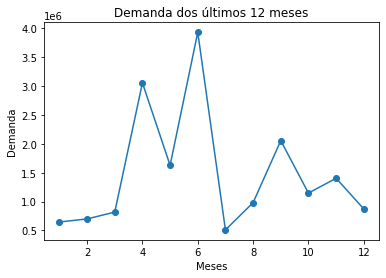

In [95]:
# Plotando a demanda dos últimos 12 meses

plt.plot(list(range(1, 13, 1)) , valores , '-o')
plt.title('Demanda dos últimos 12 meses')
plt.xlabel('Meses')
plt.ylabel('Demanda')
plt.show()

Temos a demanda dos últimos 12 meses e precisamos agora projetar a demanda para os próximos 4 meses. Para isso treinaremos um modelo onde **nossa matriz de features conterá a demanda dos últimos 6 meses em cada linha e nosso target será a demanda do mês seguinte a esses 6 meses**.

In [96]:
# Criando a matriz de features X

X = []
for i in list((range(0 , 6, 1))) :
    X.append(valores[i:i+6])
    
X = np.array(X)

In [97]:
# Exibindo X

X

array([[ 647069.17,  700098.66,  818466.38, 3053951.2 , 1627632.54,
        3930901.32],
       [ 700098.66,  818466.38, 3053951.2 , 1627632.54, 3930901.32,
         509951.22],
       [ 818466.38, 3053951.2 , 1627632.54, 3930901.32,  509951.22,
         981751.3 ],
       [3053951.2 , 1627632.54, 3930901.32,  509951.22,  981751.3 ,
        2054784.4 ],
       [1627632.54, 3930901.32,  509951.22,  981751.3 , 2054784.4 ,
        1147843.32],
       [3930901.32,  509951.22,  981751.3 , 2054784.4 , 1147843.32,
        1403895.55]])

In [98]:
# Criando a target y

y = valores[6:]

In [99]:
y

[509951.22000000003,
 981751.3,
 2054784.4000000001,
 1147843.32,
 1403895.55,
 872556.89]

In [100]:
# Dividindo em dados de treino e teste para avaliarmos nosso modelo em dados desconhecidos

X_train = X[0:5 , :]

X_test = np.array([X[5]])

y_train = y[0:5]

y_test = y[5]

Vamos escolher como modelo um Gradient Boosting :

In [108]:
# Instanciando um GradientBoosting e treinando

model = GradientBoostingRegressor()

model.fit(X_train , y_train)

GradientBoostingRegressor()

In [109]:
# Fazendo previsões em X_test

previsões = model.predict(X_test)

previsões

array([868315.67846097])

In [110]:
y_test , previsões

(872556.89, array([868315.67846097]))

Veja como nossa previsão está perto do valor verdadeiro. O valor verdadeiro é 872556 e tivemos como previsão 868315.

In [112]:
# Calculando o RMSE

np.sqrt((y_test - previsões)**2)

array([4241.21153903])

In [113]:
# Calculando o MAPE

np.abs((y_test - previsões[0])/y_test)

0.004860670504853797

Nossas métricas estão ótimas !

Vamos agora treinar um Gradient Boosting no conjunto de dados inteiro para prevermos a demanda nos próximos 4 meses.

In [114]:
# Treinando...

model = GradientBoostingRegressor()

model.fit(X, y)

GradientBoostingRegressor()

In [115]:
# Prevendo a demanda em outubro de 2021, novembro de 2021, dezembro de 2021 e janeiro de 2022

outubro_21 = model.predict(np.array([[509951.22000000003,
 981751.3,
 2054784.4000000001,
 1147843.32,
 1403895.55,
 872556.89]]))

novembro_21 = model.predict(np.array([[ 981751.3,
 2054784.4000000001,
 1147843.32,
 1403895.55,
 872556.89,
outubro_21]]))

dezembro_21 = model.predict(np.array([[ 2054784.4000000001,
 1147843.32,
 1403895.55,
 872556.89 ,
 outubro_21,
 novembro_21]]))

janeiro_22 = model.predict(np.array([[ 1147843.32,
 1403895.55,
 872556.89, 
 outubro_21,
 novembro_21,
 dezembro_21]]))

C:\Users\lucas\AppData\Local\Temp/ipykernel_6696/3637629179.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  novembro_21 = model.predict(np.array([[ 981751.3,
C:\Users\lucas\AppData\Local\Temp/ipykernel_6696/3637629179.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dezembro_21 = model.predict(np.array([[ 2054784.4000000001,
C:\Users\lucas\AppData\Local\Temp/ipykernel_6696/3637629179.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengt

In [116]:
# Exibindo a projeção da demanda dos próximos 4 meses

[outubro_21 , novembro_21, dezembro_21 , janeiro_22]

[array([932685.52945168]),
 array([990236.89010929]),
 array([1018520.42951816]),
 array([906054.73957878])]